In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from neuronal_connections import neuronal_outputs

In [3]:
# VP2 thermosensory neurons reactive to heating
vp2 = [
    720575940619930534,
    720575940611720362,
    720575940615856345,
    720575940617041728,
    720575940646372228,
    720575940636878254,
    720575940638389437
    ]

# VP3a thermosensory neurons reactive to cooling
vp3a = [
    720575940616999069,
    720575940621659563,
    720575940621831804,
    720575940625293514,
    720575940627677258,
    720575940613191591,
    720575940650751873
    ]

# VP1m thermosensory? neurons, putative humid reactivity
vp1m = [
    720575940613794114,
    720575940616039197,
    720575940618512624,
    720575940619024774,
    720575940623793741,
    720575940627944464,
    720575940629007230,
    720575940631875298,
    720575940632913461,
    720575940633059381,
    720575940635969399,
    720575940646785924,
    720575940622082518
    ]

# VP4 hygrosensory neurons reactive to dryness
vp4 = [
    720575940613914774,
    720575940616239873,
    720575940617969961,
    720575940620602236,
    720575940620634537,
    720575940624673936,
    720575940630644281,
    720575940633280107,
    720575940638509952,
    720575940611377893,
    720575940614711638,
    720575940614919709,
    720575940618531544,
    720575940618574983,
    720575940619075073,
    720575940621009023,
    720575940622581651,
    720575940623030861,
    720575940623065013,
    720575940625868184,
    720575940626256992,
    720575940627150991,
    720575940628945516,
    720575940630282297,
    720575940637494837,
    720575940643707246,
    720575940622625097,
    720575940629275898,
    720575940633670904
    ]

# VP5 hygrosensory neurons reactive to humidity
vp5 = [
    720575940614634786,
    720575940635767524,
    720575940614842262,
    720575940614996018,
    720575940620459702,
    720575940622457028,
    720575940624011278,
    720575940626125626,
    720575940629693302,
    720575940632714465,
    720575940633274524,
    720575940637096026,
    720575940638300093,
    720575940648747385,
    720575940615553397,
    720575940627264262
    ]

# VP1d hygrosensory? neurons, putative reactive to evaporation
vp1d = [
    720575940603820716,
    720575940605264305,
    720575940609792206,
    720575940610460514,
    720575940614570793,
    720575940617665950,
    720575940617986089,
    720575940617986345,
    720575940620847086,
    720575940623476661,
    720575940627271230,
    720575940630271862,
    720575940635916942,
    720575940622112726,
    720575940623209703,
    720575940634781620
    ]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l = [
    720575940614921501,
    720575940617987113,
    720575940620644446,
    720575940622700749,
    720575940651079158,
    720575940604931249,
    720575940613941533,
    720575940613942045,
    720575940613942301,
    720575940613942557,
    720575940625148174,
    720575940625657928,
    720575940626580361
    ]

In [4]:
# Connections dataset and additional data sets

# Load the connections dataset
# columns: pre_root_id, post_root_id, neuropil, syn_count, nt_type
connections = pd.read_csv('connections_783.csv.gz')

# Neuropil synapses
# columns: root_id, input synapses, input partners, output synapses, output partners, etc
# Keep only root_id, input syanapses, output synapses
neuropil_synapse = pd.read_csv('neuropil_synapse_table_783.csv.gz')[['root_id','input synapses','output synapses']]

# Rename with underscores
neuropil_synapse.rename(columns={'input synapses': 'input_synapses','output synapses': 'output_synapses'}, inplace=True)

# Load classification table
# columns: root_id, flow, super_class, side, etc
# Keep only root_id and side
classif = pd.read_csv('classification_783.csv.gz')[['root_id','side']]
classification = pd.read_csv('classification_783.csv.gz')

# Load data about each neuron
# columns: root_id, group, nt_type, etc
# Keep only root_id, nt_type
neurons = pd.read_csv('neurons_783.csv.gz')[['root_id','nt_type']]

# Merging additional data in one data set
neurons_data = pd.merge(neurons, pd.merge(classif, neuropil_synapse, on='root_id',how= 'outer'), on='root_id',how='outer')

# VP2 thermosensory neurons reactive to heating
vp2_df = classification[classification['root_id'].isin(vp2)]

# VP1l hygrosensory? neurons, putative reactive to cooling
vp1l_df = classification[classification['root_id'].isin(vp1l)]

# VP1d thermosensory neurons, putative reactive to warming
vp1d_df = classification[classification['root_id'].isin(vp1d)]

# VP1m hygrosensory? neurons, putative reactive to humidity
vp1m_df = classification[classification['root_id'].isin(vp1m)]

# VP3 thermosensory neurons, putative reactive to cooling
vp3a_df = classification[classification['root_id'].isin(vp3a)]

# VP4 thermosensory neurons, putative reactive to warming
vp4_df = classification[classification['root_id'].isin(vp4)]

# VP5 hygrosensory neurons reactive to humidity
vp5_df = classification[classification['root_id'].isin(vp5)]

# Create a dictionary to store all dataframes
vp_dfs = {
    'VP2': vp2_df,
    'VP1l': vp1l_df,
    'VP1d': vp1d_df,
    'VP1m': vp1m_df,
    'VP3a': vp3a_df,
    'VP4': vp4_df,
    'VP5': vp5_df
}

In [5]:
# Process 2N hop level for VP dataframe
connections_2N_dict = {}
downstream_2N_dict = {}
unique_downstream_2N_dict = {}

# Process 3N hop level for VP dataframe
connections_3N_dict = {}
downstream_3N_dict = {}
unique_downstream_3N_dict = {}

for vp, df in vp_dfs.items():
    connections_2N_dict[vp], downstream_2N_dict[vp], unique_downstream_2N_dict[vp] = neuronal_outputs(neurons, connections, classification, df['root_id'], [5], 2)
    connections_3N_dict[vp], downstream_3N_dict[vp], unique_downstream_3N_dict[vp] = neuronal_outputs(neurons, connections, classification, df['root_id'], [5,10], 3)

rates = [25,50,75,100,125,150,175,200] # these are the different stimulation rates for the simulations

for vp in vp_dfs:
    for i in rates:
        ids_activated = pd.read_csv(f'./results/cellTypes/CSVs/{vp.lower()}_{i}Hz_rates.csv')['flyid'].values
        unique_downstream_2N_dict[vp][f'activation_{i}Hz'] = unique_downstream_2N_dict[vp]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        unique_downstream_2N_dict[vp]['label'] = vp.lower()
        downstream_2N_dict[vp][f'activation_{i}Hz'] = downstream_2N_dict[vp]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        downstream_2N_dict[vp]['label'] = vp.lower()
        
        unique_downstream_3N_dict[vp][f'activation_{i}Hz'] = unique_downstream_3N_dict[vp]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        unique_downstream_3N_dict[vp]['label'] = vp.lower()
        downstream_3N_dict[vp][f'activation_{i}Hz'] = downstream_3N_dict[vp]['root_id'].apply(lambda x: 'activated' if x in ids_activated else 'non activated')
        downstream_3N_dict[vp]['label'] = vp.lower()

# Display one of the unique downstream dataframes as an example
unique_downstream_2N_dict['VP2']


root_id       flow super_class class        sub_class  \
0    720575940618428830  intrinsic     central  ALLN              NaN   
1    720575940618428830  intrinsic     central  ALLN              NaN   
2    720575940618428830  intrinsic     central  ALLN              NaN   
3    720575940618428830  intrinsic     central  ALLN              NaN   
4    720575940612856273  intrinsic     central  ALPN  multiglomerular   
..                  ...        ...         ...   ...              ...   
281  720575940618800225  intrinsic     central  ALPN  multiglomerular   
282  720575940621441494  intrinsic     central  ALLN              NaN   
283  720575940619059102  intrinsic     central  ALLN              NaN   
284  720575940611906713  intrinsic     central  ALLN              NaN   
285  720575940611906713  intrinsic     central  ALLN              NaN   

    cell_type          hemibrain_type   hemilineage   side nerve  \
0         NaN                  v2LN49          ALv2  right   NaN   
1         NaN                  v2LN49          ALv2  right   NaN   
2         NaN                  v2LN49          ALv2  right   NaN   
3         NaN                  v2LN49          ALv2  right   NaN   
4         NaN  VP5+_l2PN,VP5+VP2_l2PN  ALl1_ventral  right   NaN   
..        ...                     ...           ...    ...   ...   
281       NaN               M_lvPNm48         ALlv1  right   NaN   
282       NaN                  v2LN33          ALv2  right   NaN   
283   lLN2X03                 lLN2T_a   ALl1_dorsal  right   NaN   
284       NaN                  l2LN22   ALl1_dorsal   left   NaN   
285       NaN                  l2LN22   ALl1_dorsal   left   NaN   

    activation_25Hz label activation_50Hz activation_75Hz activation_100Hz  \
0         activated   vp2       activated       activated        activated   
1         activated   vp2       activated       activated        activated   
2         activated   vp2       activated       activated        activated   
3         activated   vp2       activated       activated        activated   
4         activated   vp2       activated       activated        activated   
..              ...   ...             ...             ...              ...   
281       activated   vp2       activated       activated        activated   
282       activated   vp2       activated       activated        activated   
283       activated   vp2       activated       activated        activated   
284       activated   vp2       activated       activated        activated   
285       activated   vp2       activated       activated        activated   

    activation_125Hz activation_150Hz activation_175Hz activation_200Hz  
0          activated        activated        activated        activated  
1          activated        activated        activated        activated  
2          activated        activated        activated        activated  
3          activated        activated        activated        activated  
4          activated        activated        activated        activated  
..               ...              ...              ...              ...  
281        activated        activated        activated        activated  
282        activated        activated        activated        activated  
283        activated        activated        activated        activated  
284        activated        activated        activated        activated  
285        activated        activated        activated        activated  

[284 rows x 19 columns]

In [55]:
# Get all unique root_ids across all VP 2N dataframes
all_root_ids_2N = set()
for vp in unique_downstream_2N_dict:
    all_root_ids_2N.update(unique_downstream_2N_dict[vp]['root_id'].values)

print(f"Total number of unique root_ids across all VP 2N dataframes: {len(all_root_ids_2N)}")

# Get all unique root_ids across all VP 3N dataframes 
all_root_ids_3N = set()
for vp in unique_downstream_3N_dict:
    all_root_ids_3N.update(unique_downstream_3N_dict[vp]['root_id'].values)

print(f"Total number of unique root_ids across all VP 3N dataframes: {len(all_root_ids_3N)}")

Total number of unique root_ids across all VP 2N dataframes: 298
Total number of unique root_ids across all VP 3N dataframes: 4020


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

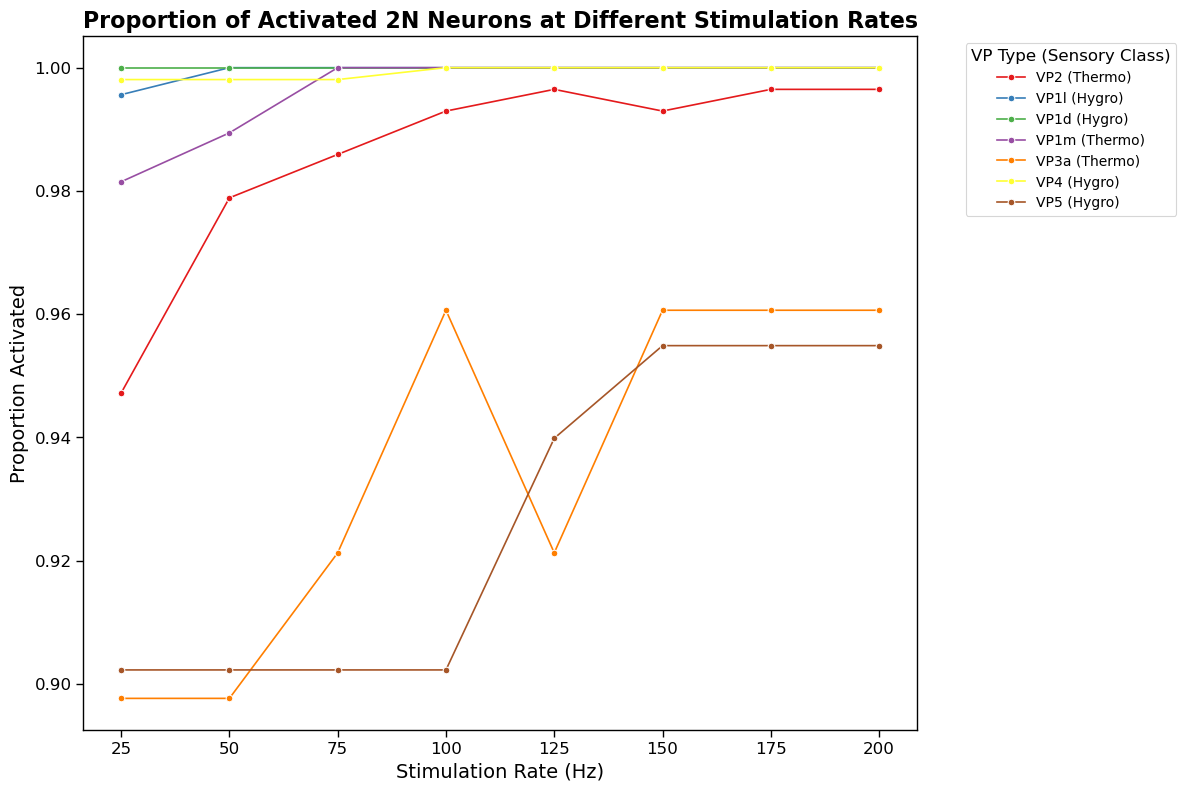

In [6]:
input_intensity = [25, 50, 75, 100, 125, 150, 175, 200]

def get_activation_columns(df):
    return [col for col in df.columns if 'activation' in col]

# Function to calculate the proportion of activated neurons for each frequency
def calculate_proportions(df, frequency):
    total_neurons = df.shape[0]
    activated_neurons = df[df[frequency] == 'activated'].shape[0]
    return activated_neurons / total_neurons

# Initialize a dictionary to store proportions for each VP
proportions = {}

# Process each VP DataFrame
for vp in unique_downstream_2N_dict:
    activation_columns = get_activation_columns(unique_downstream_2N_dict[vp])
    proportions[vp] = {freq: calculate_proportions(unique_downstream_2N_dict[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_df = pd.DataFrame(proportions)

sns.set_context('paper')

# Define custom color palette for each VP and classify as thermosensory or hygrosensory
custom_palette = sns.color_palette("Set1", len(unique_downstream_2N_dict))
vp_colors = dict(zip(unique_downstream_2N_dict.keys(), custom_palette))
vp_classification = {vp: 'Thermo' if vp in ['VP2', 'VP3a', 'VP1m'] else 'Hygro' for vp in unique_downstream_2N_dict.keys()}

plt.figure(figsize=(12, 8))
for vp in proportions_df.columns:
    sns.lineplot(data=proportions_df[vp], color=vp_colors[vp], marker='o', label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 2N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks to input_intensity for proper labeling
plt.xticks(range(len(input_intensity)), labels=input_intensity, fontsize=12)

# Customize ticks on the y-axis for better readability
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
plt.show()

/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

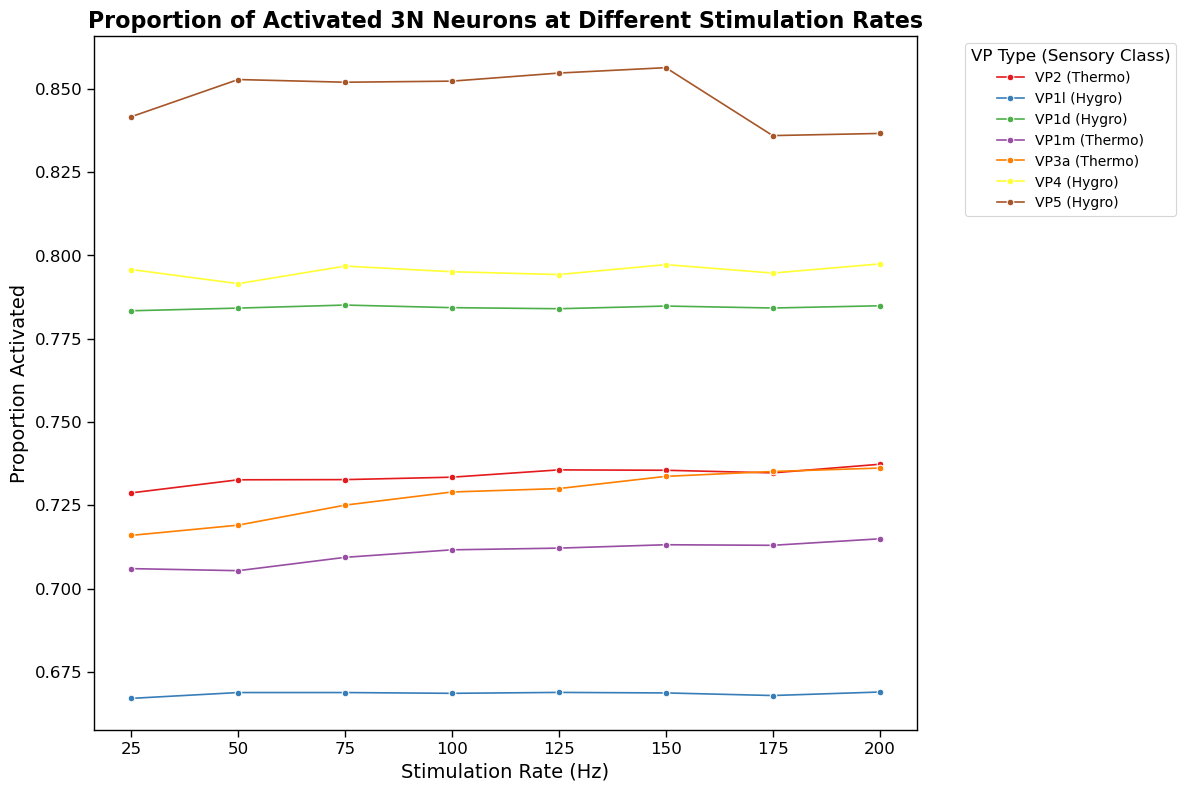

In [7]:
# Initialize a dictionary to store proportions for each VP (3N)
proportions_3N = {}

# Process each VP DataFrame for 3N
for vp in unique_downstream_3N_dict:
    activation_columns = get_activation_columns(unique_downstream_3N_dict[vp])
    proportions_3N[vp] = {freq: calculate_proportions(unique_downstream_3N_dict[vp], freq) for freq in activation_columns}

# Convert the proportions dictionary to a DataFrame for easier plotting
proportions_3N_df = pd.DataFrame(proportions_3N)

plt.figure(figsize=(12, 8))
for vp in proportions_3N_df.columns:
    sns.lineplot(data=proportions_3N_df[vp], color=vp_colors[vp], marker='o', label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Activated 3N Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion Activated', fontsize=14)

# Set x-ticks to input_intensity for proper labeling
plt.xticks(range(len(input_intensity)), labels=input_intensity, fontsize=12)

# Customize ticks on the y-axis for better readability
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
plt.show()


{'VP2': [], 'VP1l': [], 'VP1d': [], 'VP1m': [], 'VP3a': [], 'VP4': [], 'VP5': []}


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

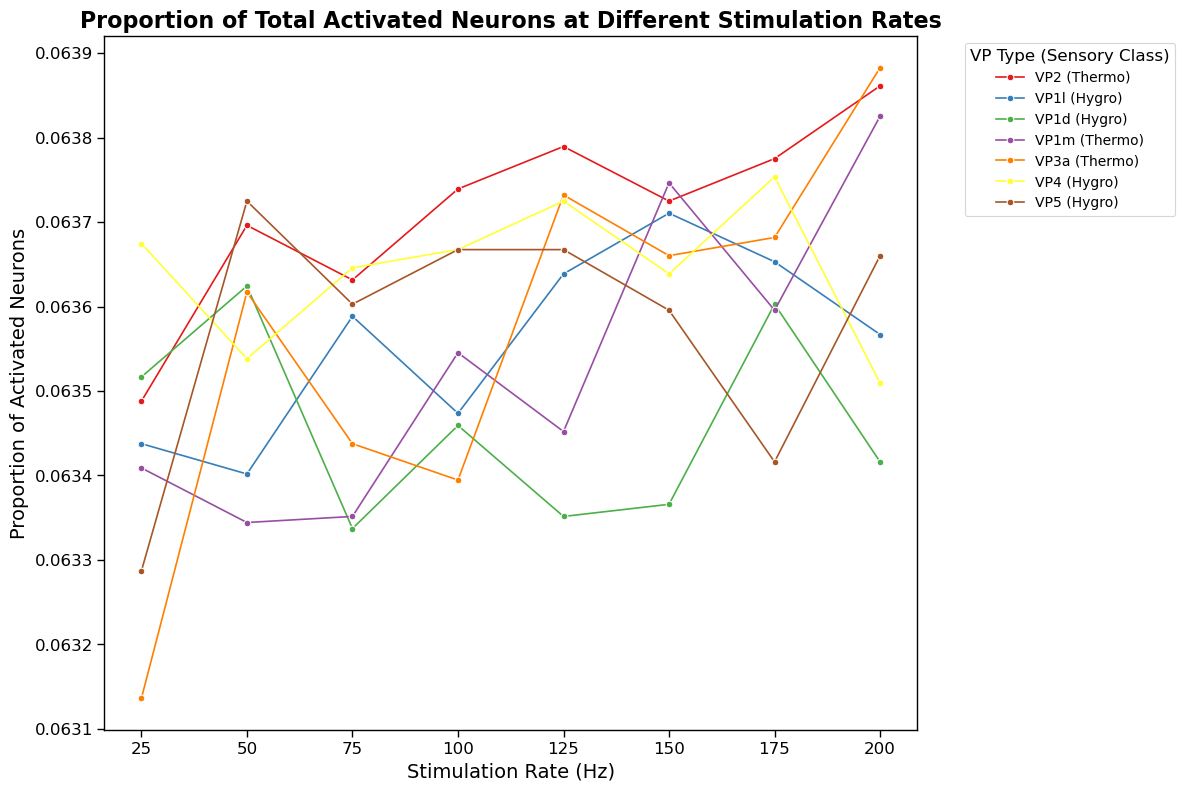

In [8]:
# Initialize a dictionary to store activations for each VP
vp_activations = {vp: [] for vp in unique_downstream_2N_dict.keys()}
print(vp_activations)

# Loop over the input intensity and calculate activations
for vp in vp_activations:
    for i in input_intensity:
        vp_activations[vp].append(pd.read_csv('./results/cellTypes/CSVs/'+str(vp.lower())+'_'+str(i)+'Hz_rates.csv')['flyid'].values.shape[0]/np.unique(neurons.root_id.values).shape[0])

# Convert vp_activations dictionary to a DataFrame
vp_activations_df = pd.DataFrame(vp_activations, index=input_intensity)

# Create a line plot
plt.figure(figsize=(12, 8))
for vp in vp_activations_df.columns:
    sns.lineplot(data=vp_activations_df[vp], x=vp_activations_df.index, y=vp_activations_df[vp], 
                 color=vp_colors[vp], marker='o', label=f"{vp} ({vp_classification[vp]})")

# Add plot titles and labels
plt.title('Proportion of Total Activated Neurons at Different Stimulation Rates', fontsize=16, fontweight='bold')
plt.xlabel('Stimulation Rate (Hz)', fontsize=14)
plt.ylabel('Proportion of Activated Neurons', fontsize=14)

# Customize x-axis ticks
plt.xticks(input_intensity, fontsize=12)

# Customize y-axis ticks
plt.yticks(fontsize=12)

# Add a legend with a title
plt.legend(title='VP Type (Sensory Class)', fontsize=10, title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot with tight layout
plt.tight_layout()
plt.show()

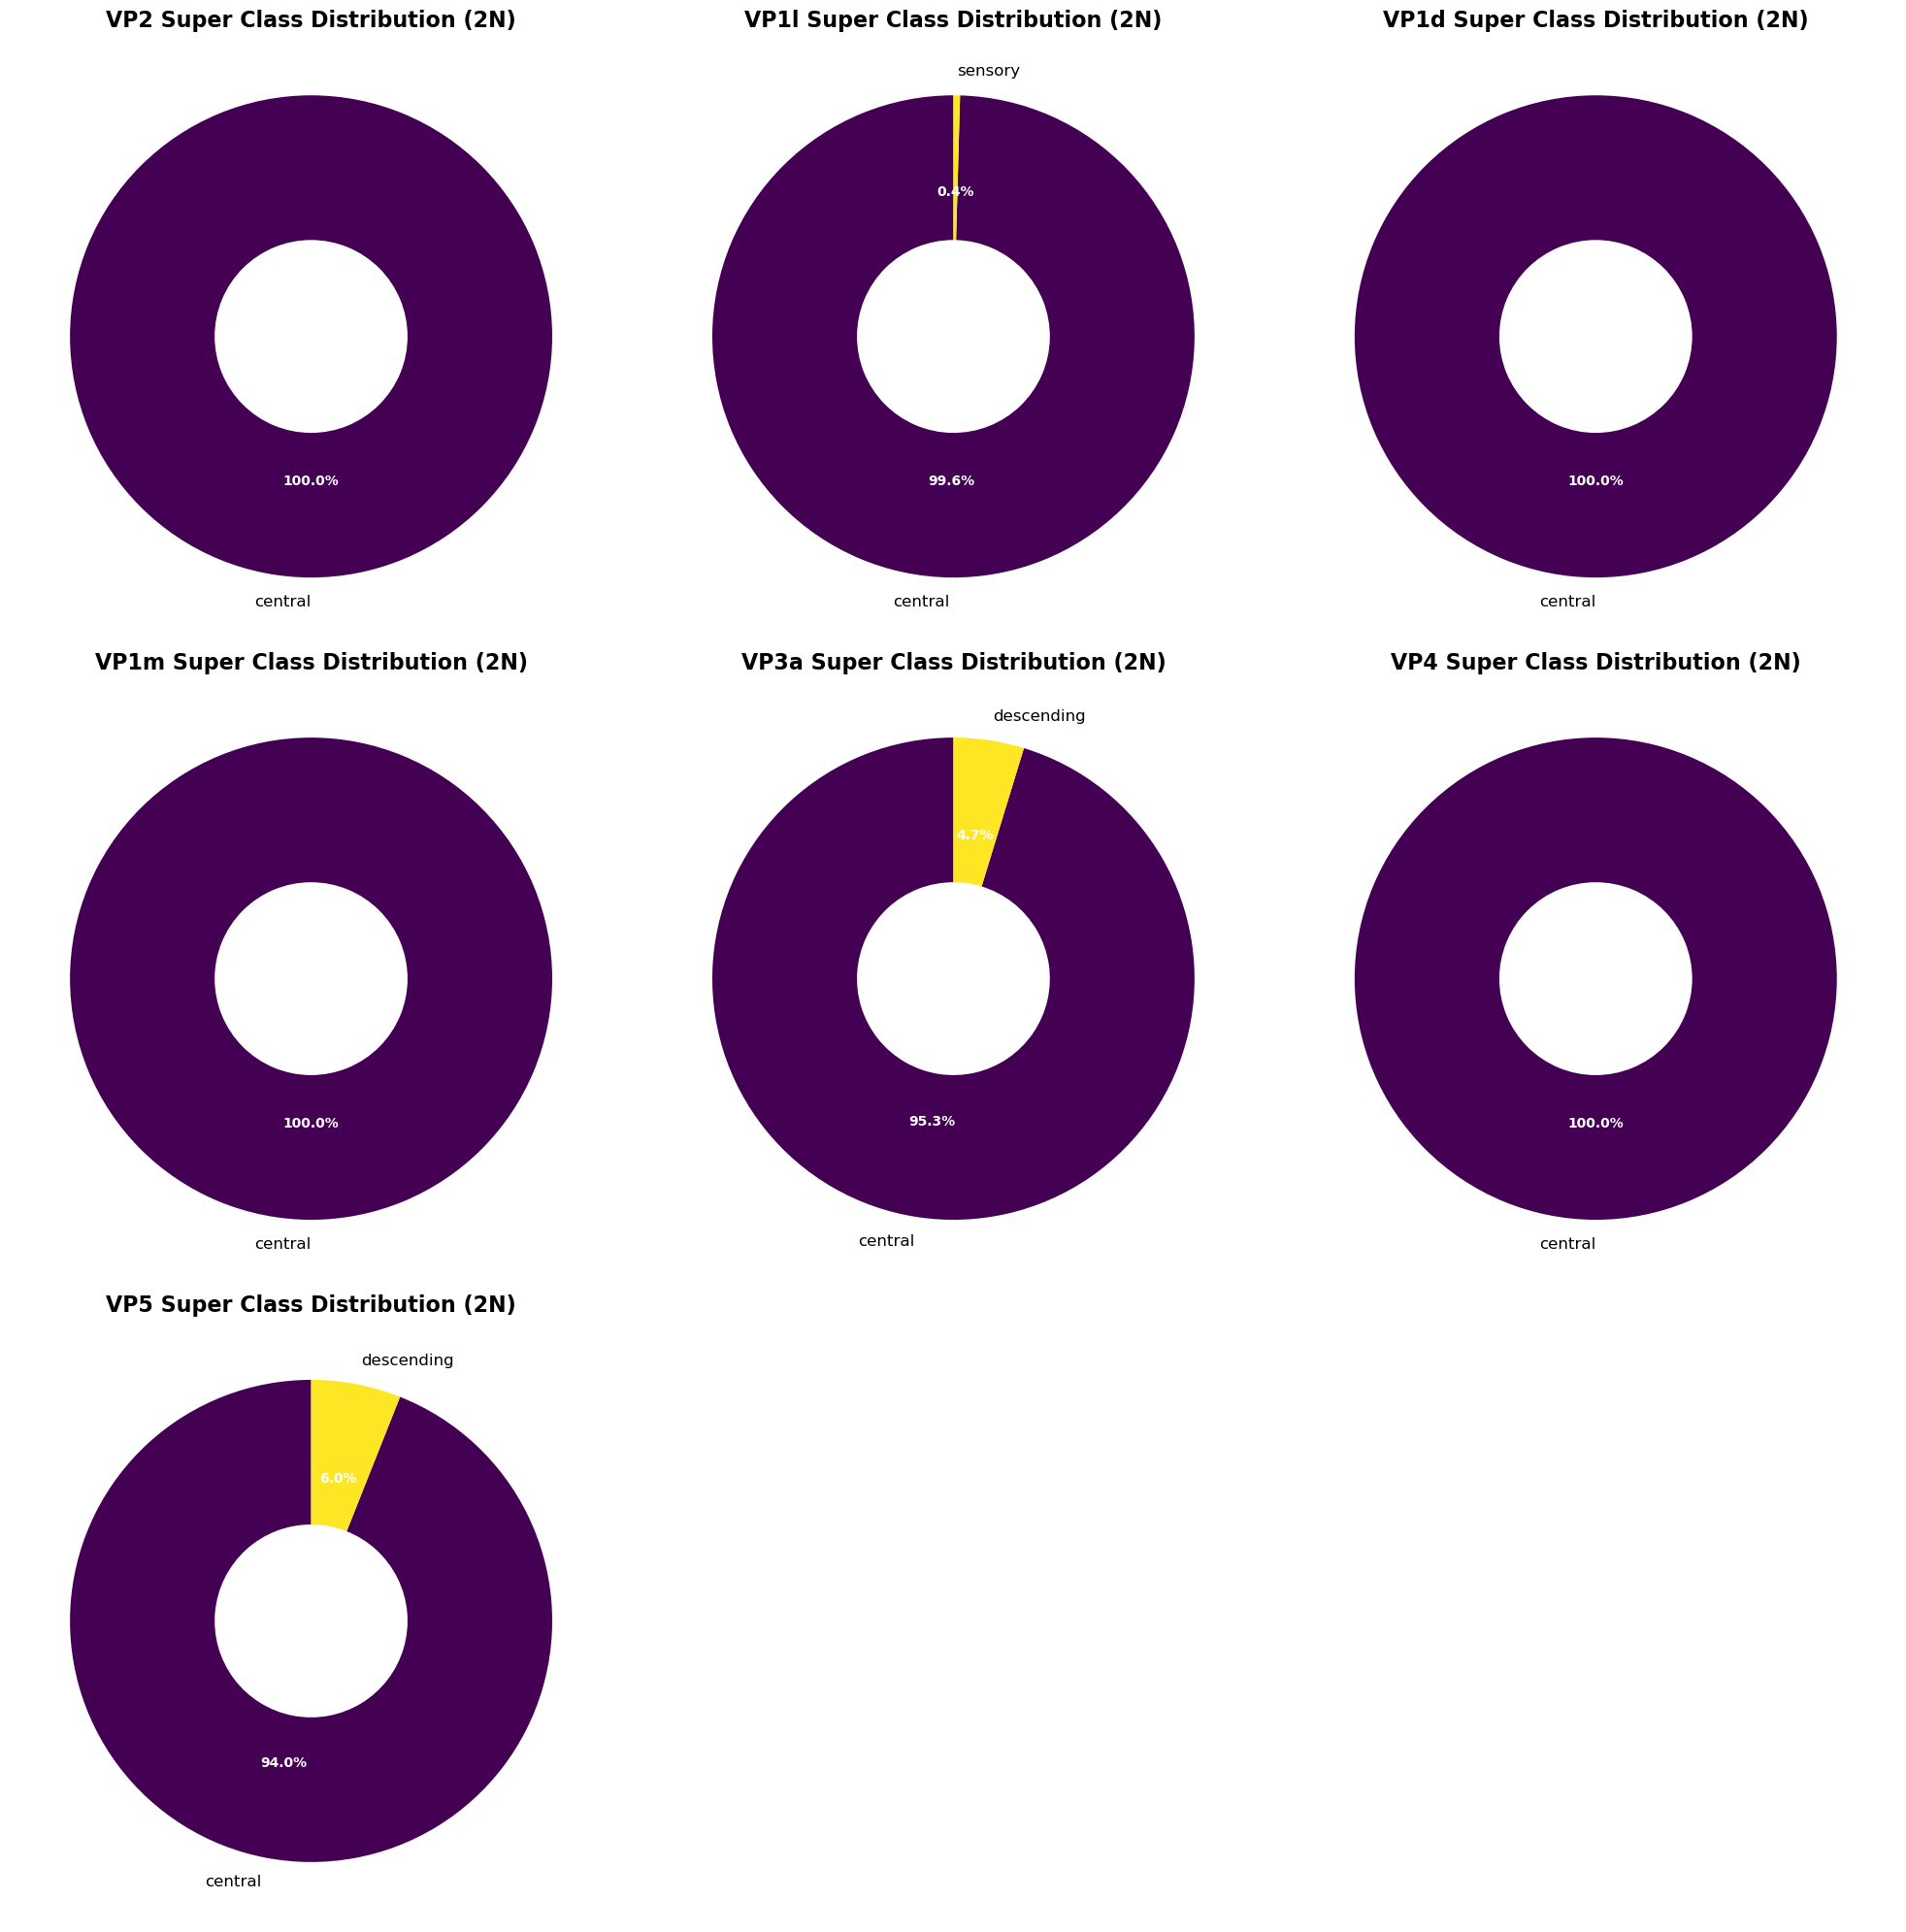

In [9]:
# Create a figure with subplots for each VP
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()

# Define a different color palette
colors = plt.cm.viridis(np.linspace(0, 1, 2))  # Using Set3 colormap for more contrasting and distinct colors

# Loop through each VP and create a pie chart
for i, (vp, df) in enumerate(unique_downstream_2N_dict.items()):
    # Count the occurrences of each super_class
    super_class_counts = df['super_class'].value_counts()
    
    wedges, texts, autotexts = axs[i].pie(super_class_counts.values, 
                                          labels=super_class_counts.index, 
                                          autopct='%1.1f%%', 
                                          startangle=90, 
                                          colors=colors,
                                          wedgeprops=dict(width=0.6))  # Adding a hole in the center for better visibility
    
    # Enhance the appearance of labels and percentages
    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.setp(texts, size=12)
    
    axs[i].set_title(f'{vp} Super Class Distribution (2N)', fontsize=16, fontweight='bold')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


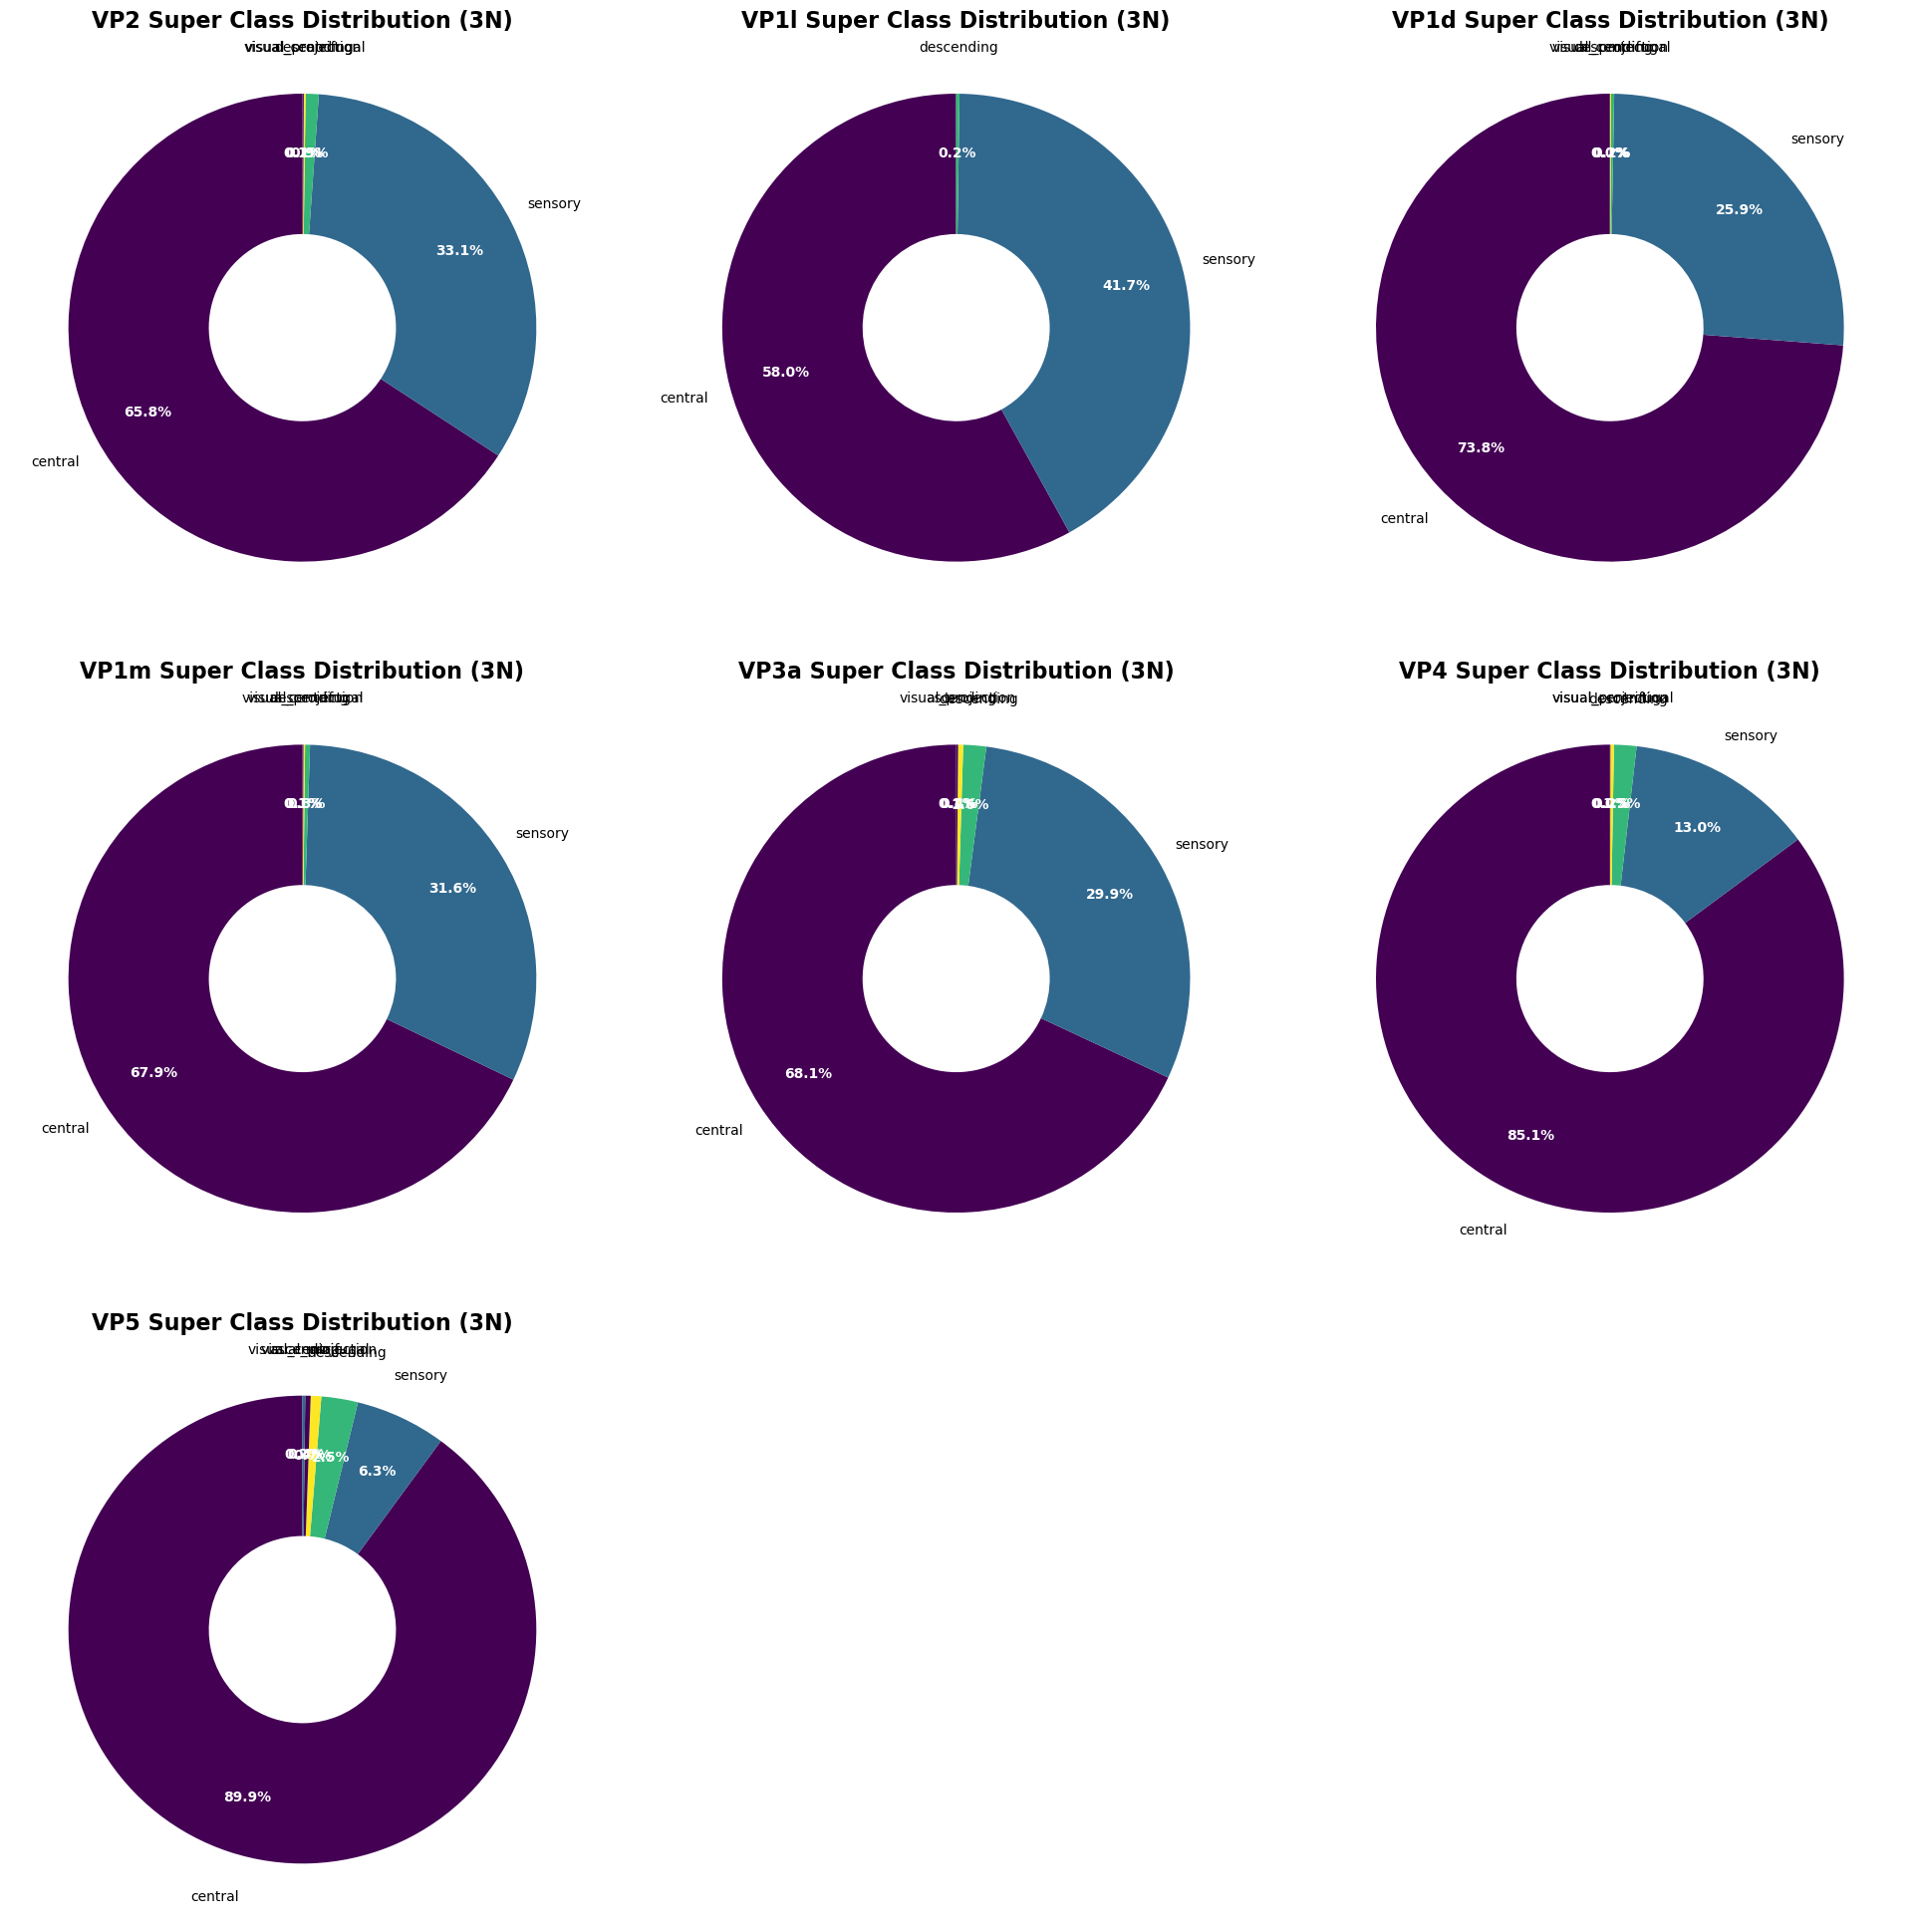

In [10]:
# Create a figure with subplots for each VP
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()

# Define a different color palette
colors = plt.cm.viridis(np.linspace(0, 1, 4))  # Using viridis colormap for distinct colors

# Loop through each VP and create a pie chart
for i, (vp, df) in enumerate(unique_downstream_3N_dict.items()):
    # Count the occurrences of each super_class
    super_class_counts = df['super_class'].value_counts()
    
    wedges, texts, autotexts = axs[i].pie(super_class_counts.values, 
                                          labels=super_class_counts.index, 
                                          autopct='%1.1f%%', 
                                          startangle=90, 
                                          colors=colors,
                                          wedgeprops=dict(width=0.6),  # Adding a hole in the center for better visibility
                                          pctdistance=0.75,  # Move percentage labels closer to the center
                                          labeldistance=1.1)  # Move text labels closer to the pie
    
    # Enhance the appearance of labels and percentages
    plt.setp(autotexts, size=10, weight="bold", color="white")
    plt.setp(texts, size=10)
    
    # Adjust label positions to prevent overlap
    for text, wedge in zip(texts, wedges):
        angle = (wedge.theta1 + wedge.theta2) / 2
        x = wedge.r * 1.2 * np.cos(np.radians(angle))
        y = wedge.r * 1.2 * np.sin(np.radians(angle))
        text.set_position((x, y))
        text.set_ha('center')
        text.set_va('center')
    
    axs[i].set_title(f'{vp} Super Class Distribution (3N)', fontsize=16, fontweight='bold')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=3.0)  # Increase padding between subplots
plt.show()


VP2 Class Distribution (2N):
class
ALLN    168
ALPN    101
ALIN      1
Name: count, dtype: int64
Total count: 270

VP1l Class Distribution (2N):
class
ALLN            130
ALPN             97
hygrosensory      1
Name: count, dtype: int64
Total count: 228

VP1d Class Distribution (2N):
class
ALLN    265
ALPN    192
Name: count, dtype: int64
Total count: 457

VP1m Class Distribution (2N):
class
ALLN    211
ALPN    153
ALON      9
Name: count, dtype: int64
Total count: 373

VP3a Class Distribution (2N):
class
ALLN    69
ALPN    52
Name: count, dtype: int64
Total count: 121

VP4 Class Distribution (2N):
class
ALLN    284
ALPN    228
ALIN      1
Name: count, dtype: int64
Total count: 513

VP5 Class Distribution (2N):
class
ALPN    62
ALLN    62
ALON     1
Name: count, dtype: int64
Total count: 125


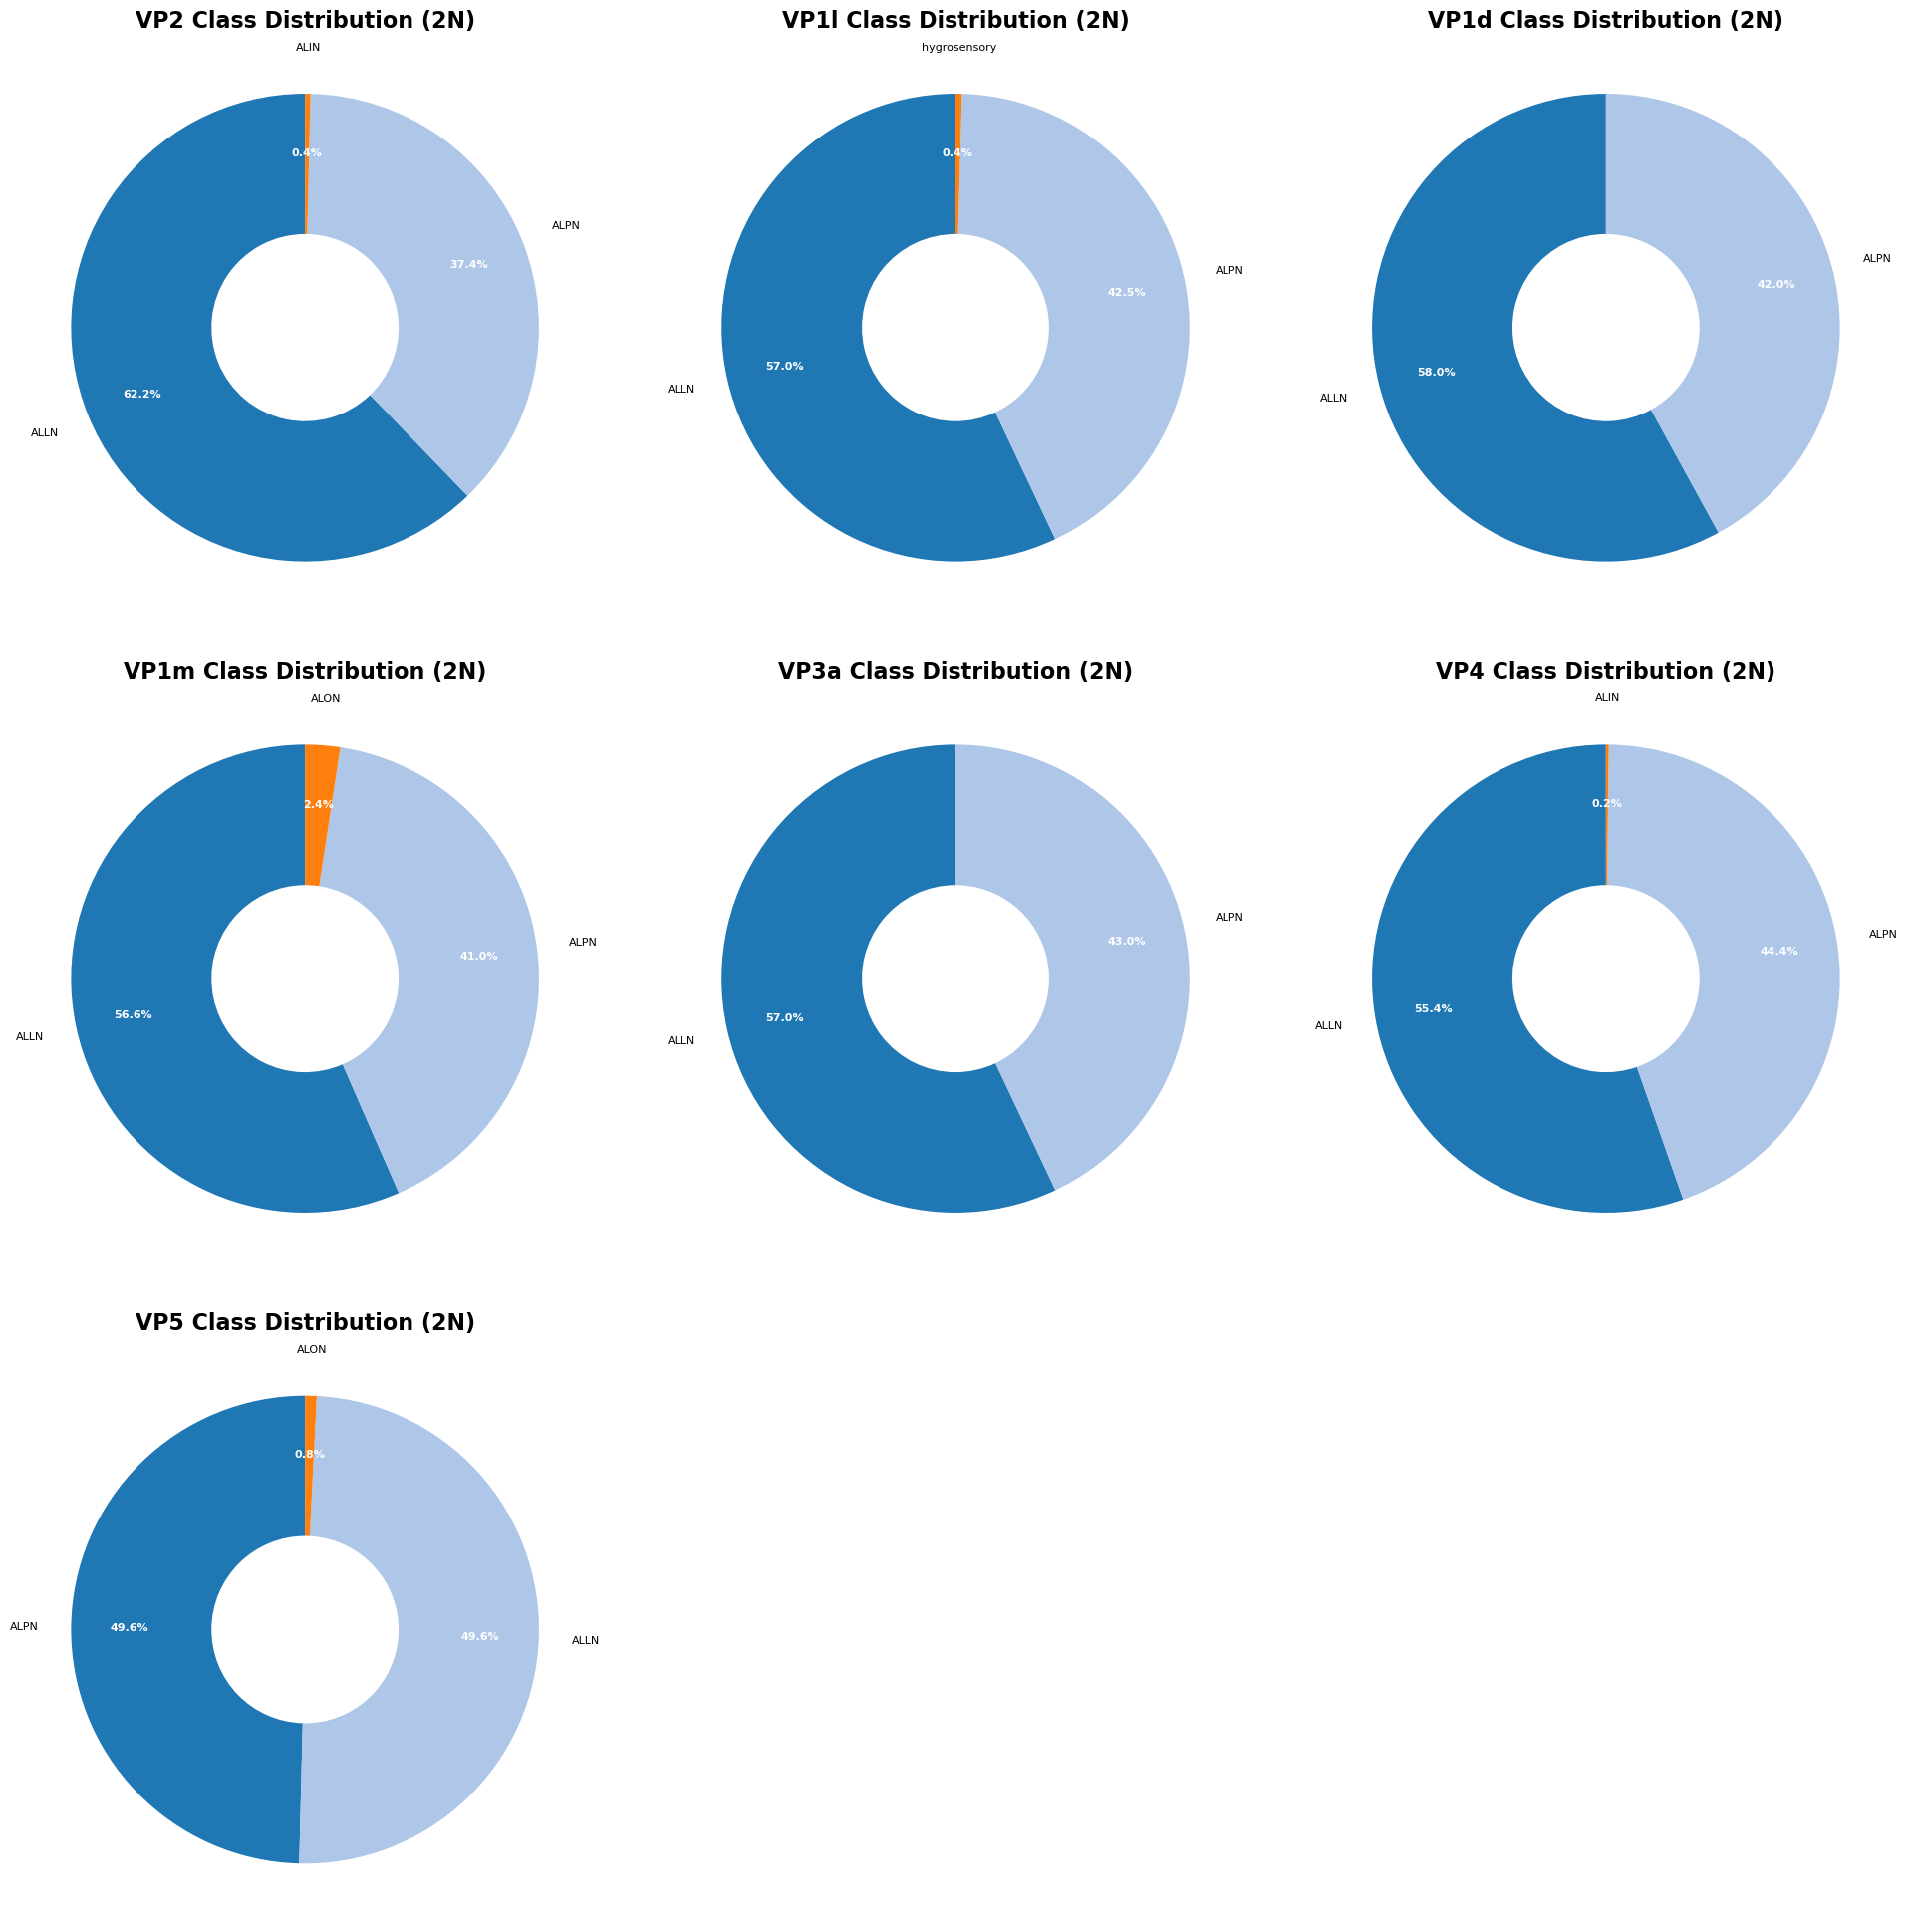


VP2 Class Distribution (3N):
class
olfactory        4665
ALPN             4383
ALLN             4160
hygrosensory      880
Kenyon_Cell       488
thermosensory     350
LHLN               81
ALIN               65
ALON               39
DAN                27
LHCENT             20
MBON                8
CX                  4
Name: count, dtype: int64
Total count: 15170

VP1l Class Distribution (3N):
class
olfactory        8953
ALLN             6060
ALPN             4552
Kenyon_Cell      1970
hygrosensory      889
thermosensory     876
ALIN              148
ALON               59
LHLN               39
DAN                13
Name: count, dtype: int64
Total count: 23559

VP1d Class Distribution (3N):
class
ALLN             10164
olfactory         7965
ALPN              5775
Kenyon_Cell       5590
thermosensory      931
hygrosensory       782
LHLN               429
DAN                194
ALIN               100
ALON                71
MBIN                55
LHCENT              41
Name: count, dtype

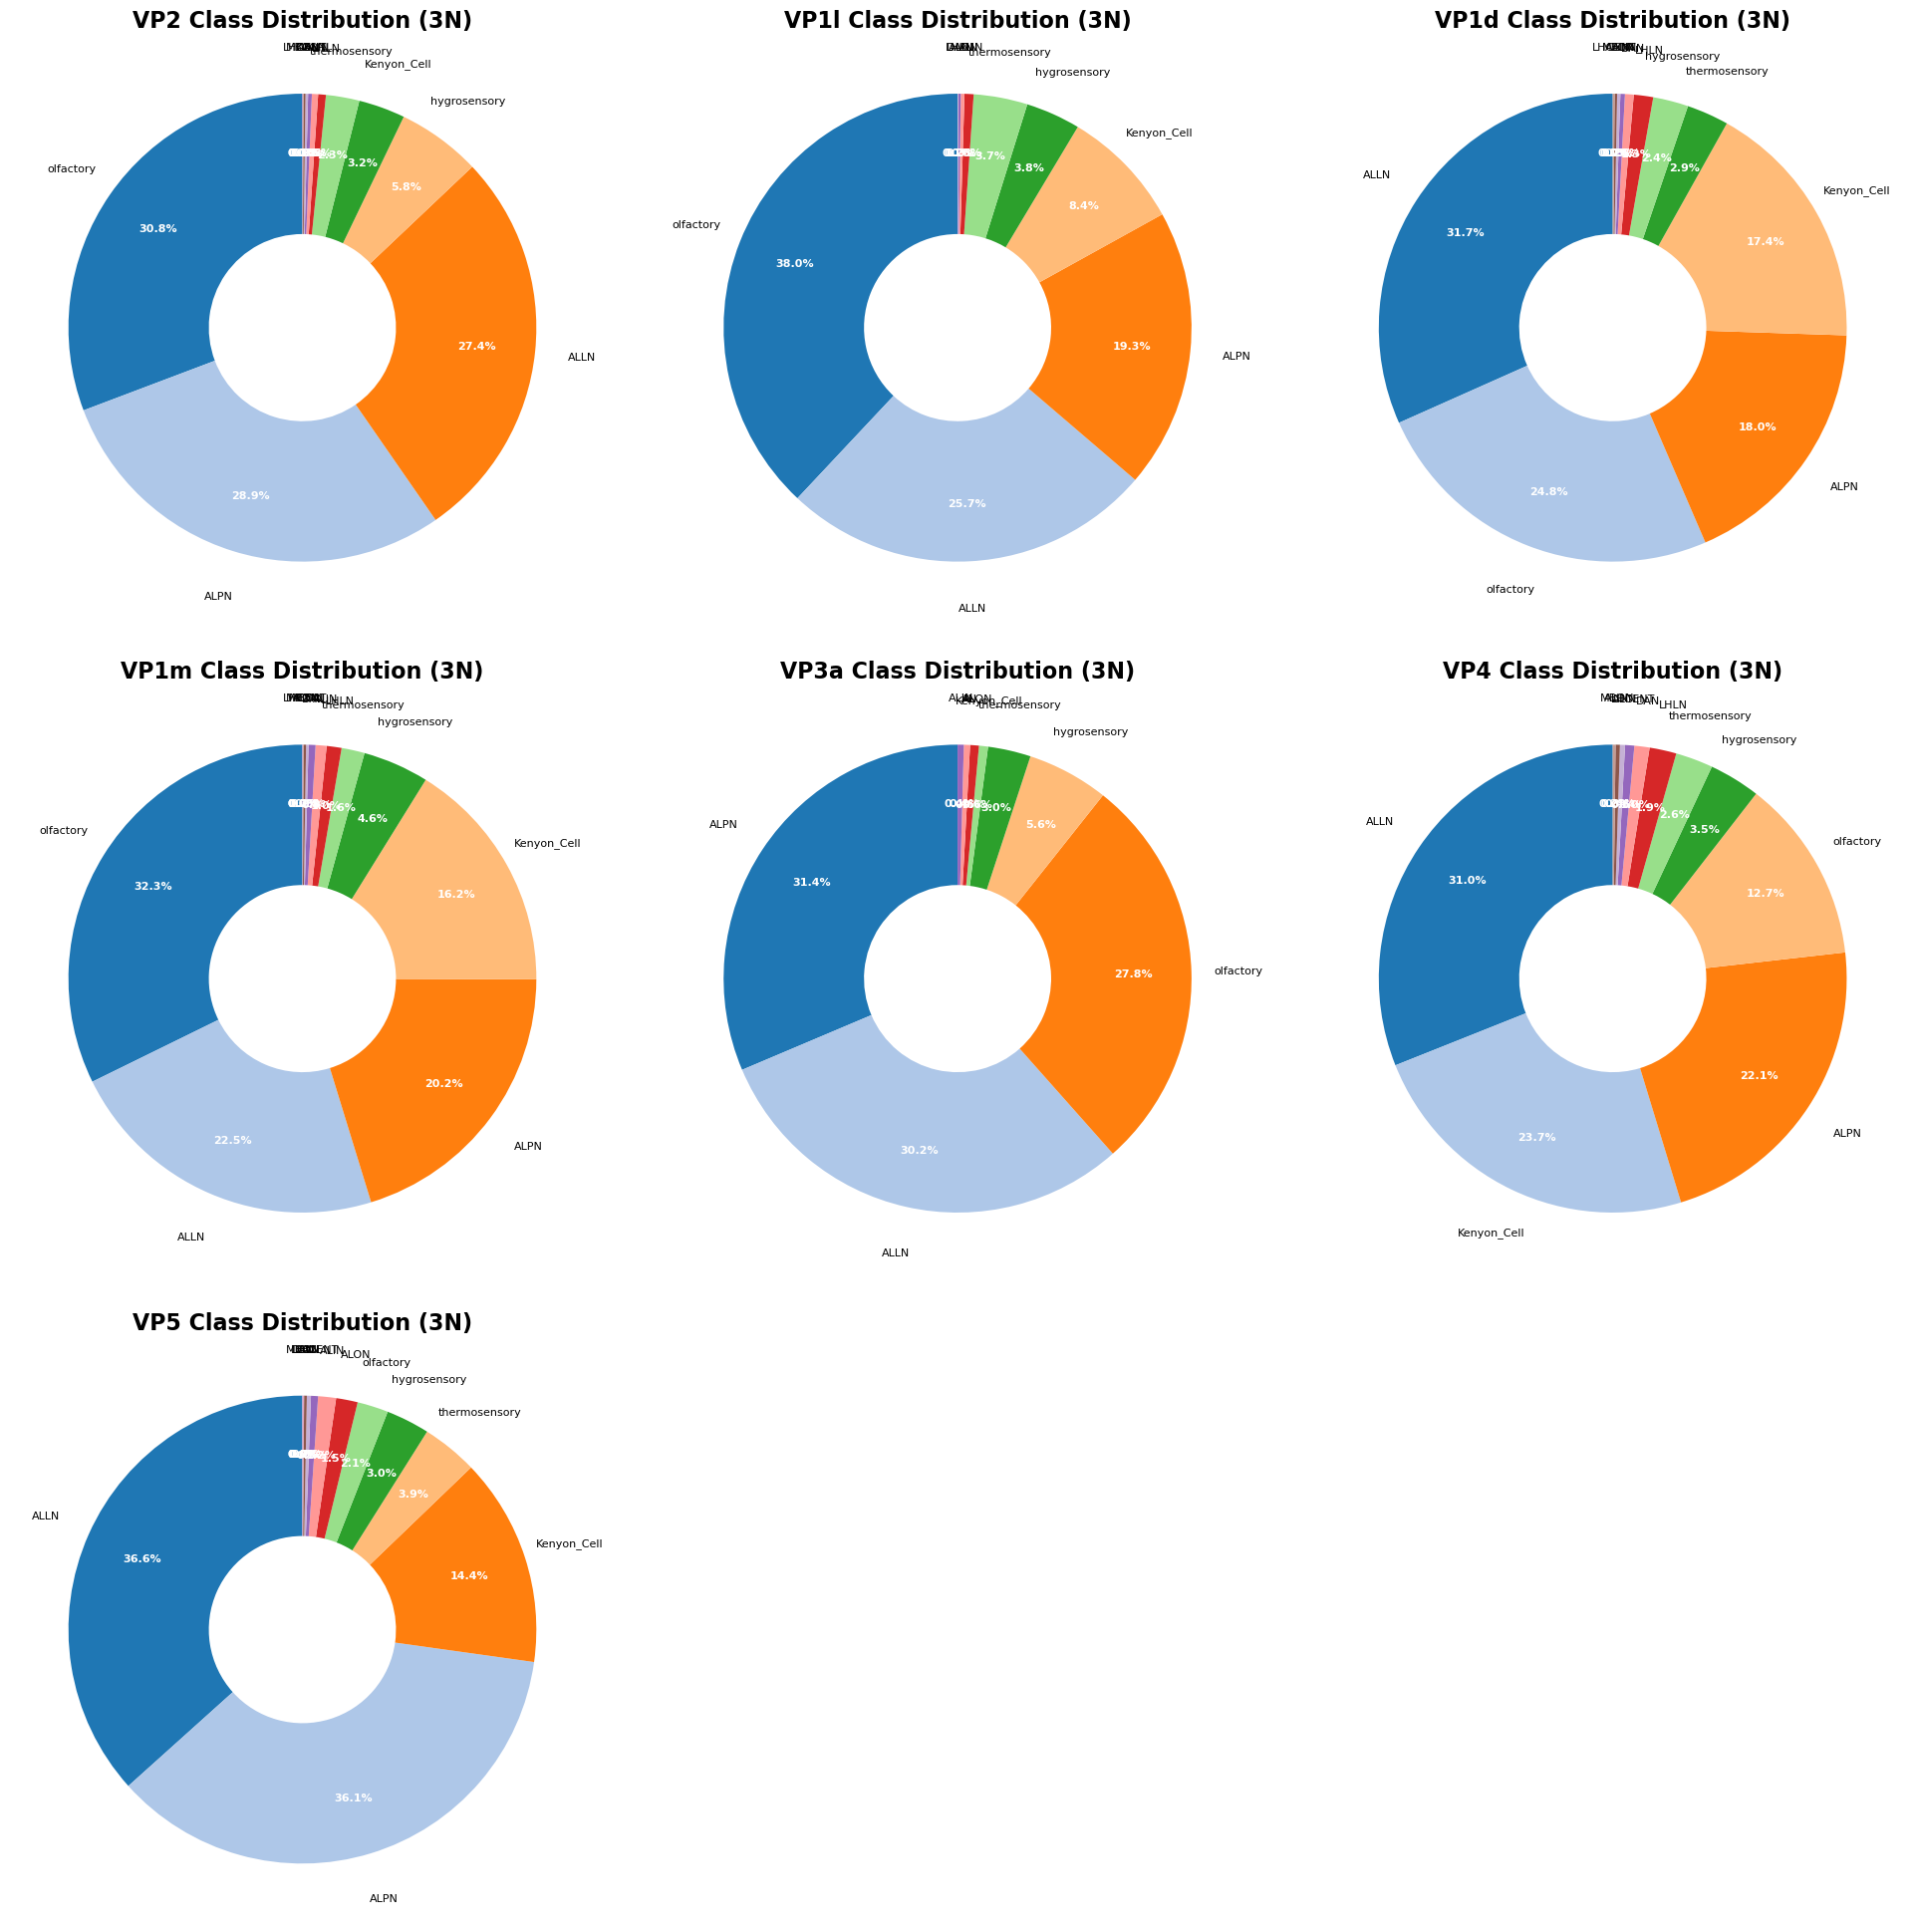

In [16]:
# Create figures with subplots for each VP for both 2N and 3N
for n, downstream_dict in [('2N', unique_downstream_2N_dict), ('3N', unique_downstream_3N_dict)]:
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    axs = axs.flatten()

    # Define a color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Using tab20 colormap for more distinct colors

    # Loop through each VP and create a pie chart
    for i, (vp, df) in enumerate(downstream_dict.items()):
        # Count the occurrences of each class
        class_counts = df['class'].value_counts()
        
        # Print out the class distribution
        print(f"\n{vp} Class Distribution ({n}):")
        print(class_counts)
        print(f"Total count: {class_counts.sum()}")
        
        wedges, texts, autotexts = axs[i].pie(class_counts.values, 
                                              labels=class_counts.index, 
                                              autopct='%1.1f%%', 
                                              startangle=90, 
                                              colors=colors[:len(class_counts)],
                                              wedgeprops=dict(width=0.6),
                                              pctdistance=0.75,
                                              labeldistance=1.1)
        
        # Enhance the appearance of labels and percentages
        plt.setp(autotexts, size=8, weight="bold", color="white")
        plt.setp(texts, size=8)
        
        # Adjust label positions to prevent overlap
        for text, wedge in zip(texts, wedges):
            angle = (wedge.theta1 + wedge.theta2) / 2
            x = wedge.r * 1.2 * np.cos(np.radians(angle))
            y = wedge.r * 1.2 * np.sin(np.radians(angle))
            text.set_position((x, y))
            text.set_ha('center')
            text.set_va('center')
        
        axs[i].set_title(f'{vp} Class Distribution ({n})', fontsize=16, fontweight='bold')

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=3.0)
    plt.show()

0.010452961672473868
0.04887218045112782
0.004016064257028112
0.015424164524421594
0.051094890510948905
0.0019267822736030828
0.0

VP2 Superclass Distribution (287):
super_class
central    284
sensory      3
Name: count, dtype: int64
Total count: 287

VP1l Superclass Distribution (266):
super_class
central    227
sensory     39
Name: count, dtype: int64
Total count: 266

VP1d Superclass Distribution (498):
super_class
central    496
sensory      2
Name: count, dtype: int64
Total count: 498

VP1m Superclass Distribution (389):
super_class
central    378
sensory     11
Name: count, dtype: int64
Total count: 389

VP3a Superclass Distribution (137):
super_class
central       121
sensory        10
descending      6
Name: count, dtype: int64
Total count: 137

VP4 Superclass Distribution (519):
super_class
central    518
sensory      1
Name: count, dtype: int64
Total count: 519

VP5 Superclass Distribution (133):
super_class
central       125
descending      8
Name: count, dtype: int64
Total 

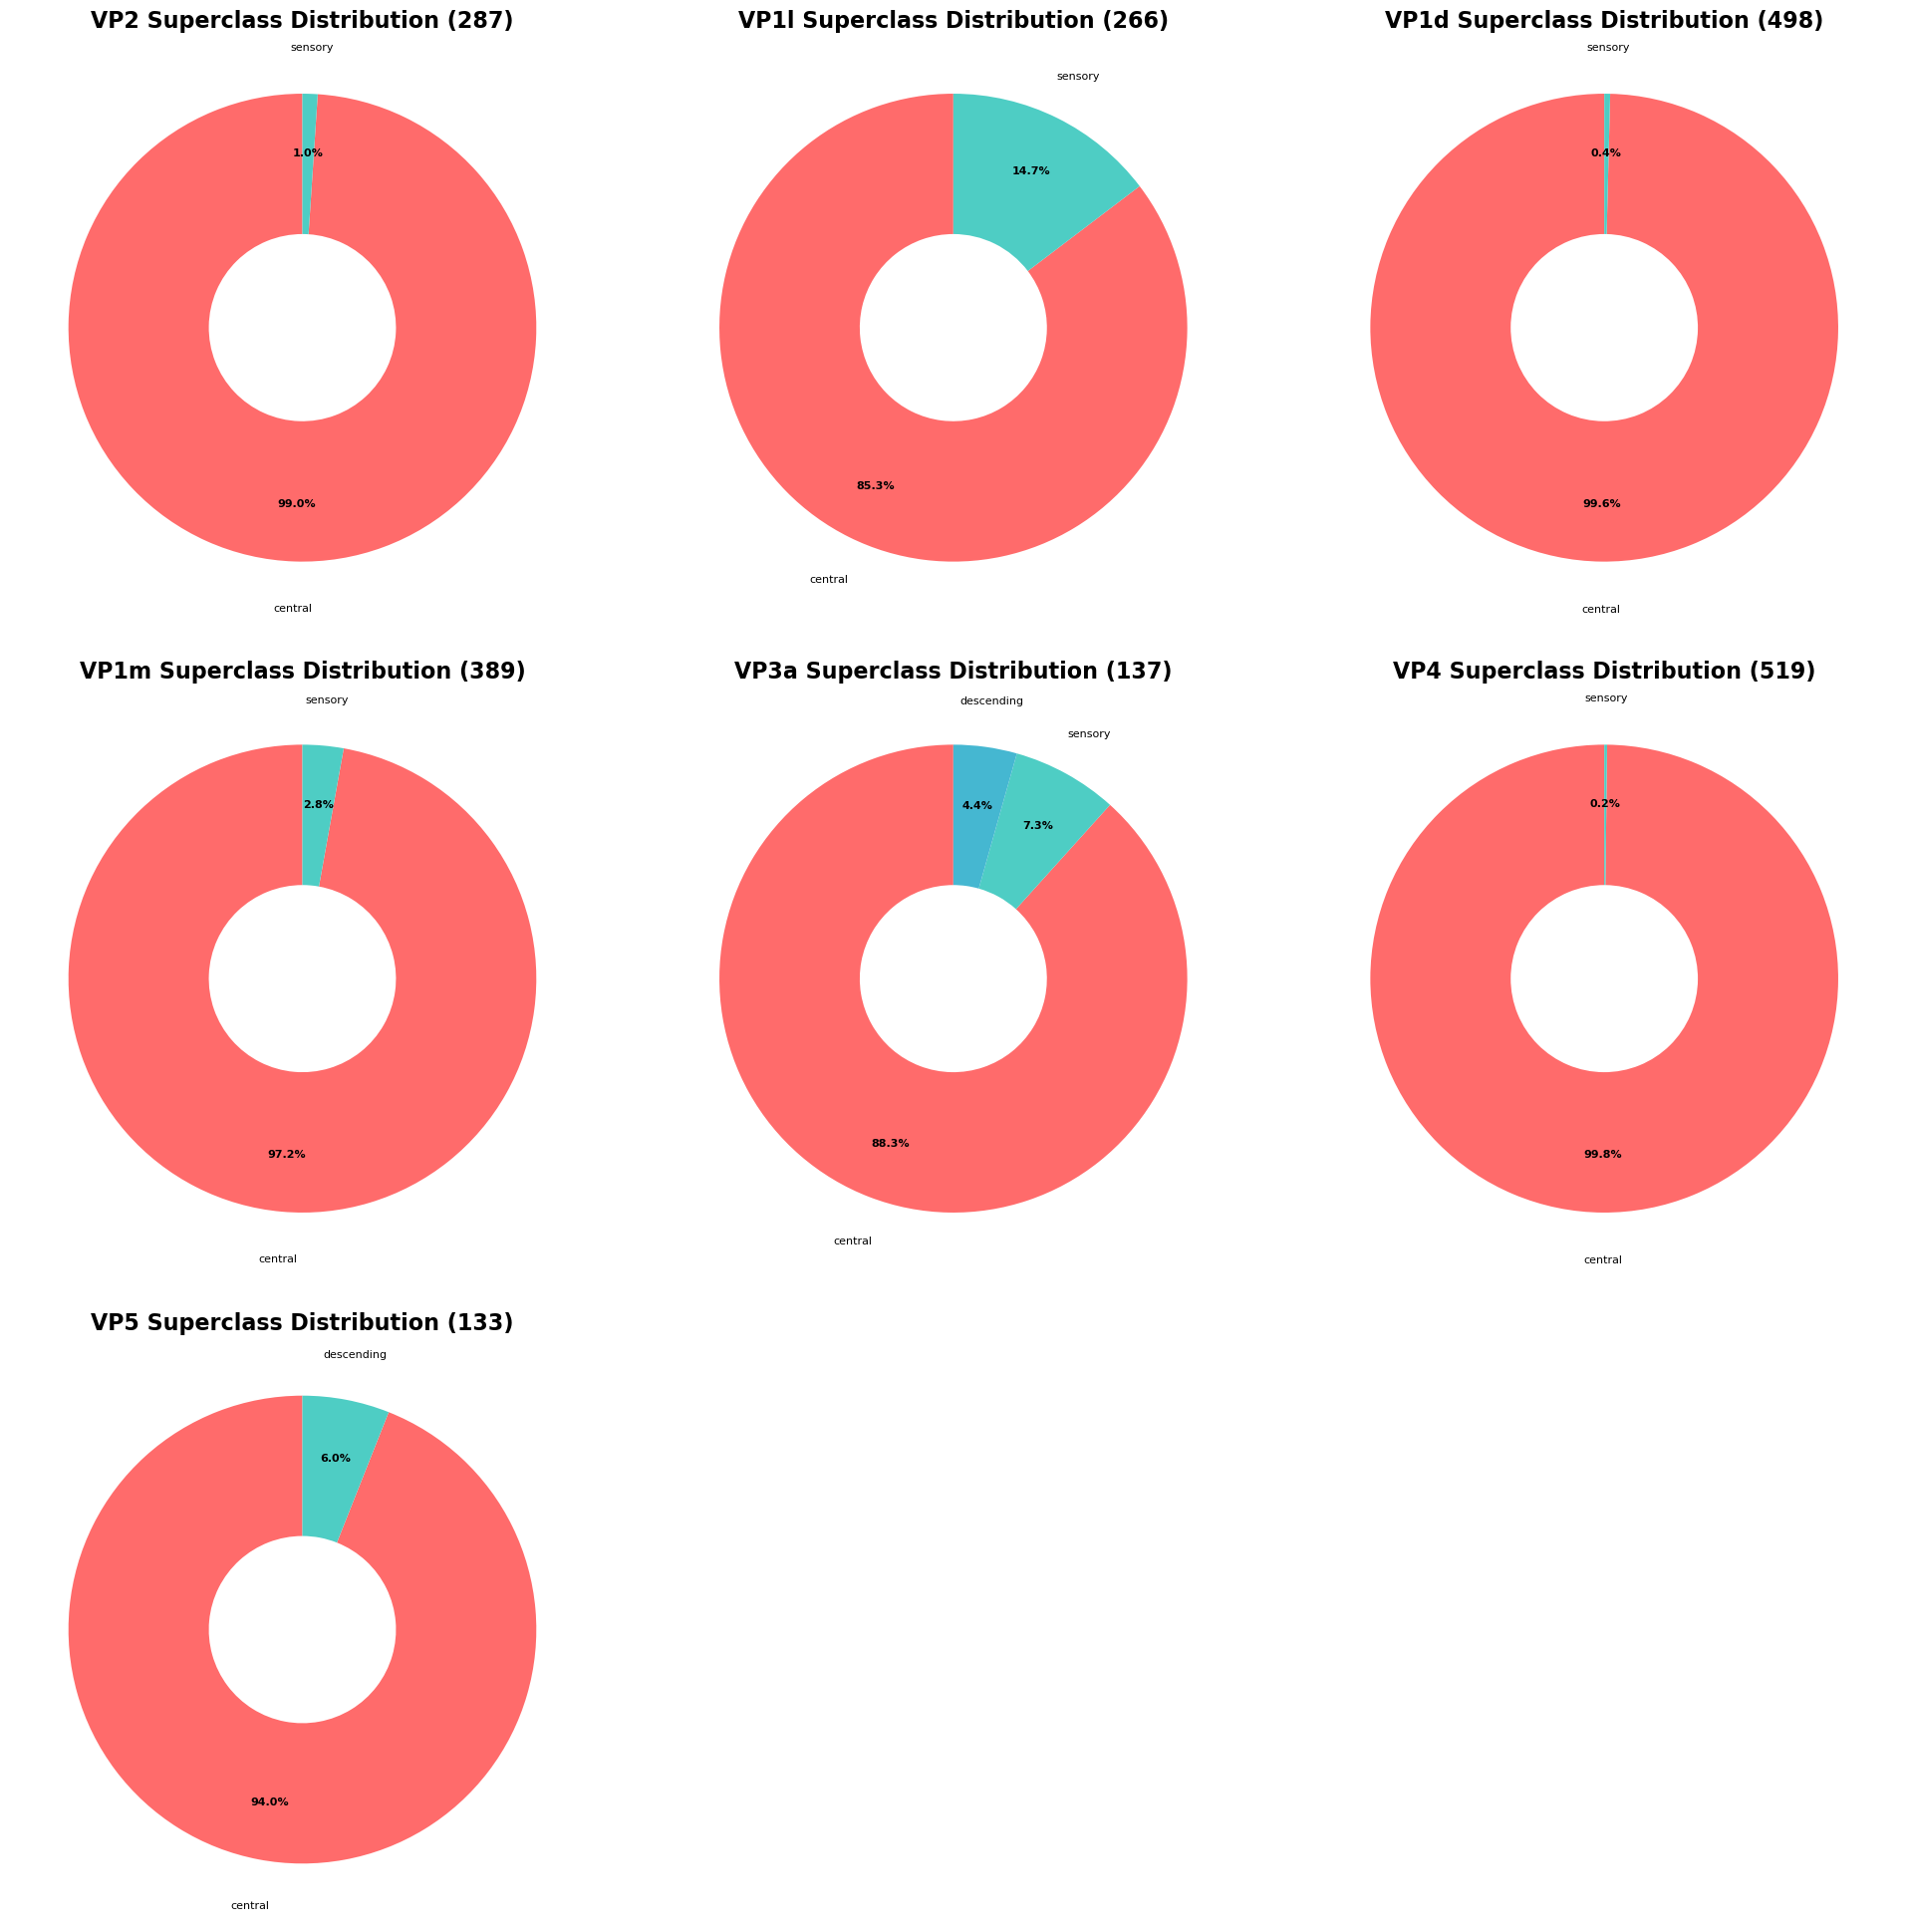

In [54]:
# Loop through each VP and print the number of 2N neurons
for vp, df in downstream_2N_dict.items():
    # Get total number of neurons in this VP
    total_neurons = len(df)
    # Calculate percentage of 2N neurons in this VP
    shared_neurons = len(set(df['root_id']) & set(vp_dfs[vp]['root_id']))
    print(shared_neurons/total_neurons)
    
# Create a figure with subplots for each VP to show superclass distributions
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
axs = axs.flatten()

# Define colors for consistency - using a more distinct color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', 
          '#D4A5A5', '#9B59B6', '#3498DB', '#2ECC71', '#F1C40F']

# Loop through each VP and create a pie chart
for i, (vp, df) in enumerate(downstream_2N_dict.items()):
    # Get total number of neurons
    n = len(df)
    
    # Count the occurrences of each superclass
    superclass_counts = df['super_class'].value_counts()
    
    # Print out the superclass distribution
    print(f"\n{vp} Superclass Distribution ({n}):")
    print(superclass_counts)
    print(f"Total count: {superclass_counts.sum()}")
    
    wedges, texts, autotexts = axs[i].pie(superclass_counts.values, 
                                         labels=superclass_counts.index, 
                                         autopct='%1.1f%%', 
                                         startangle=90, 
                                         colors=colors[:len(superclass_counts)],
                                         wedgeprops=dict(width=0.6),
                                         pctdistance=0.75,
                                         labeldistance=1.1)
    
    # Enhance the appearance of labels and percentages
    plt.setp(autotexts, size=8, weight="bold", color="black")
    plt.setp(texts, size=8)
    
    # Adjust label positions to prevent overlap
    for text, wedge in zip(texts, wedges):
        angle = (wedge.theta1 + wedge.theta2) / 2
        x = wedge.r * 1.2 * np.cos(np.radians(angle))
        y = wedge.r * 1.2 * np.sin(np.radians(angle))
        text.set_position((x, y))
        text.set_ha('center')
        text.set_va('center')
    
    axs[i].set_title(f'{vp} Superclass Distribution ({n})', fontsize=16, fontweight='bold')

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=3.0)
plt.show()


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

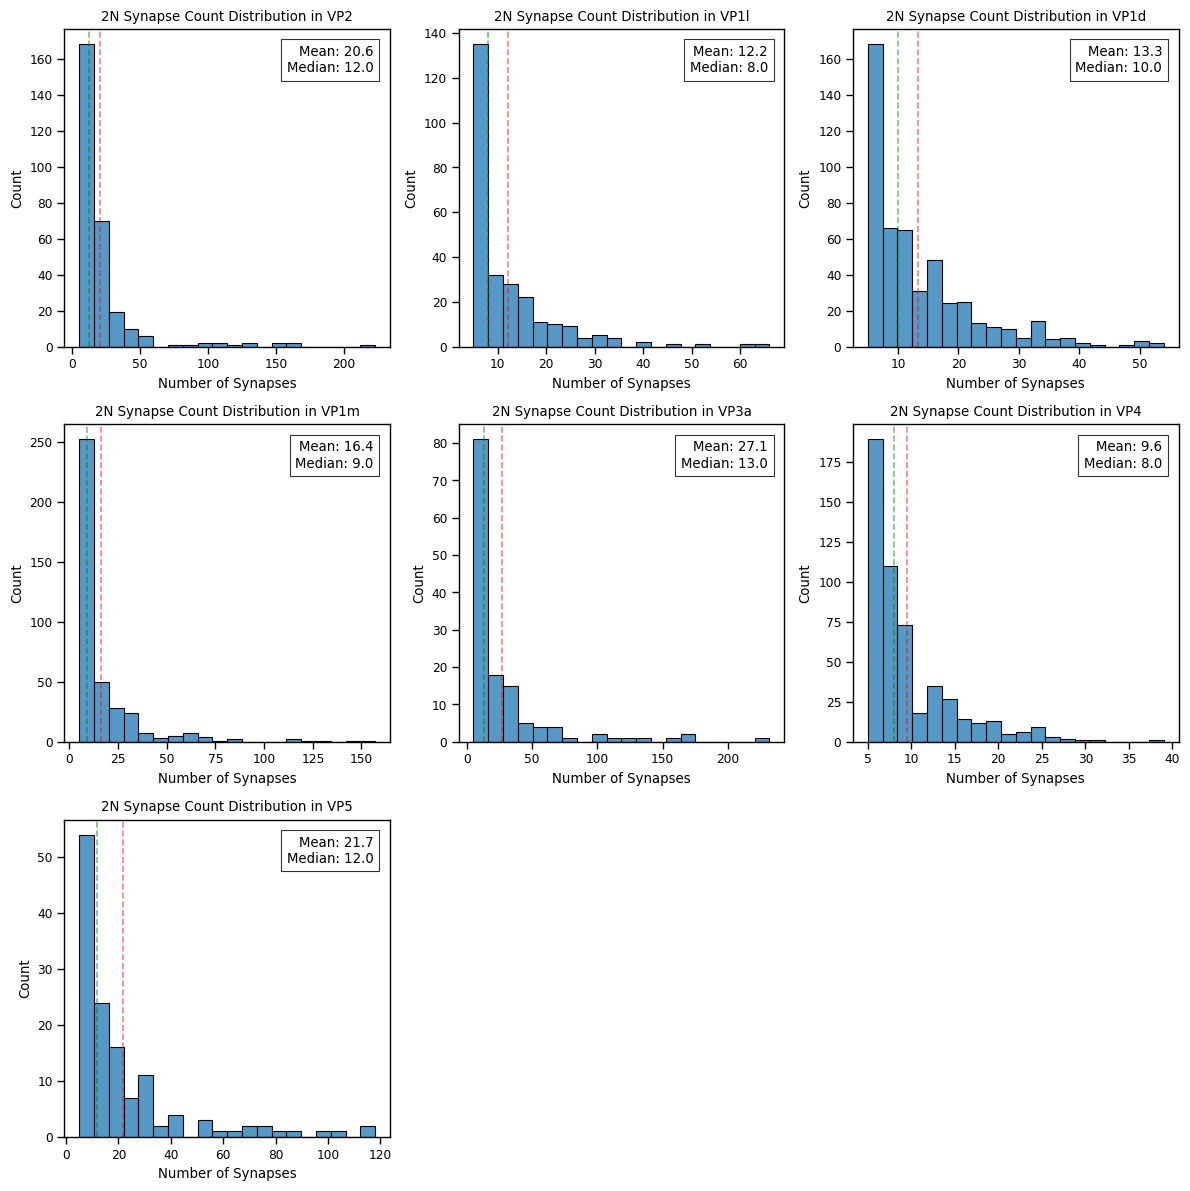

In [31]:
# Create a figure with subplots for each VP to show synapse count distributions
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()

# Loop through each VP and create a histogram
for i, (vp, df) in enumerate(connections_2N_dict.items()):
    # Create histogram of synapse counts
    sns.histplot(data=df, x='syn_count', ax=axs[i], bins=20)
    
    # Customize the plot
    axs[i].set_title(f'2N Synapse Count Distribution in {vp}')
    axs[i].set_xlabel('Number of Synapses')
    axs[i].set_ylabel('Count')
    
    # Add mean and median annotations
    mean_syns = df['syn_count'].mean()
    median_syns = df['syn_count'].median()
    axs[i].axvline(mean_syns, color='red', linestyle='--', alpha=0.5)
    axs[i].axvline(median_syns, color='green', linestyle='--', alpha=0.5)
    
    # Add legend
    axs[i].text(0.95, 0.95, f'Mean: {mean_syns:.1f}\nMedian: {median_syns:.1f}', 
                transform=axs[i].transAxes, 
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.8))

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


In [29]:
# Display the lone hygrosensory 2N
print("Lone hygrosensory 2N:")
print(unique_downstream_2N_dict['VP1l'][unique_downstream_2N_dict['VP1l']['super_class']=='sensory'])


# Display connections for 2N neuron with post root id 720575940617986345 in VP1l
print("\nConnections for 2N neuron with post root id 720575940617986345 in VP1l:")
connections_2N_dict['VP1l'][connections_2N_dict['VP1l']['post_root_id'] == 720575940617986345]



Lone hygrosensory 2N:
                root_id      flow super_class         class sub_class  \
254  720575940617986345  afferent     sensory  hygrosensory       NaN   

    cell_type hemibrain_type hemilineage  side nerve activation_25Hz label  \
254       NaN       HRN_VP1d         NaN  left    AN       activated  vp1l   

    activation_50Hz activation_75Hz activation_100Hz activation_125Hz  \
254       activated       activated        activated        activated   

    activation_150Hz activation_175Hz activation_200Hz  
254        activated        activated        activated  

Connections for 2N neuron with post root id 720575940617986345 in VP1l:


pre_root_id        post_root_id neuropil  syn_count nt_type
211  720575940626580361  720575940617986345     AL_L          5     ACH

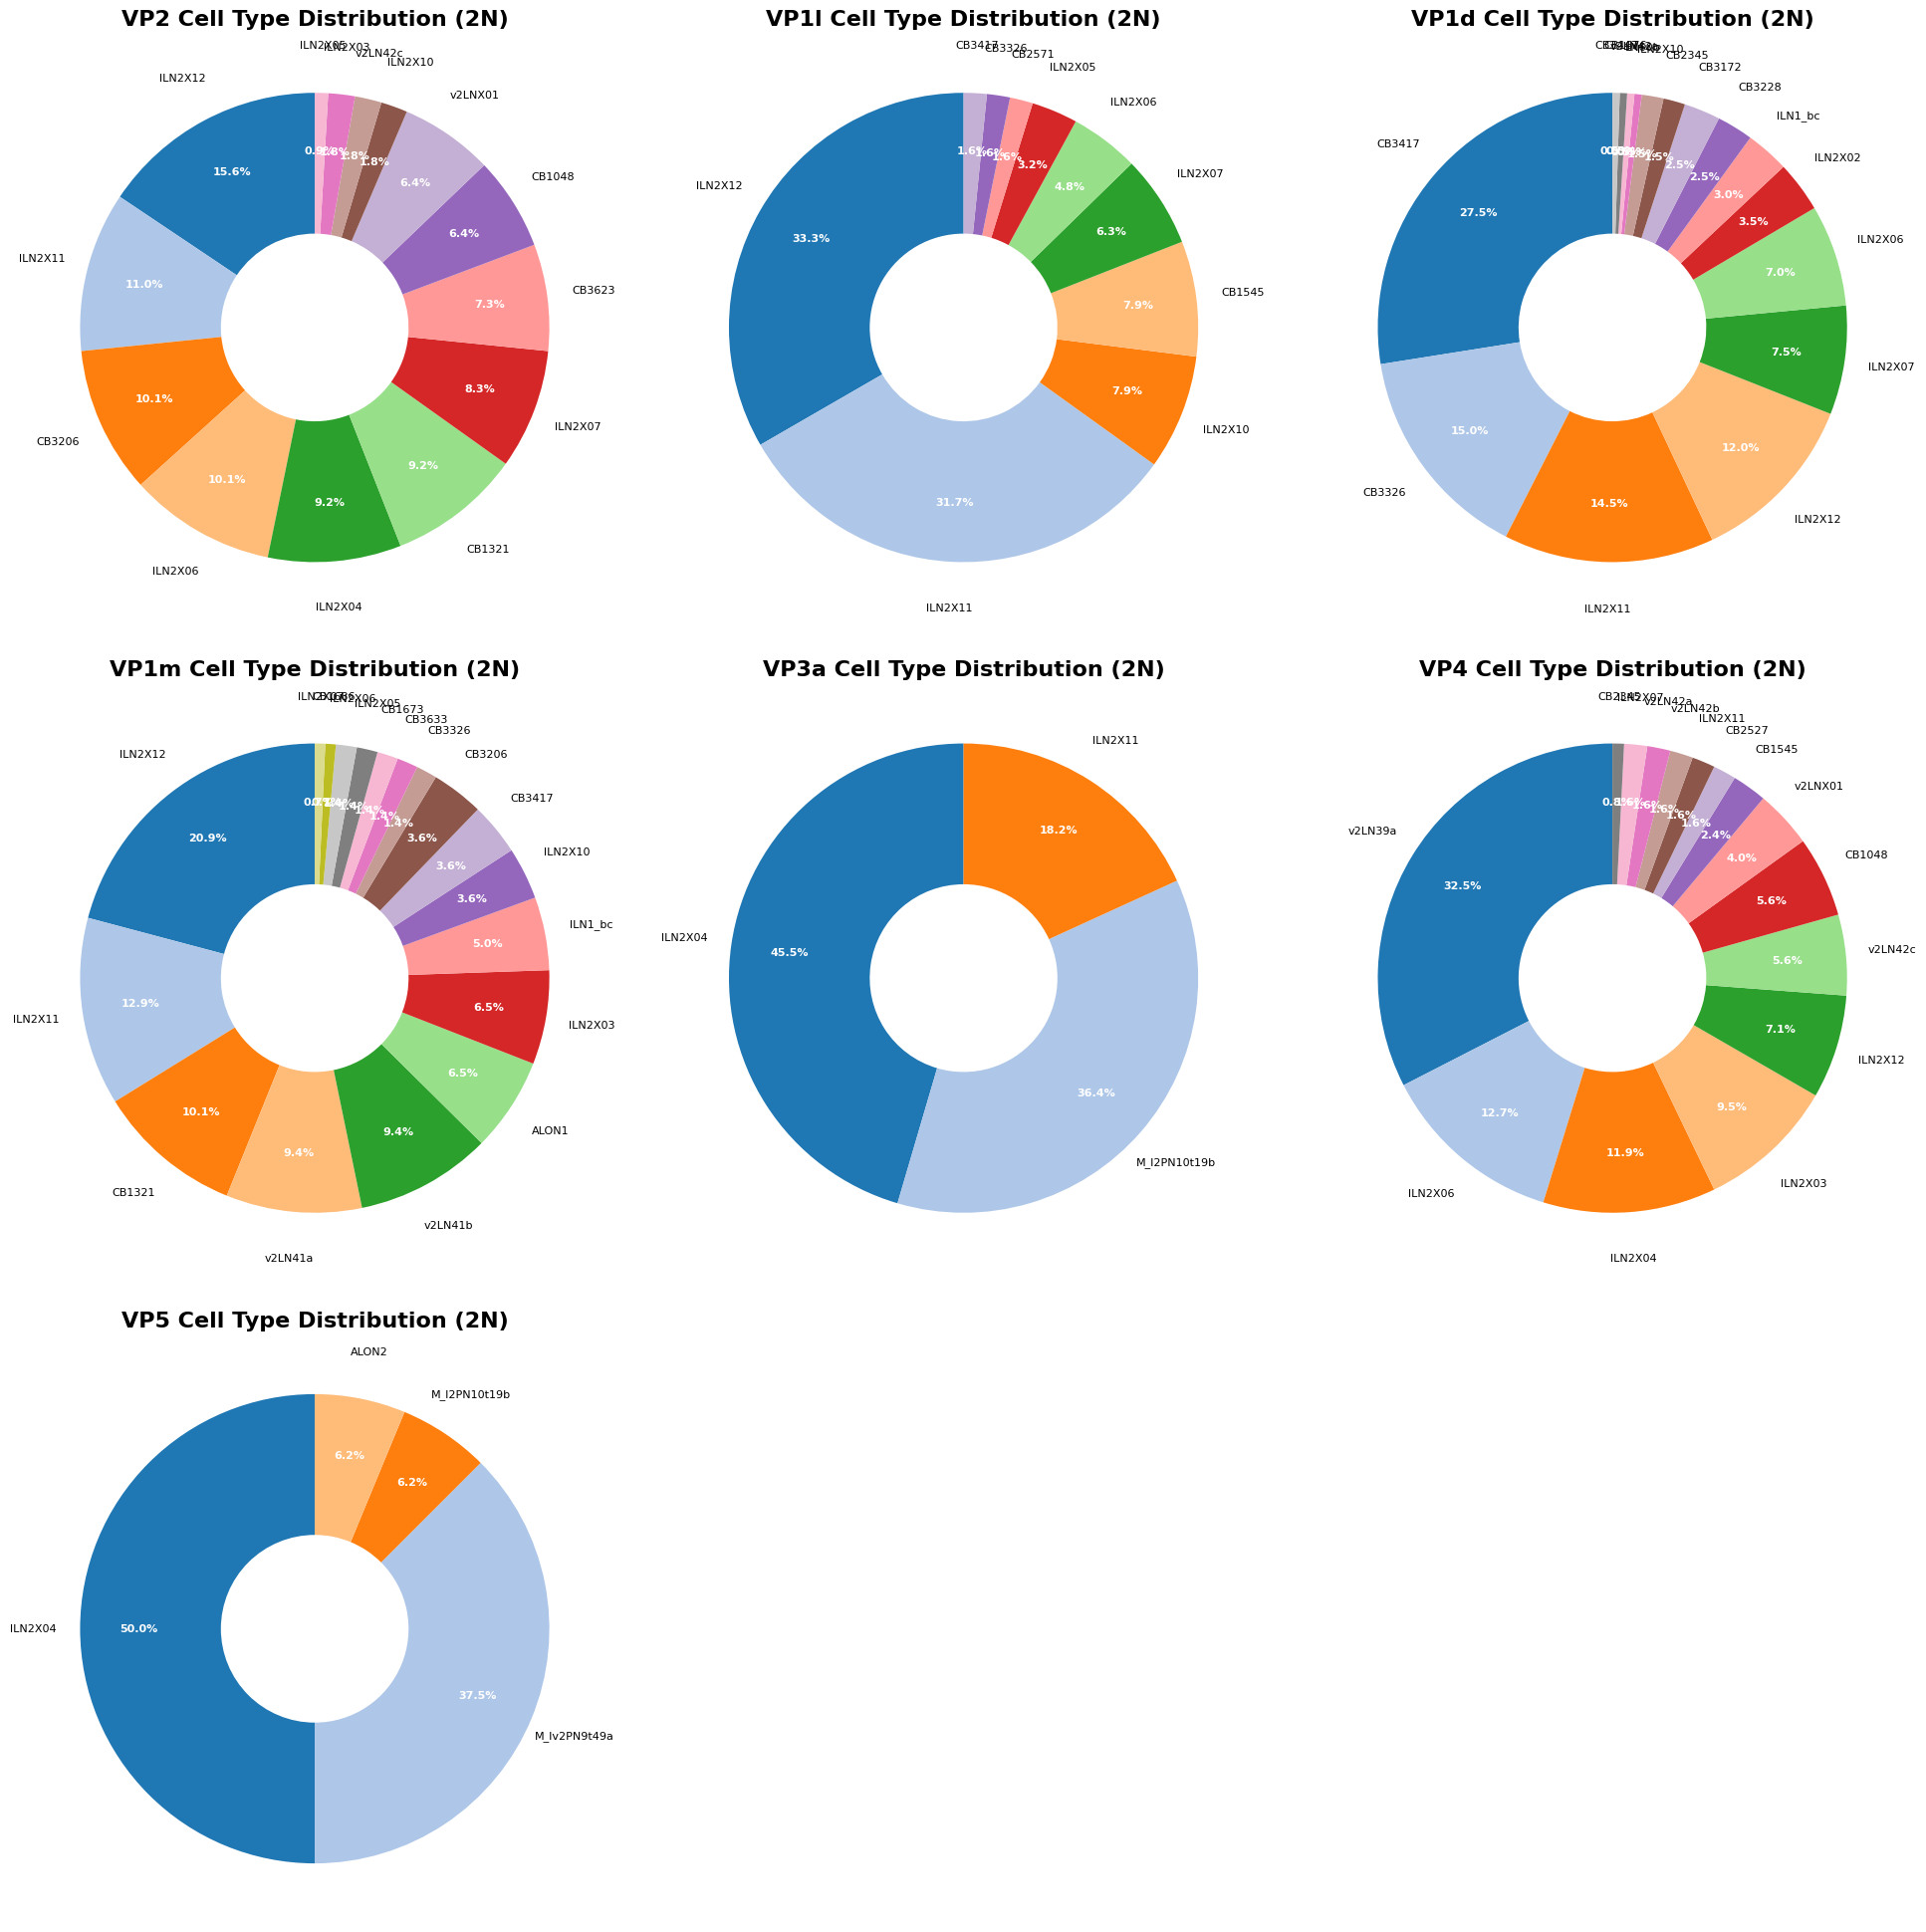

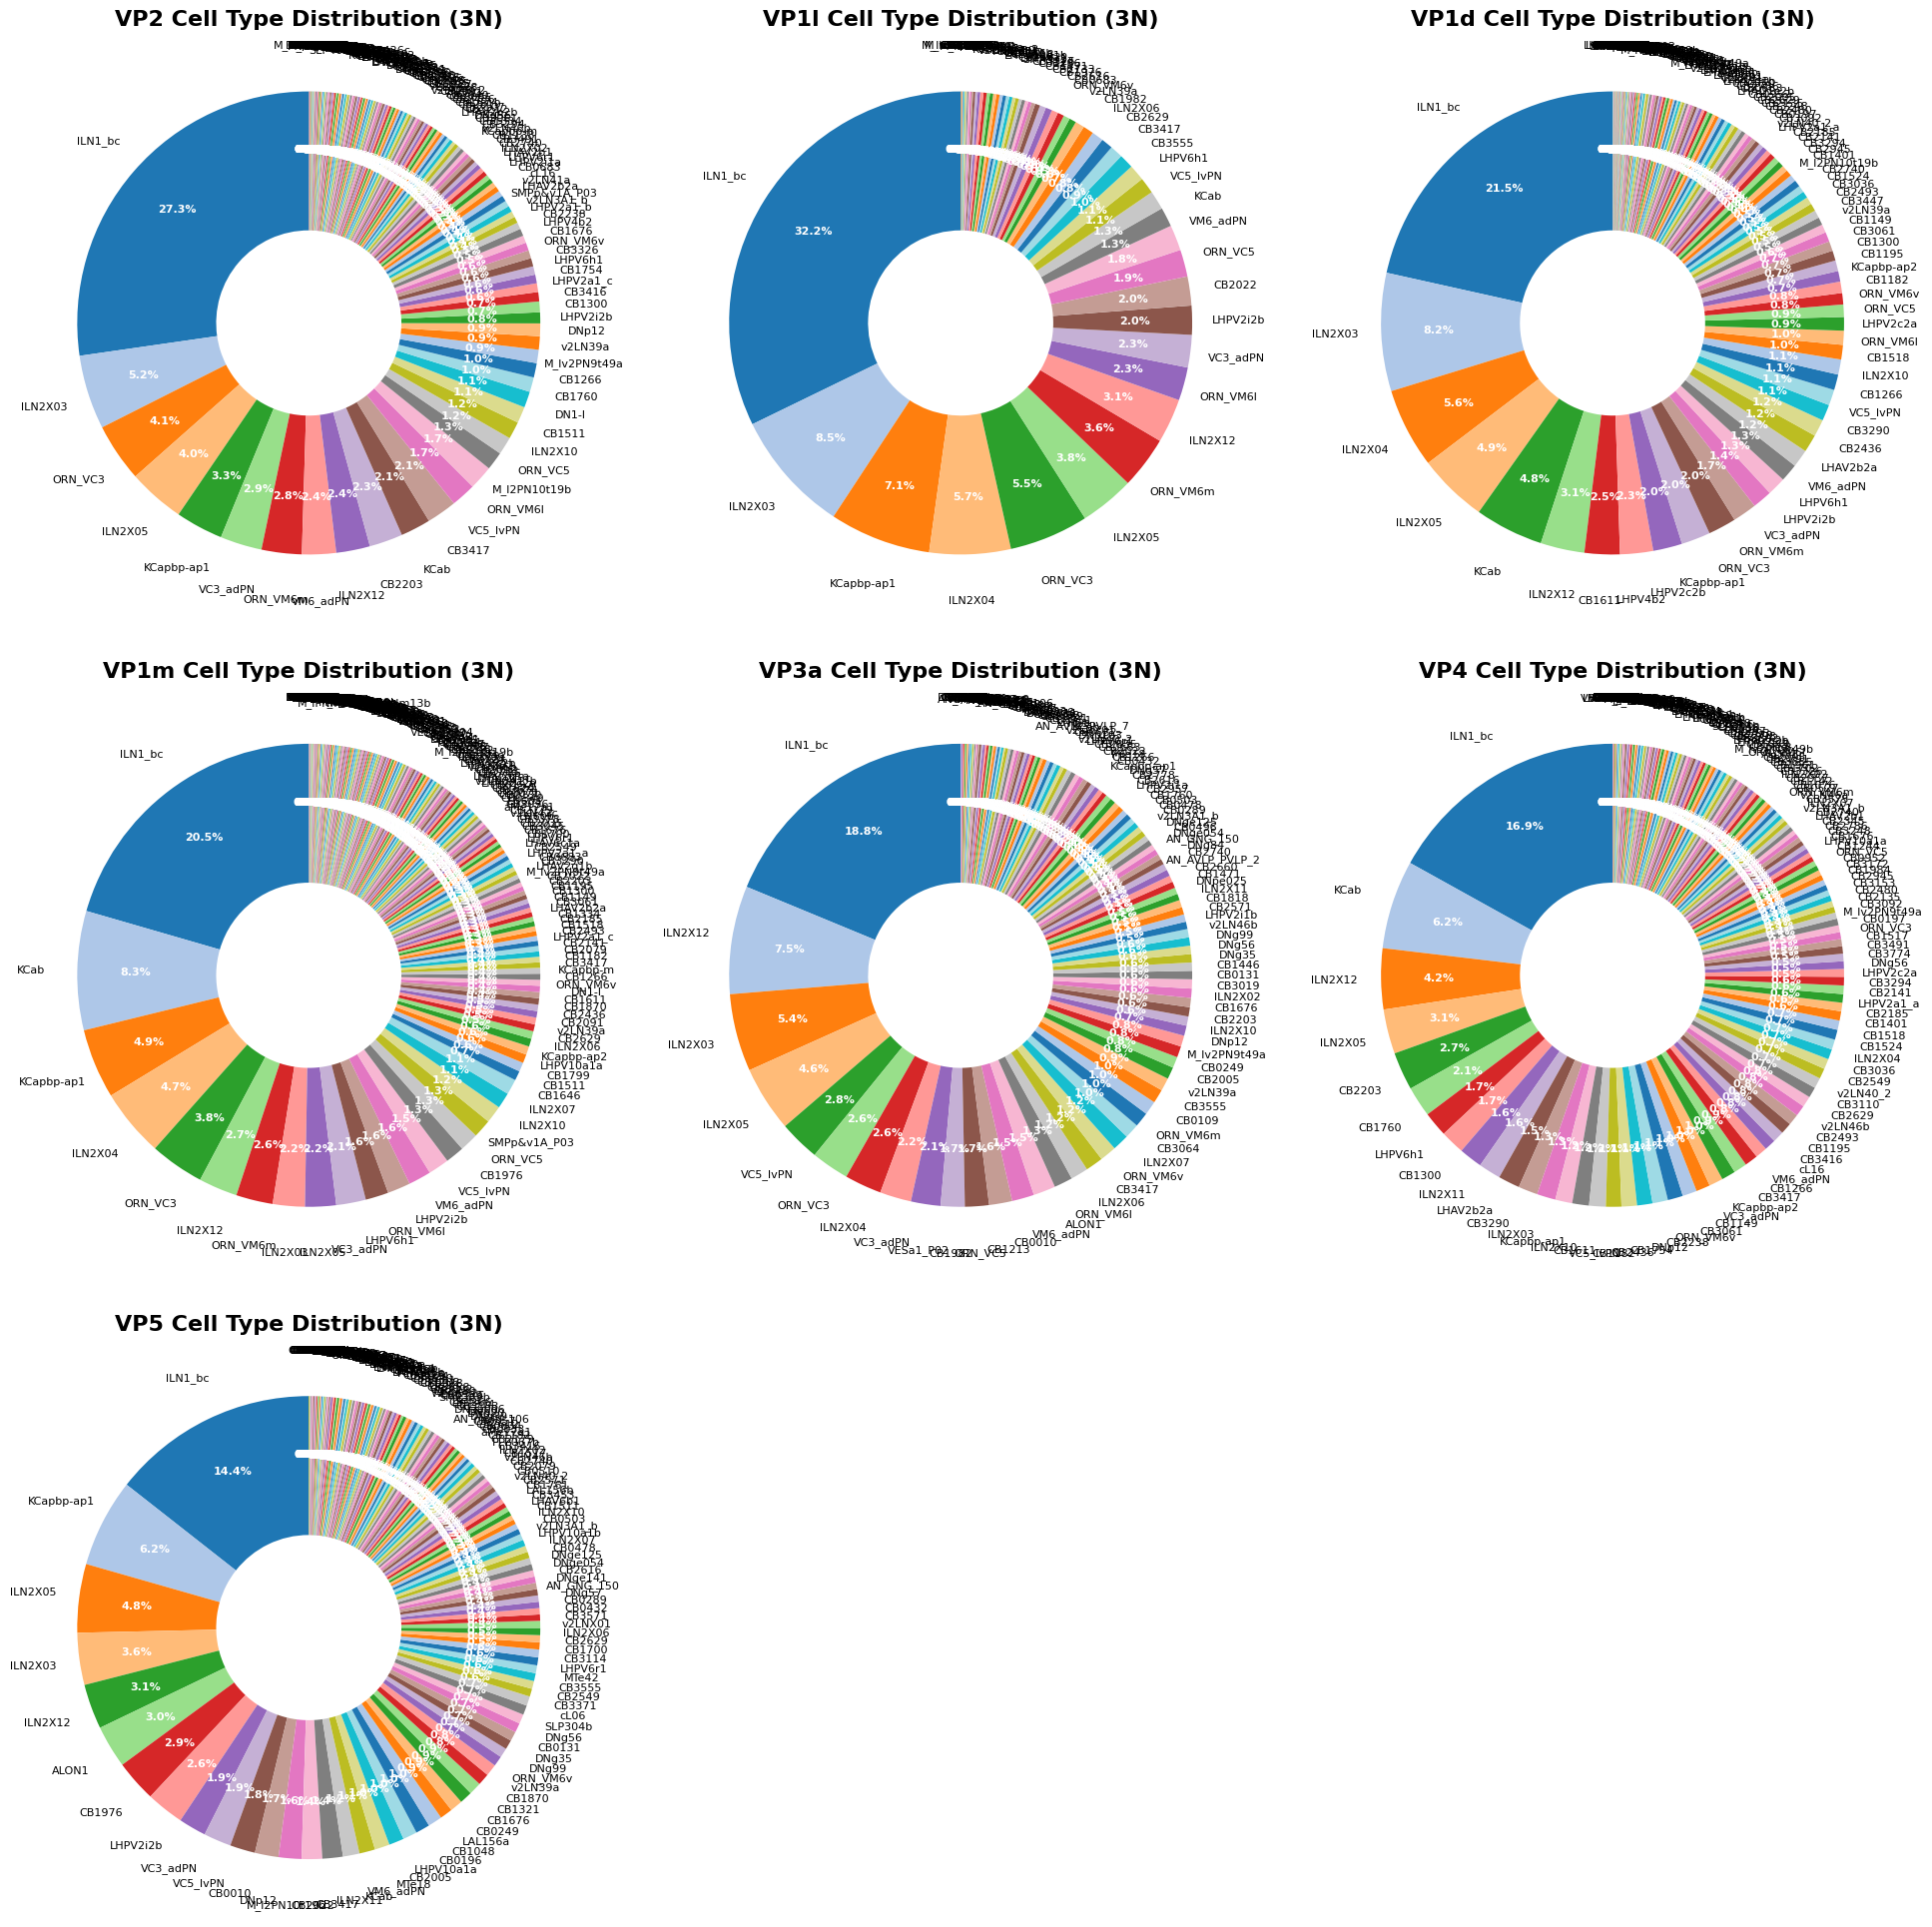

In [12]:
# Create figures with subplots for each VP for both 2N and 3N, using 'cell_type'
for n, downstream_dict in [('2N', unique_downstream_2N_dict), ('3N', unique_downstream_3N_dict)]:
    fig, axs = plt.subplots(3, 3, figsize=(20, 20))
    axs = axs.flatten()

    # Define a color palette
    colors = plt.cm.tab20(np.linspace(0, 1, 20))  # Using tab20 colormap for more distinct colors

    # Loop through each VP and create a pie chart
    for i, (vp, df) in enumerate(downstream_dict.items()):
        # Count the occurrences of each cell_type
        cell_type_counts = df['cell_type'].value_counts()
        
        wedges, texts, autotexts = axs[i].pie(cell_type_counts.values, 
                                              labels=cell_type_counts.index, 
                                              autopct='%1.1f%%', 
                                              startangle=90, 
                                              colors=colors[:len(cell_type_counts)],
                                              wedgeprops=dict(width=0.6),
                                              pctdistance=0.75,
                                              labeldistance=1.1)
        
        # Enhance the appearance of labels and percentages
        plt.setp(autotexts, size=8, weight="bold", color="white")
        plt.setp(texts, size=8)
        
        # Adjust label positions to prevent overlap
        for text, wedge in zip(texts, wedges):
            angle = (wedge.theta1 + wedge.theta2) / 2
            x = wedge.r * 1.2 * np.cos(np.radians(angle))
            y = wedge.r * 1.2 * np.sin(np.radians(angle))
            text.set_position((x, y))
            text.set_ha('center')
            text.set_va('center')
        
        axs[i].set_title(f'{vp} Cell Type Distribution ({n})', fontsize=16, fontweight='bold')

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout(pad=3.0)
    plt.show()


/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sebastiankyllmann/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

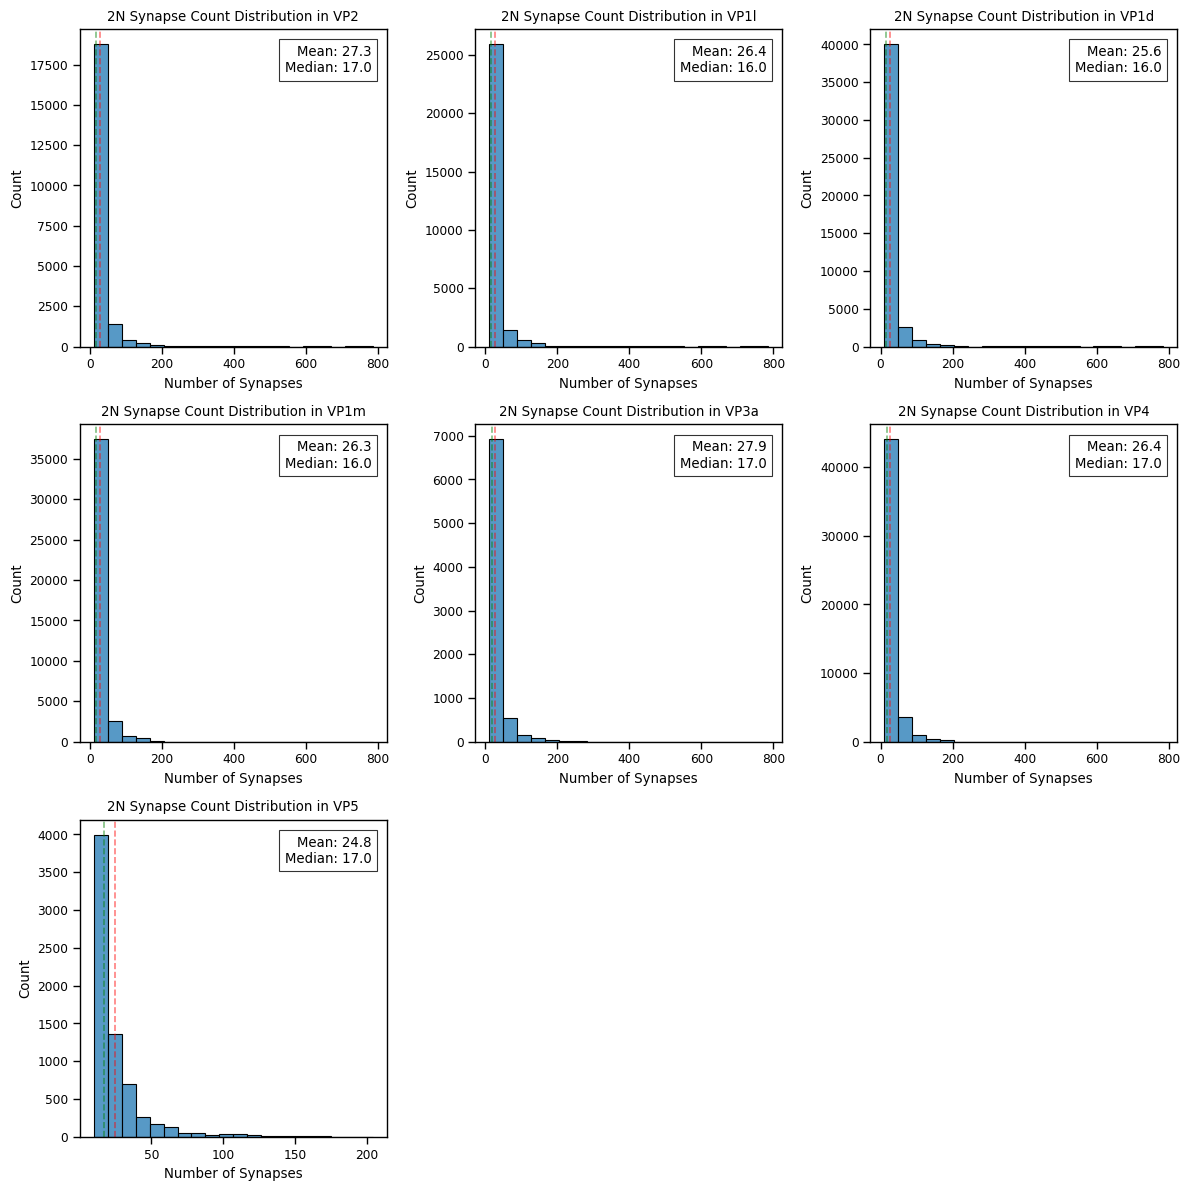

In [32]:
# Create a figure with subplots for each VP to show synapse count distributions
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()

# Loop through each VP and create a histogram
for i, (vp, df) in enumerate(connections_3N_dict.items()):
    # Create histogram of synapse counts
    sns.histplot(data=df, x='syn_count', ax=axs[i], bins=20)
    
    # Customize the plot
    axs[i].set_title(f'2N Synapse Count Distribution in {vp}')
    axs[i].set_xlabel('Number of Synapses')
    axs[i].set_ylabel('Count')
    
    # Add mean and median annotations
    mean_syns = df['syn_count'].mean()
    median_syns = df['syn_count'].median()
    axs[i].axvline(mean_syns, color='red', linestyle='--', alpha=0.5)
    axs[i].axvline(median_syns, color='green', linestyle='--', alpha=0.5)
    
    # Add legend
    axs[i].text(0.95, 0.95, f'Mean: {mean_syns:.1f}\nMedian: {median_syns:.1f}', 
                transform=axs[i].transAxes, 
                verticalalignment='top',
                horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.8))

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

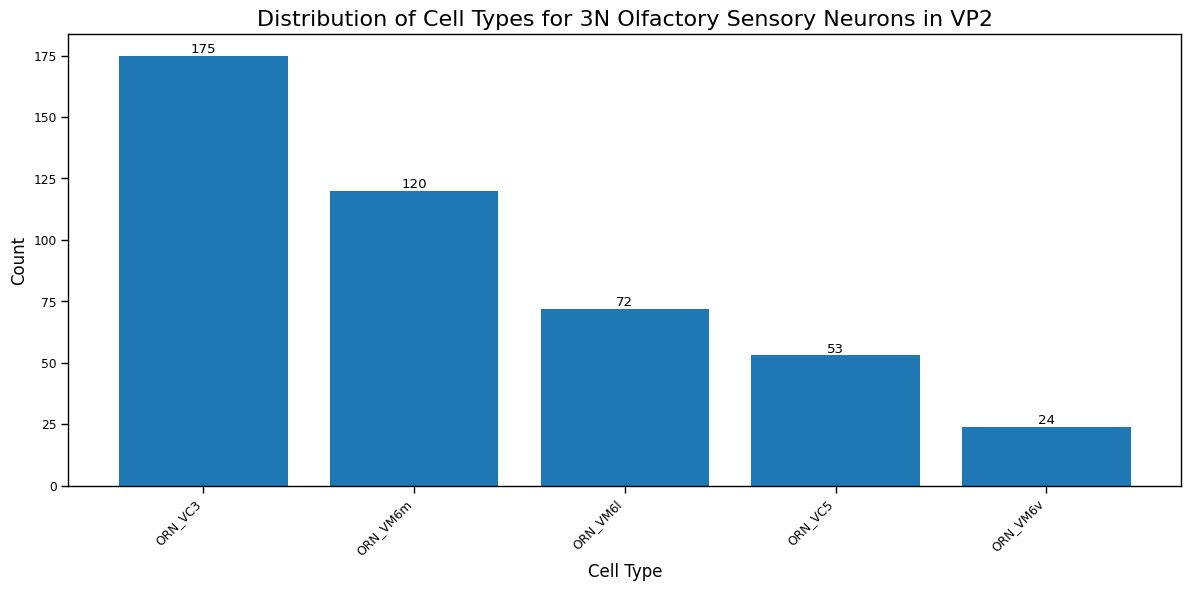

Cell type counts for VP2:
ORN_VC3     175
ORN_VM6m    120
ORN_VM6l     72
ORN_VC5      53
ORN_VM6v     24
Name: cell_type, dtype: int64




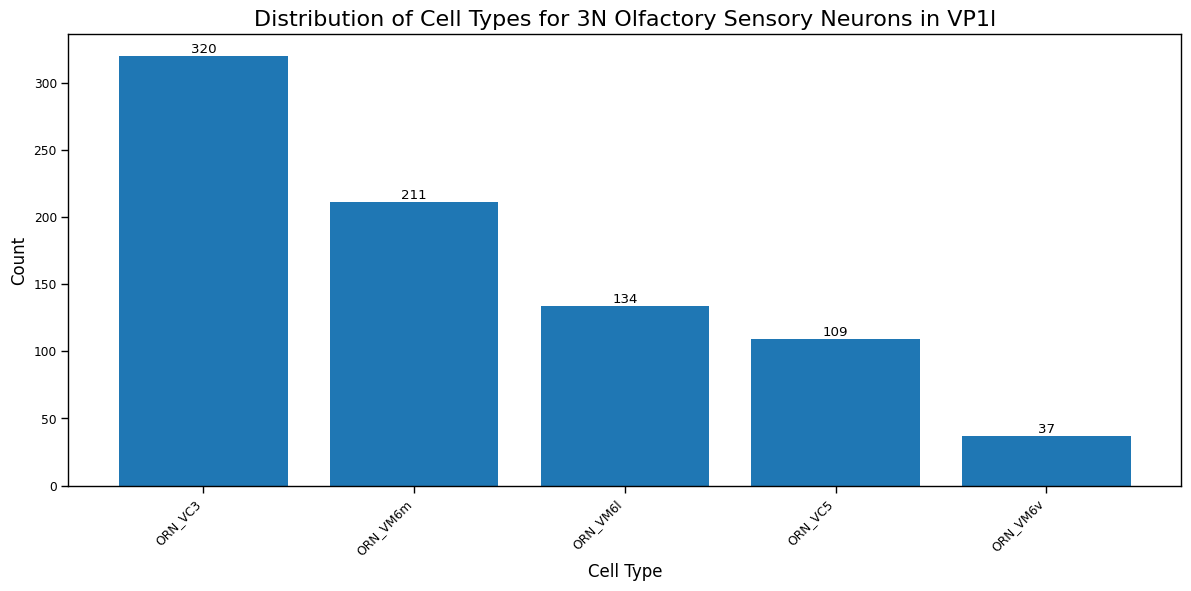

Cell type counts for VP1l:
ORN_VC3     320
ORN_VM6m    211
ORN_VM6l    134
ORN_VC5     109
ORN_VM6v     37
Name: cell_type, dtype: int64




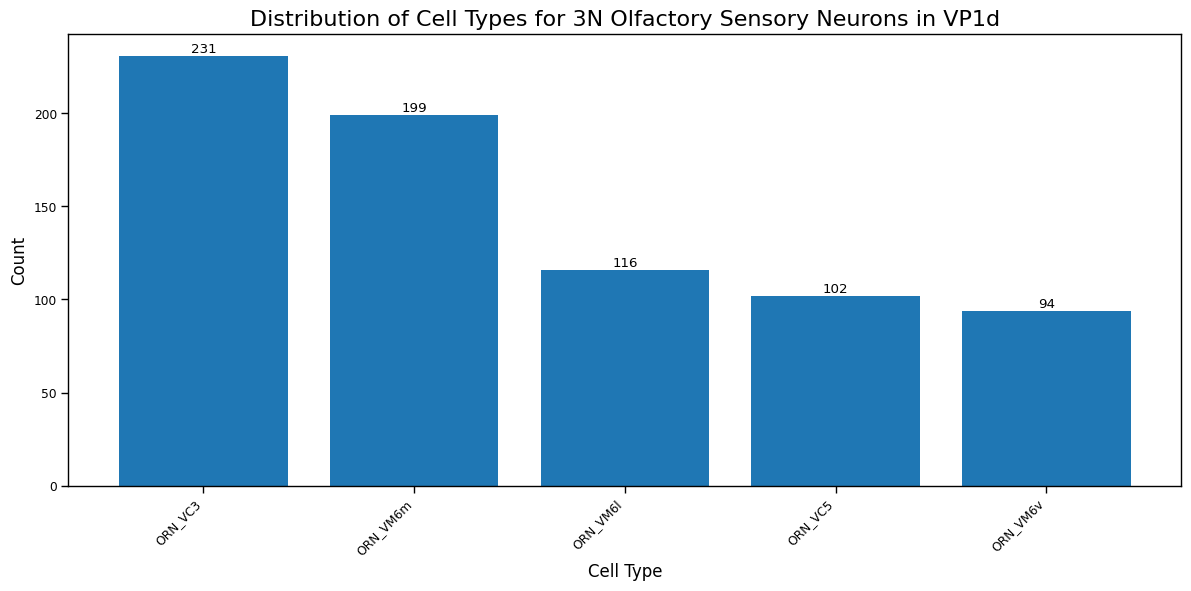

Cell type counts for VP1d:
ORN_VC3     231
ORN_VM6m    199
ORN_VM6l    116
ORN_VC5     102
ORN_VM6v     94
Name: cell_type, dtype: int64




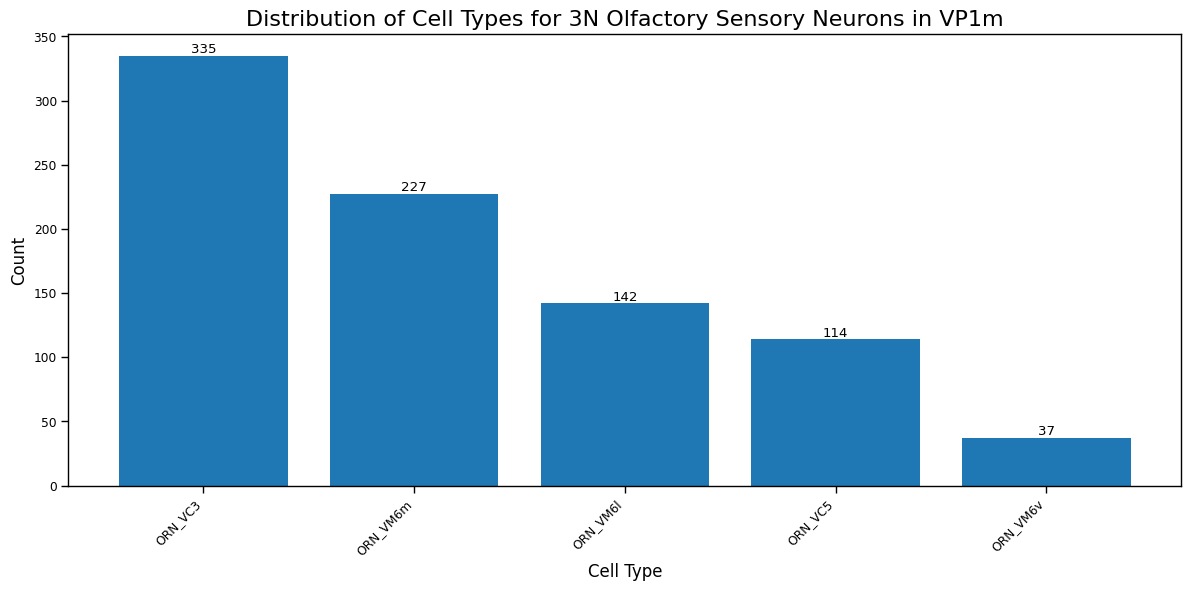

Cell type counts for VP1m:
ORN_VC3     335
ORN_VM6m    227
ORN_VM6l    142
ORN_VC5     114
ORN_VM6v     37
Name: cell_type, dtype: int64




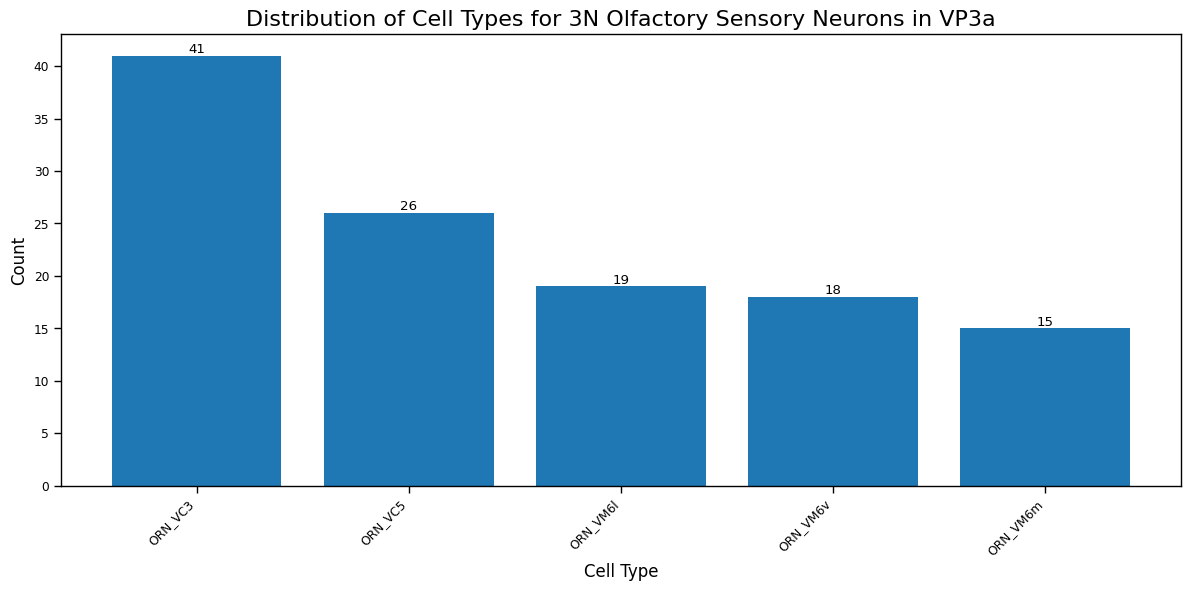

Cell type counts for VP3a:
ORN_VC3     41
ORN_VC5     26
ORN_VM6l    19
ORN_VM6v    18
ORN_VM6m    15
Name: cell_type, dtype: int64




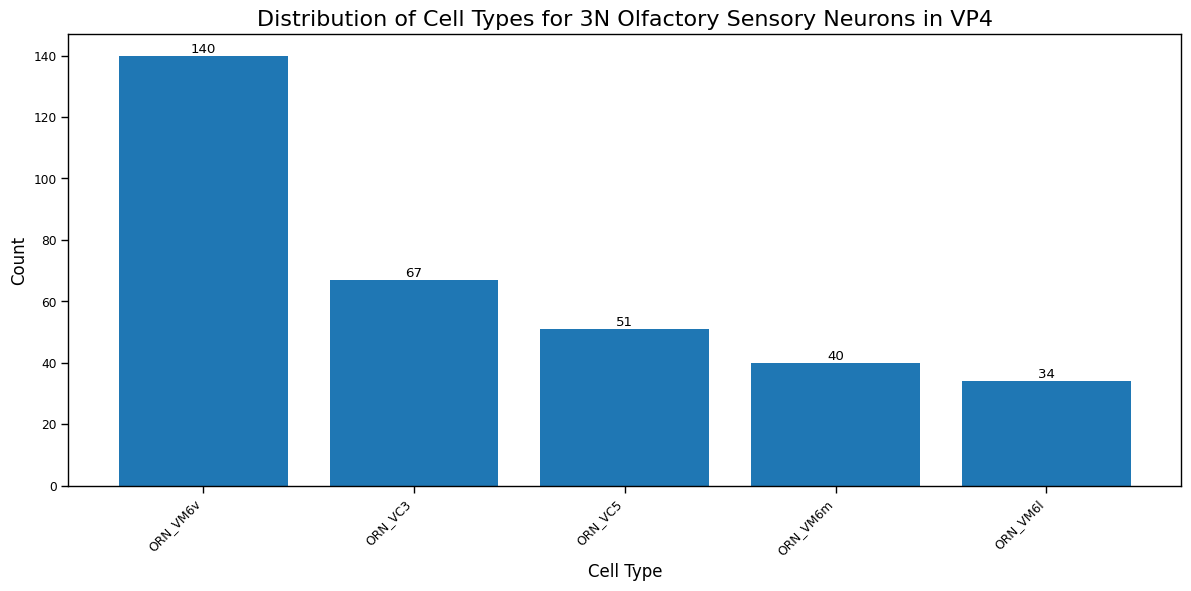

Cell type counts for VP4:
ORN_VM6v    140
ORN_VC3      67
ORN_VC5      51
ORN_VM6m     40
ORN_VM6l     34
Name: cell_type, dtype: int64




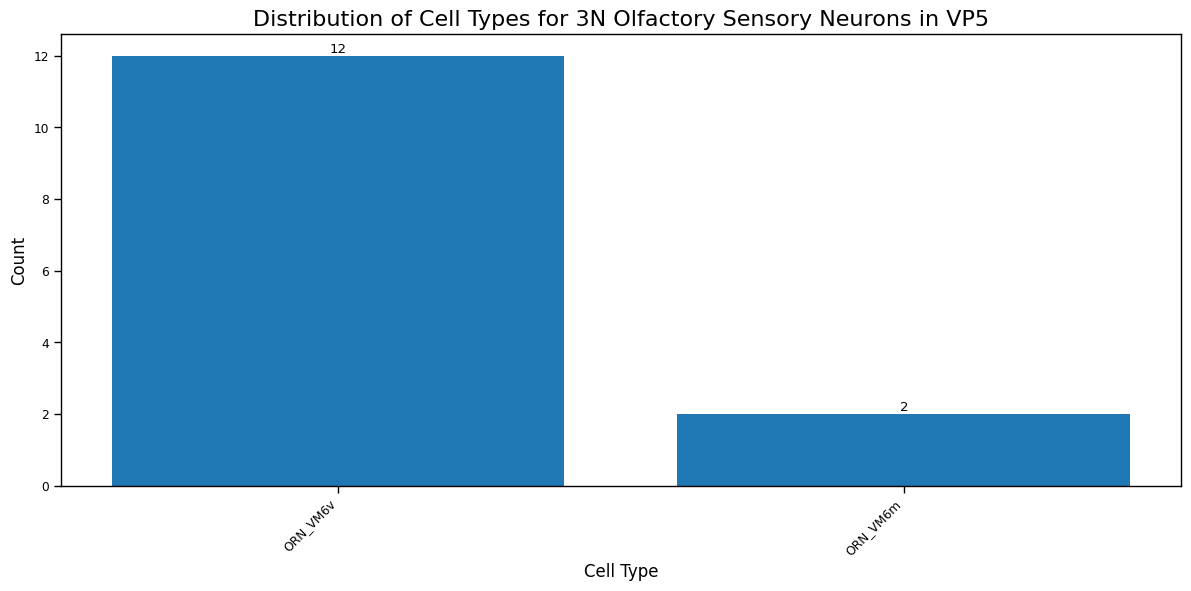

Cell type counts for VP5:
ORN_VM6v    12
ORN_VM6m     2
Name: cell_type, dtype: int64




In [13]:
# Iterate through all VP dataframes in the 3N dictionary
for vp, df in unique_downstream_3N_dict.items():
    # Filter the 3N sensory neurons for olfactory class
    olfactory_3N = df[df['class'] == 'olfactory']

    # Count the occurrences of each cell type
    cell_type_counts = olfactory_3N['cell_type'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(cell_type_counts.index, cell_type_counts.values)

    # Customize the plot
    plt.title(f'Distribution of Cell Types for 3N Olfactory Sensory Neurons in {vp}', fontsize=16)
    plt.xlabel('Cell Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print out the counts for verification
    print(f"Cell type counts for {vp}:")
    print(cell_type_counts)
    print("\n")


Neurotransmitter counts for VP2 (2N):
ACH     286
GABA      1
Name: nt_type, dtype: int64


Neurotransmitter counts for VP1l (2N):
ACH     262
SER       2
GABA      2
Name: nt_type, dtype: int64


Neurotransmitter counts for VP1d (2N):
ACH    489
DA       9
Name: nt_type, dtype: int64


Neurotransmitter counts for VP1m (2N):
ACH     387
GABA      2
Name: nt_type, dtype: int64


Neurotransmitter counts for VP3a (2N):
ACH     124
GABA     11
SER       2
Name: nt_type, dtype: int64


Neurotransmitter counts for VP4 (2N):
ACH    519
Name: nt_type, dtype: int64




IndexError: index 6 is out of bounds for axis 0 with size 6

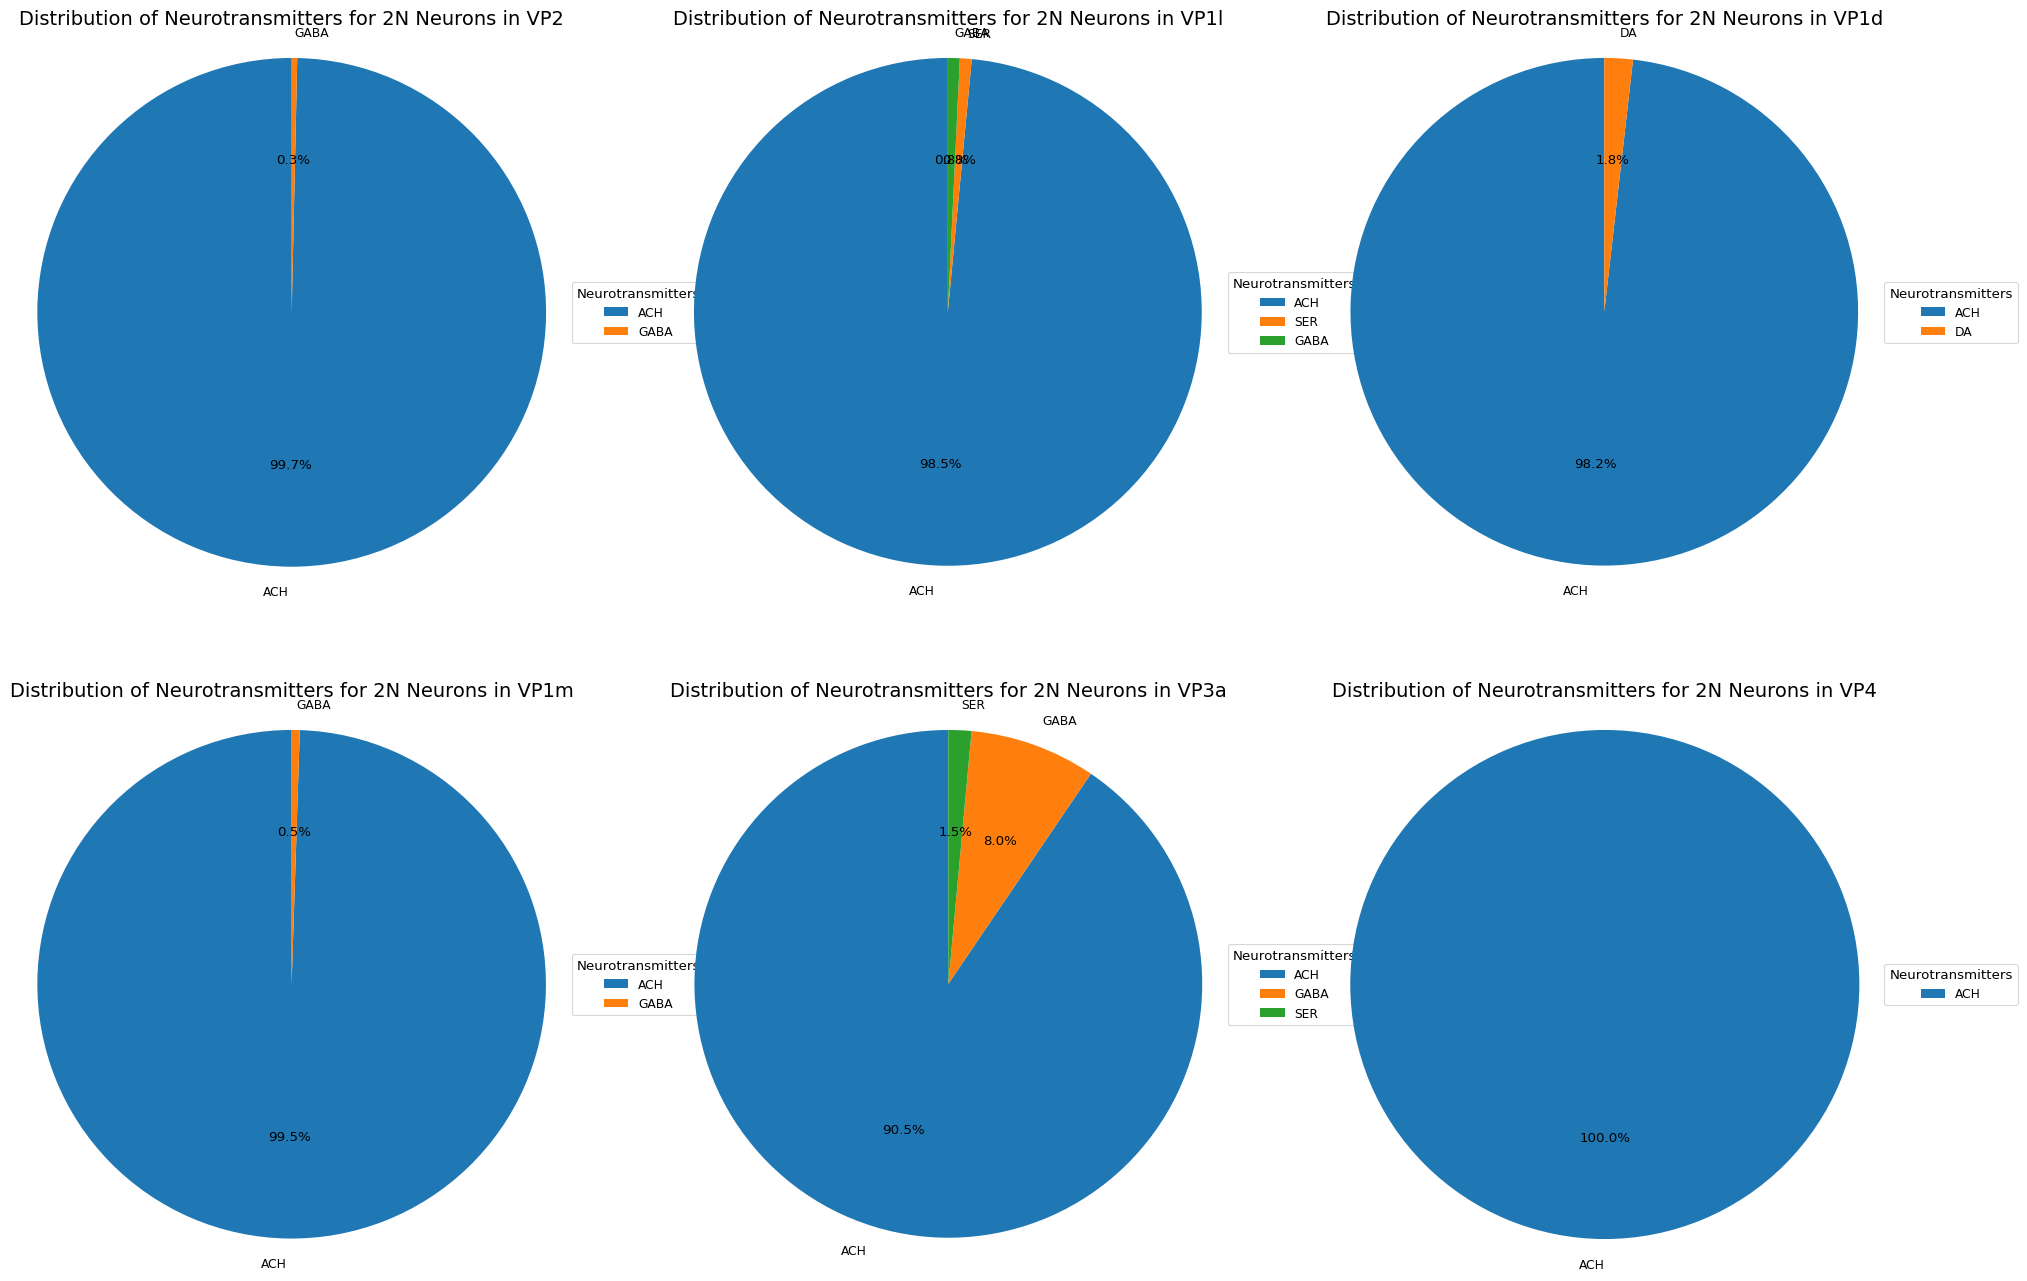

In [14]:
# Create a figure with subplots for all VPs
num_vps = len(connections_2N_dict)
fig, axs = plt.subplots(2, 3, figsize=(24, 16))
axs = axs.flatten()

# Iterate through all VP dataframes in the connections_2N_dict
for i, (vp, df) in enumerate(connections_2N_dict.items()):
    # Count the occurrences of each neurotransmitter type
    nt_counts = df['nt_type'].value_counts()

    # Create a pie chart in the corresponding subplot
    axs[i].pie(nt_counts.values, labels=nt_counts.index, autopct='%1.1f%%', startangle=90)

    # Customize the plot
    axs[i].set_title(f'Distribution of Neurotransmitters for 2N Neurons in {vp}', fontsize=14)
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Add a legend
    axs[i].legend(title="Neurotransmitters", loc="center left", bbox_to_anchor=(1, 0.5))

    # Print out the counts for verification
    print(f"Neurotransmitter counts for {vp} (2N):")
    print(nt_counts)
    print("\n")

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and display the plot
plt.tight_layout(pad=3.0)
plt.show()



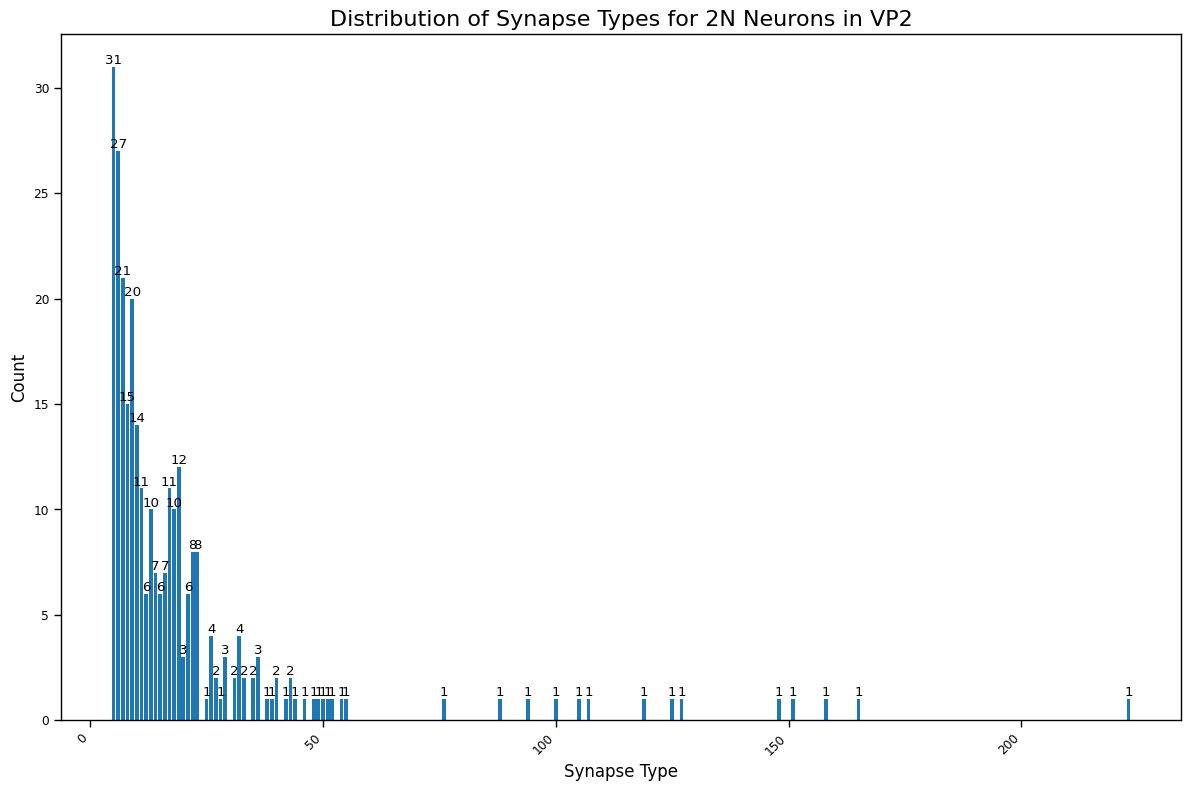

Synapse type counts for VP2 (2N):
5      31
6      27
7      21
9      20
8      15
10     14
19     12
11     11
17     11
13     10
18     10
23      8
22      8
16      7
14      7
21      6
12      6
15      6
32      4
26      4
20      3
36      3
29      3
27      2
35      2
43      2
40      2
31      2
33      2
28      1
88      1
25      1
49      1
119     1
127     1
107     1
38      1
46      1
158     1
151     1
50      1
52      1
223     1
125     1
55      1
44      1
51      1
54      1
165     1
100     1
39      1
42      1
94      1
48      1
105     1
148     1
76      1
Name: syn_count, dtype: int64
Median synapse count: 12.0




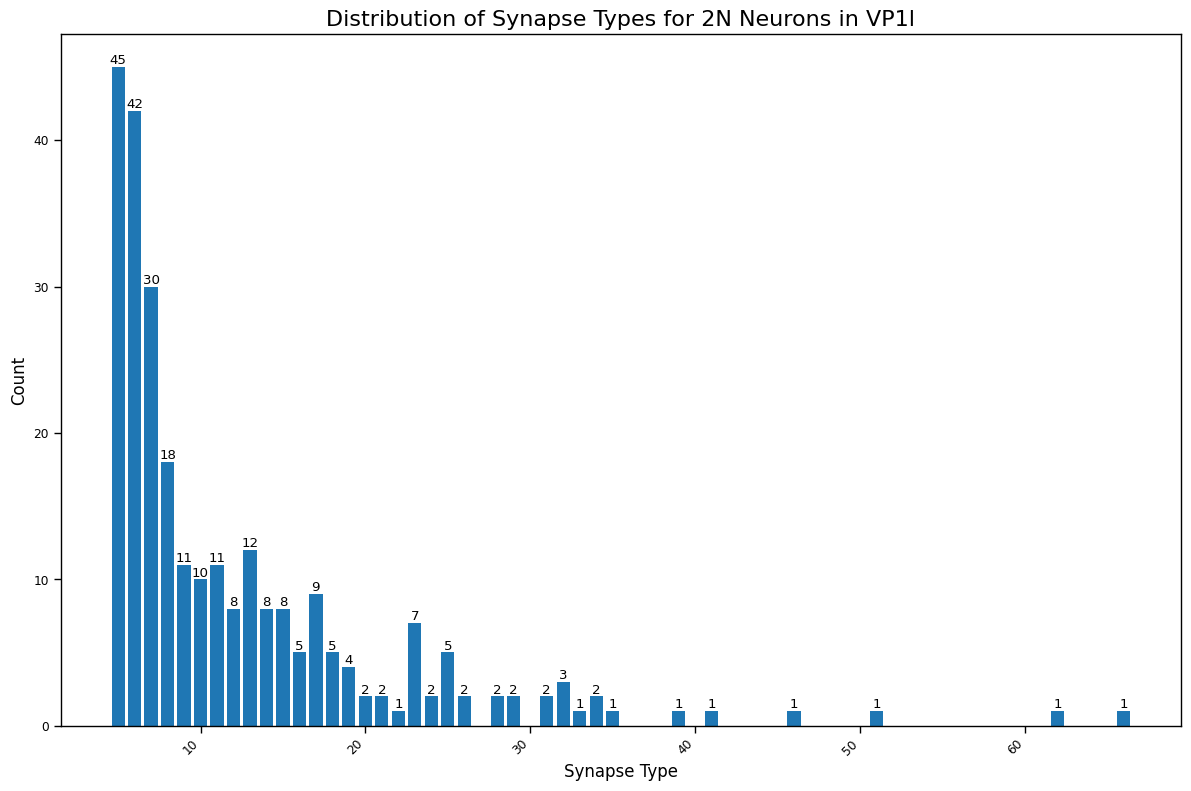

Synapse type counts for VP1l (2N):
5     45
6     42
7     30
8     18
13    12
9     11
11    11
10    10
17     9
12     8
15     8
14     8
23     7
16     5
25     5
18     5
19     4
32     3
26     2
29     2
31     2
21     2
20     2
28     2
34     2
24     2
66     1
62     1
33     1
22     1
39     1
41     1
46     1
35     1
51     1
Name: syn_count, dtype: int64
Median synapse count: 8.0




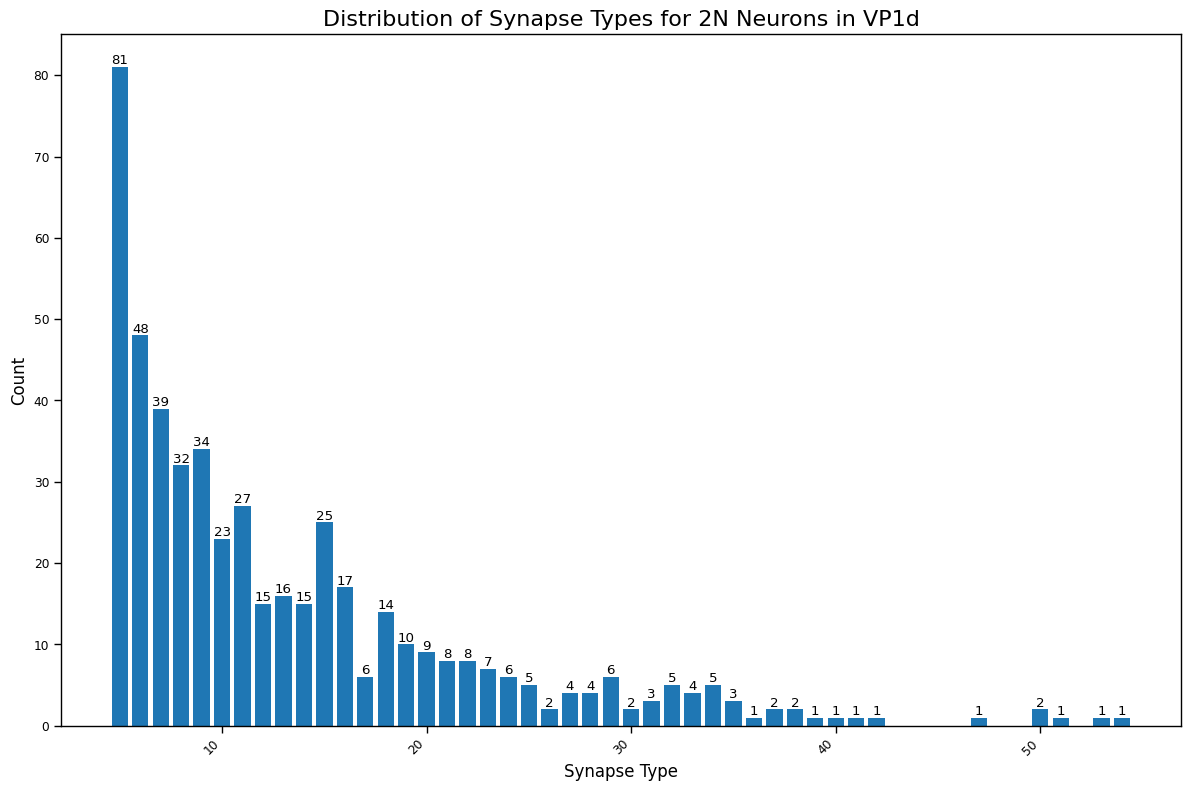

Synapse type counts for VP1d (2N):
5     81
6     48
7     39
9     34
8     32
11    27
15    25
10    23
16    17
13    16
14    15
12    15
18    14
19    10
20     9
22     8
21     8
23     7
24     6
29     6
17     6
25     5
32     5
34     5
33     4
28     4
27     4
31     3
35     3
37     2
26     2
38     2
50     2
30     2
51     1
39     1
36     1
41     1
47     1
42     1
53     1
54     1
40     1
Name: syn_count, dtype: int64
Median synapse count: 10.0




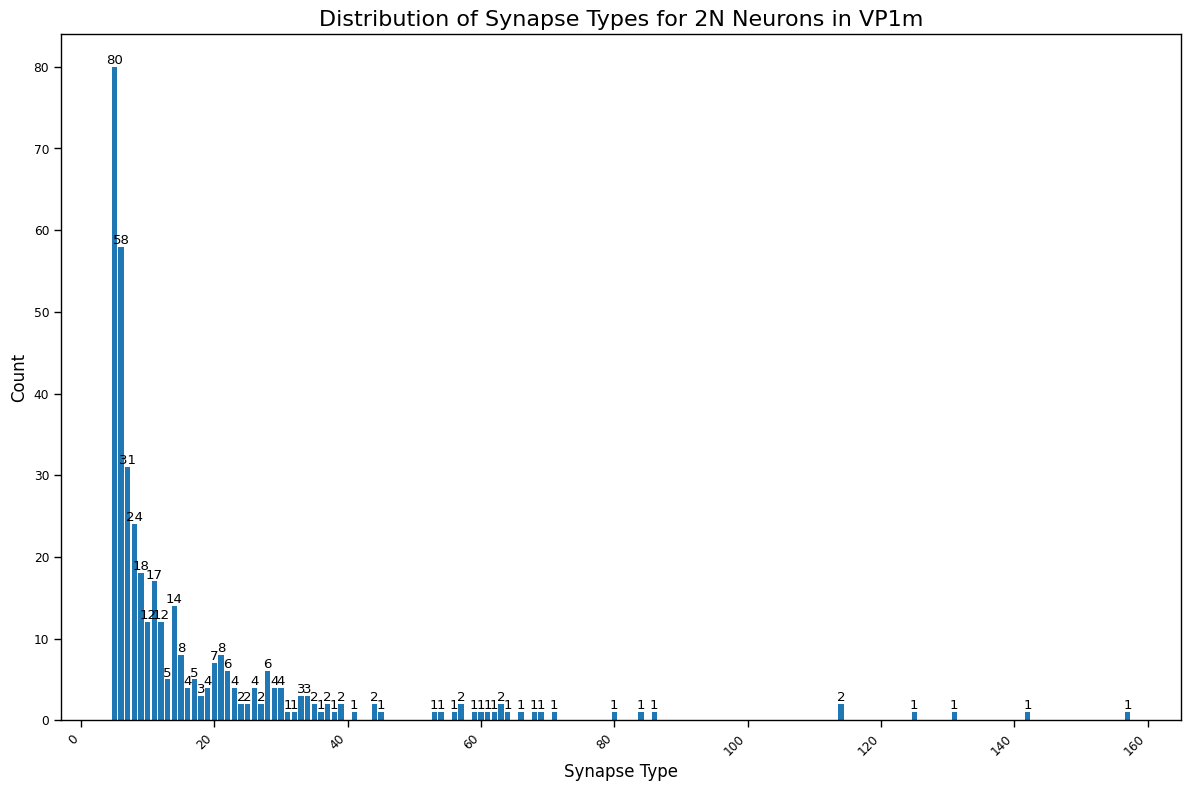

Synapse type counts for VP1m (2N):
5      80
6      58
7      31
8      24
9      18
11     17
14     14
12     12
10     12
15      8
21      8
20      7
28      6
22      6
13      5
17      5
30      4
19      4
26      4
16      4
23      4
29      4
34      3
33      3
18      3
63      2
24      2
25      2
35      2
114     2
39      2
57      2
27      2
44      2
37      2
84      1
54      1
125     1
68      1
53      1
56      1
69      1
41      1
64      1
71      1
59      1
31      1
66      1
62      1
86      1
38      1
131     1
61      1
32      1
45      1
80      1
60      1
142     1
157     1
36      1
Name: syn_count, dtype: int64
Median synapse count: 9.0




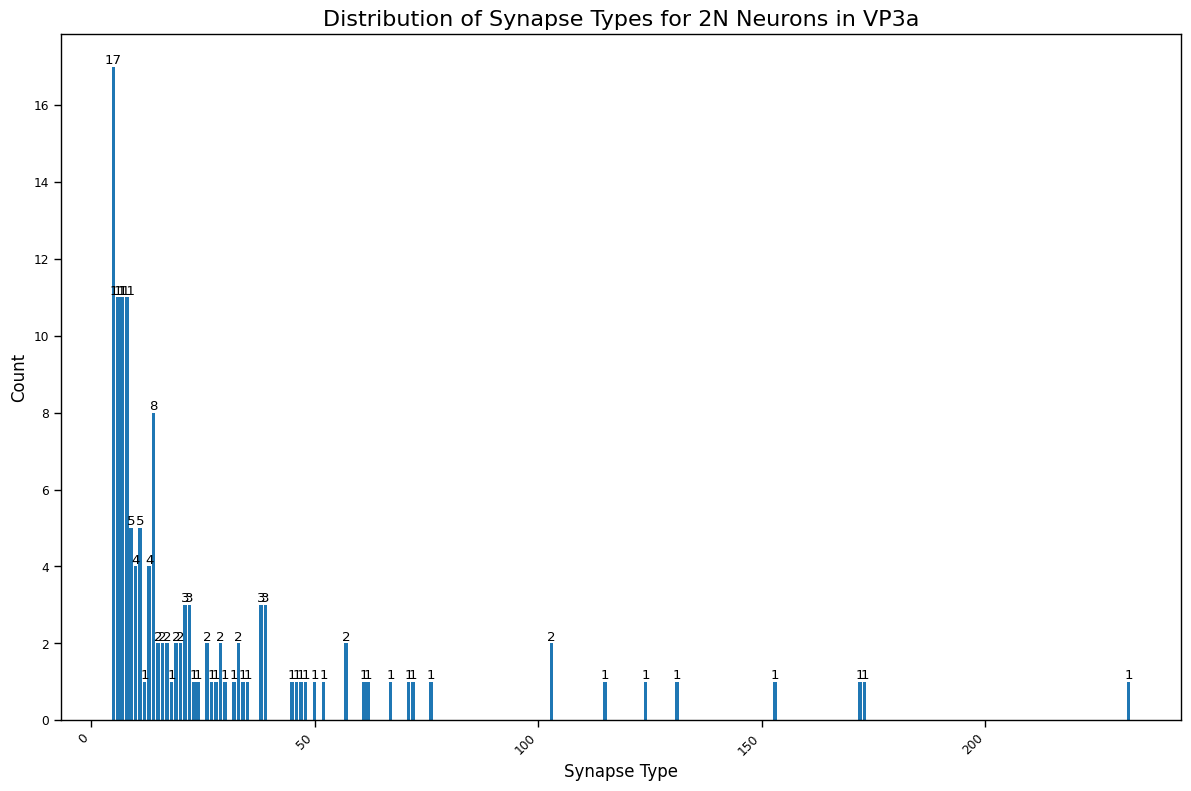

Synapse type counts for VP3a (2N):
5      17
6      11
8      11
7      11
14      8
11      5
9       5
10      4
13      4
21      3
39      3
38      3
22      3
26      2
15      2
17      2
103     2
19      2
16      2
33      2
29      2
20      2
57      2
46      1
173     1
62      1
35      1
232     1
47      1
153     1
27      1
131     1
76      1
50      1
72      1
172     1
48      1
45      1
52      1
115     1
24      1
124     1
30      1
34      1
61      1
12      1
28      1
32      1
23      1
18      1
67      1
71      1
Name: syn_count, dtype: int64
Median synapse count: 13.0




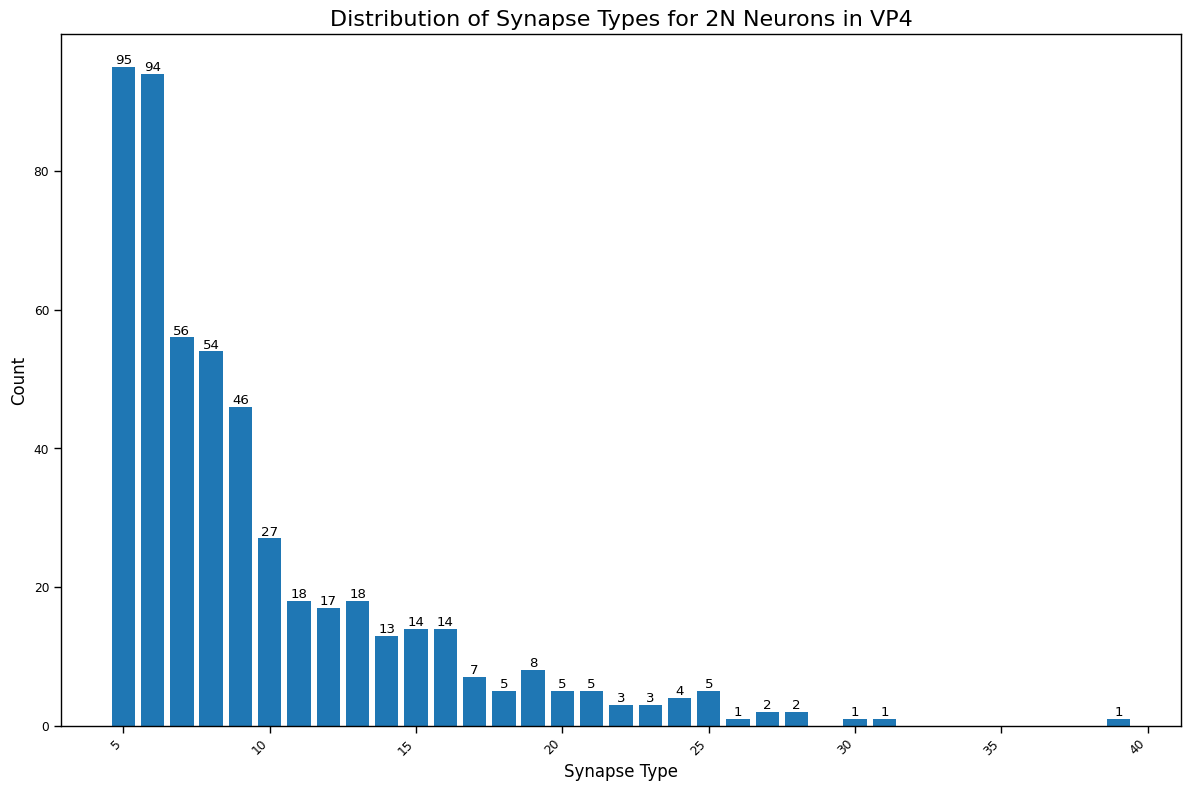

Synapse type counts for VP4 (2N):
5     95
6     94
7     56
8     54
9     46
10    27
13    18
11    18
12    17
15    14
16    14
14    13
19     8
17     7
21     5
20     5
18     5
25     5
24     4
23     3
22     3
27     2
28     2
31     1
30     1
39     1
26     1
Name: syn_count, dtype: int64
Median synapse count: 8.0




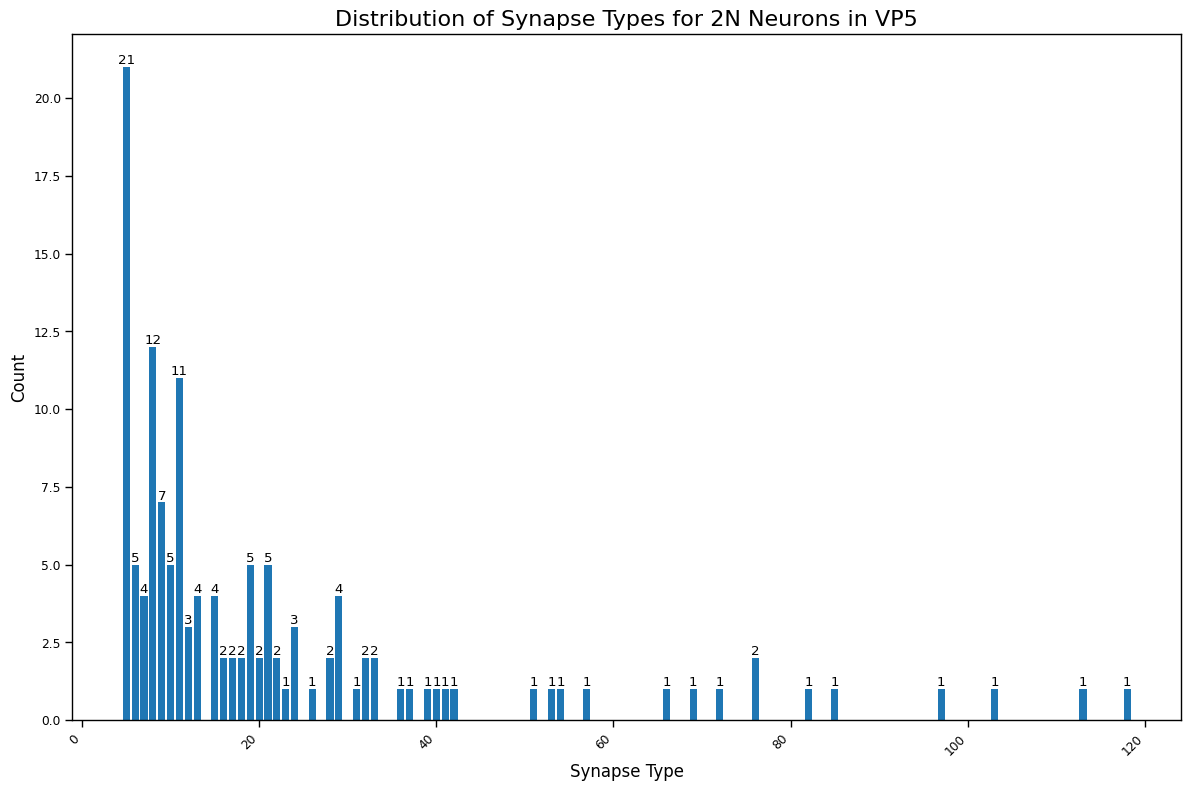

Synapse type counts for VP5 (2N):
5      21
8      12
11     11
9       7
10      5
19      5
21      5
6       5
7       4
29      4
13      4
15      4
24      3
12      3
17      2
18      2
20      2
32      2
33      2
76      2
28      2
22      2
16      2
42      1
26      1
40      1
66      1
82      1
118     1
53      1
97      1
39      1
51      1
31      1
72      1
41      1
85      1
103     1
54      1
57      1
37      1
23      1
69      1
113     1
36      1
Name: syn_count, dtype: int64
Median synapse count: 12.0




In [17]:
# Iterate through all VP dataframes in the connections_2N_dict
for vp, df in connections_2N_dict.items():
    # Count the occurrences of each synapse type
    syn_counts = df['syn_count'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    bars = plt.bar(syn_counts.index, syn_counts.values)

    # Customize the plot
    plt.title(f'Distribution of Synapse Types for 2N Neurons in {vp}', fontsize=16)
    plt.xlabel('Synapse Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print out the counts for verification
    print(f"Synapse type counts for {vp} (2N):")
    print(syn_counts)
    
    # Calculate and print the median
    median = df['syn_count'].median()
    print(f"Median synapse count: {median}")
    print("\n")


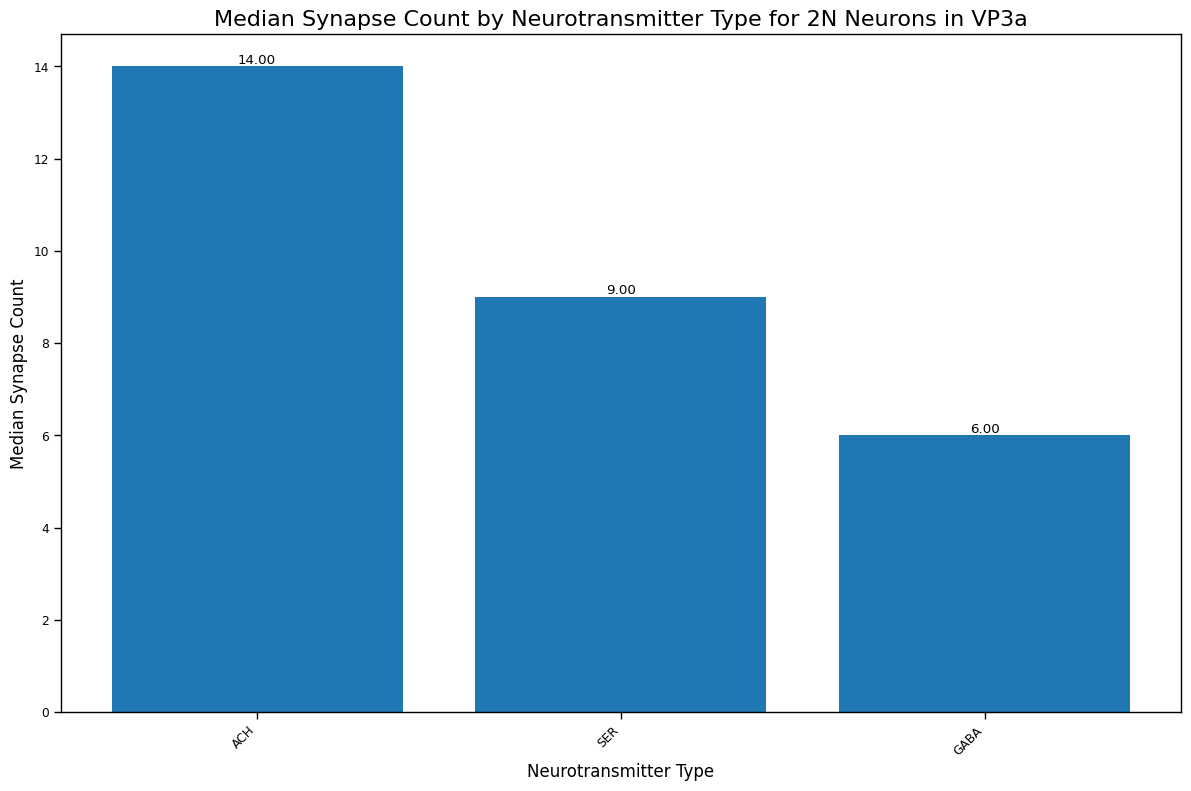

Median synapse counts by neurotransmitter type for VP3a (2N):
nt_type
ACH     14.0
SER      9.0
GABA     6.0
Name: syn_count, dtype: float64




In [18]:
# Get the VP3a dataframe from the connections_2N_dict
vp3a_df = connections_2N_dict['VP3a']

# Group by 'nt_type' and calculate the median 'syn_count' for each group
median_syn_counts = vp3a_df.groupby('nt_type')['syn_count'].median().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(median_syn_counts.index, median_syn_counts.values)

# Customize the plot
plt.title('Median Synapse Count by Neurotransmitter Type for 2N Neurons in VP3a', fontsize=16)
plt.xlabel('Neurotransmitter Type', fontsize=12)
plt.ylabel('Median Synapse Count', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print out the median synapse counts for verification
print("Median synapse counts by neurotransmitter type for VP3a (2N):")
print(median_syn_counts)
print("\n")


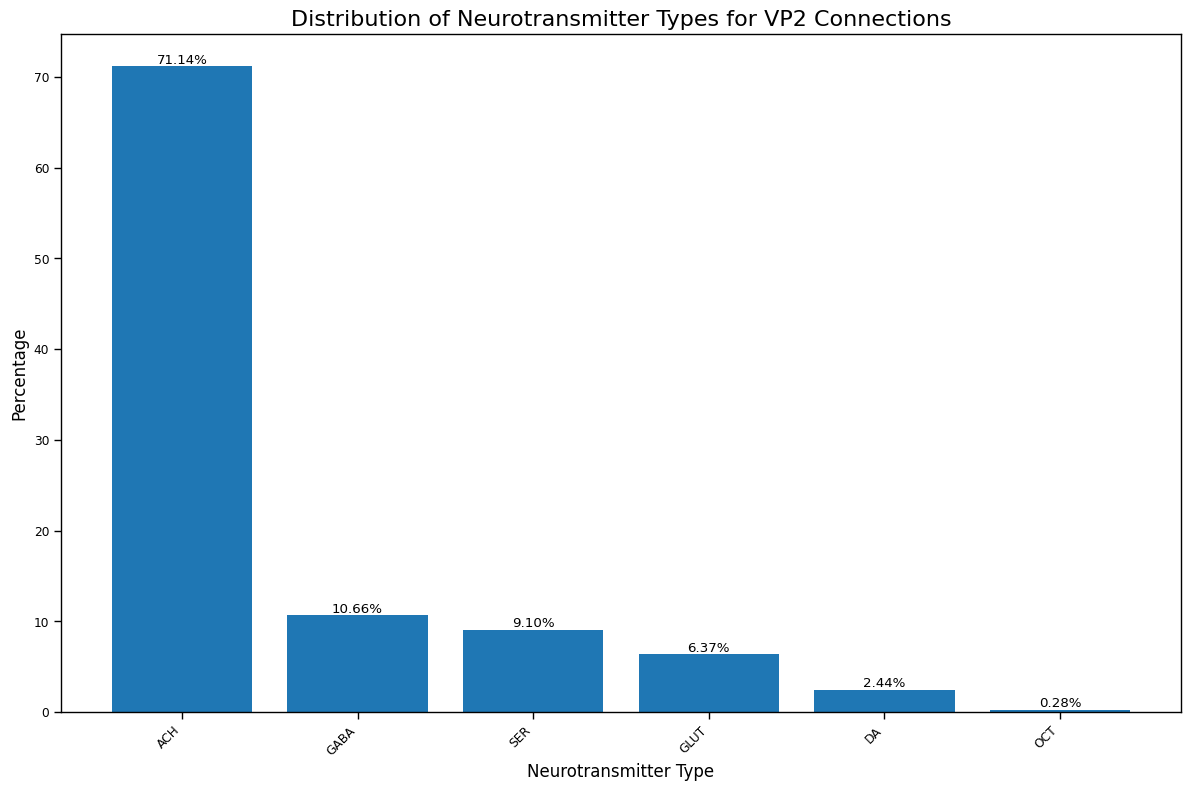

Distribution of neurotransmitter types for VP2 connections:
ACH     9506
GABA    1425
SER     1216
GLUT     851
DA       326
OCT       38
Name: nt_type, dtype: int64

Percentages:
ACH     71.142045
GABA    10.664571
SER      9.100434
GLUT     6.368807
DA       2.439755
OCT      0.284389
Name: nt_type, dtype: float64




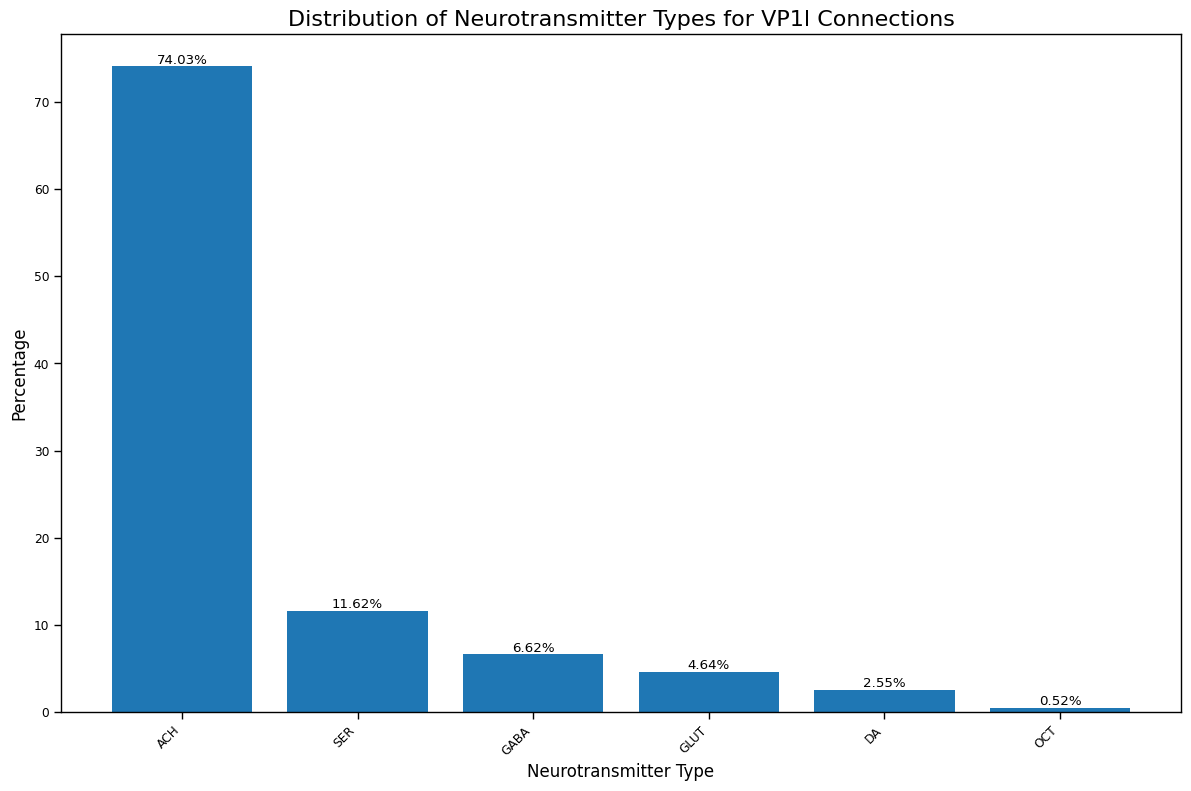

Distribution of neurotransmitter types for VP1l connections:
ACH     6694
SER     1051
GABA     599
GLUT     420
DA       231
OCT       47
Name: nt_type, dtype: int64

Percentages:
ACH     74.032294
SER     11.623535
GABA     6.624641
GLUT     4.644990
DA       2.554745
OCT      0.519797
Name: nt_type, dtype: float64




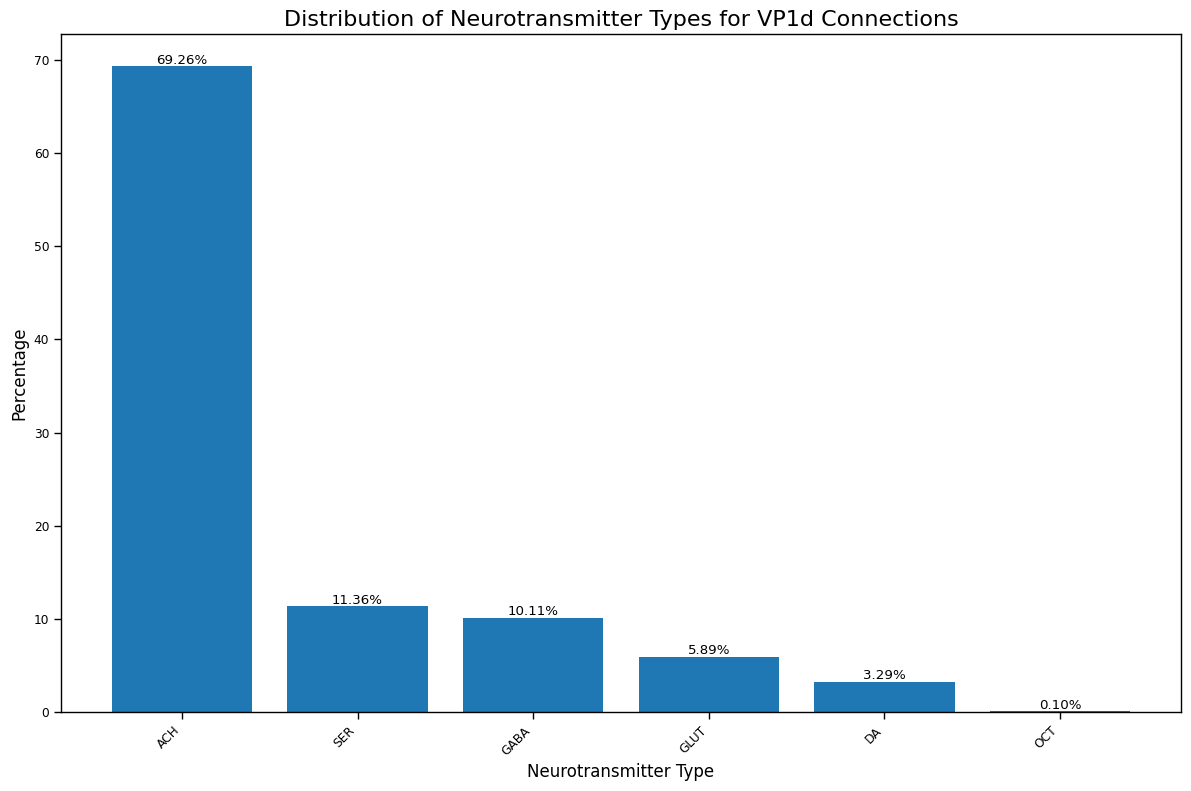

Distribution of neurotransmitter types for VP1d connections:
ACH     8697
SER     1426
GABA    1269
GLUT     740
DA       413
OCT       12
Name: nt_type, dtype: int64

Percentages:
ACH     69.260174
SER     11.356216
GABA    10.105917
GLUT     5.893127
DA       3.289002
OCT      0.095564
Name: nt_type, dtype: float64




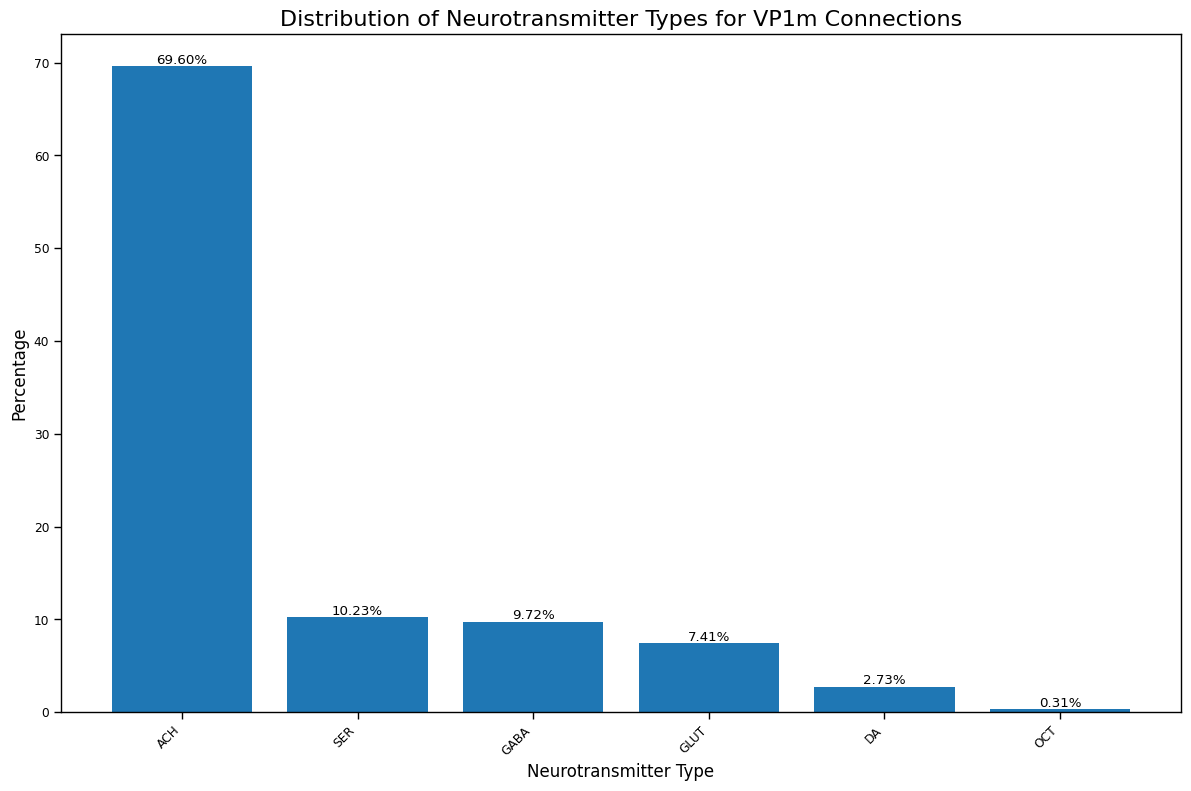

Distribution of neurotransmitter types for VP1m connections:
ACH     9576
SER     1407
GABA    1338
GLUT    1020
DA       376
OCT       42
Name: nt_type, dtype: int64

Percentages:
ACH     69.598081
SER     10.226034
GABA     9.724544
GLUT     7.413329
DA       2.732757
OCT      0.305255
Name: nt_type, dtype: float64




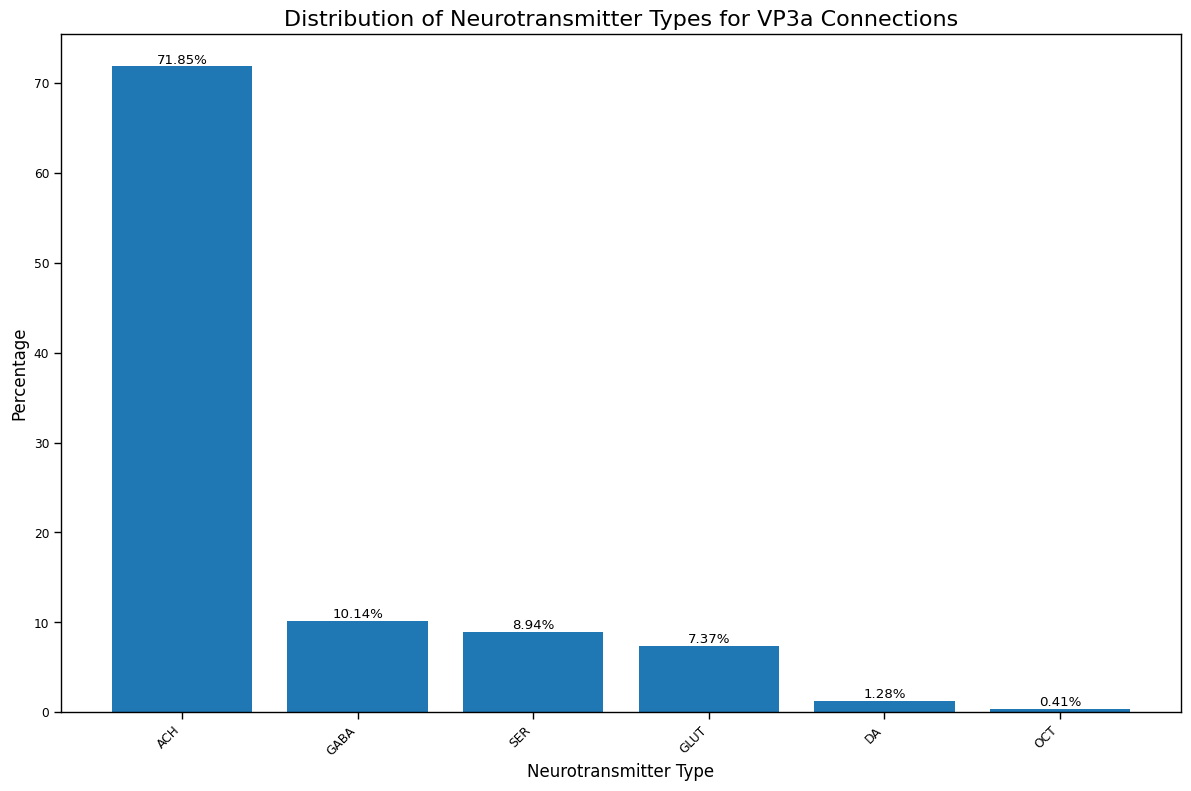

Distribution of neurotransmitter types for VP3a connections:
ACH     5904
GABA     833
SER      735
GLUT     606
DA       105
OCT       34
Name: nt_type, dtype: int64

Percentages:
ACH     71.851041
GABA    10.137520
SER      8.944870
GLUT     7.374954
DA       1.277839
OCT      0.413776
Name: nt_type, dtype: float64




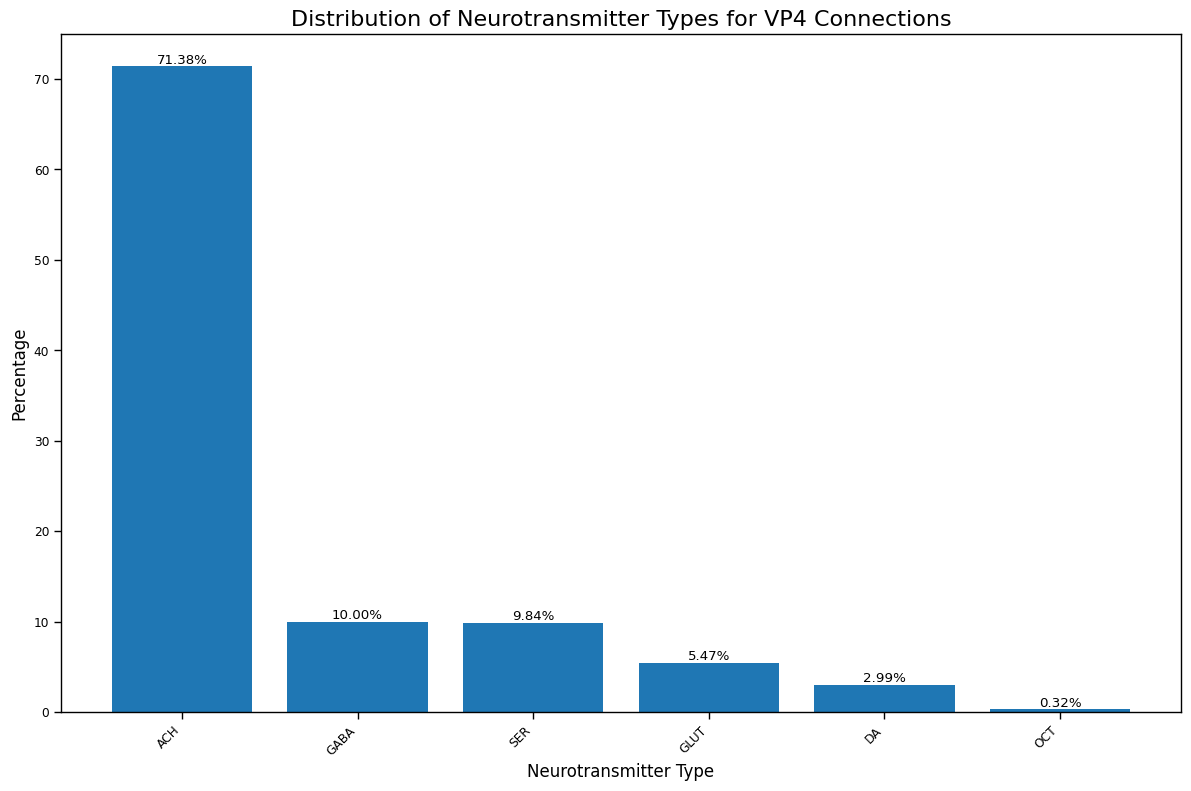

Distribution of neurotransmitter types for VP4 connections:
ACH     7593
GABA    1064
SER     1047
GLUT     582
DA       318
OCT       34
Name: nt_type, dtype: int64

Percentages:
ACH     71.376199
GABA    10.001880
SER      9.842076
GLUT     5.470953
DA       2.989284
OCT      0.319609
Name: nt_type, dtype: float64




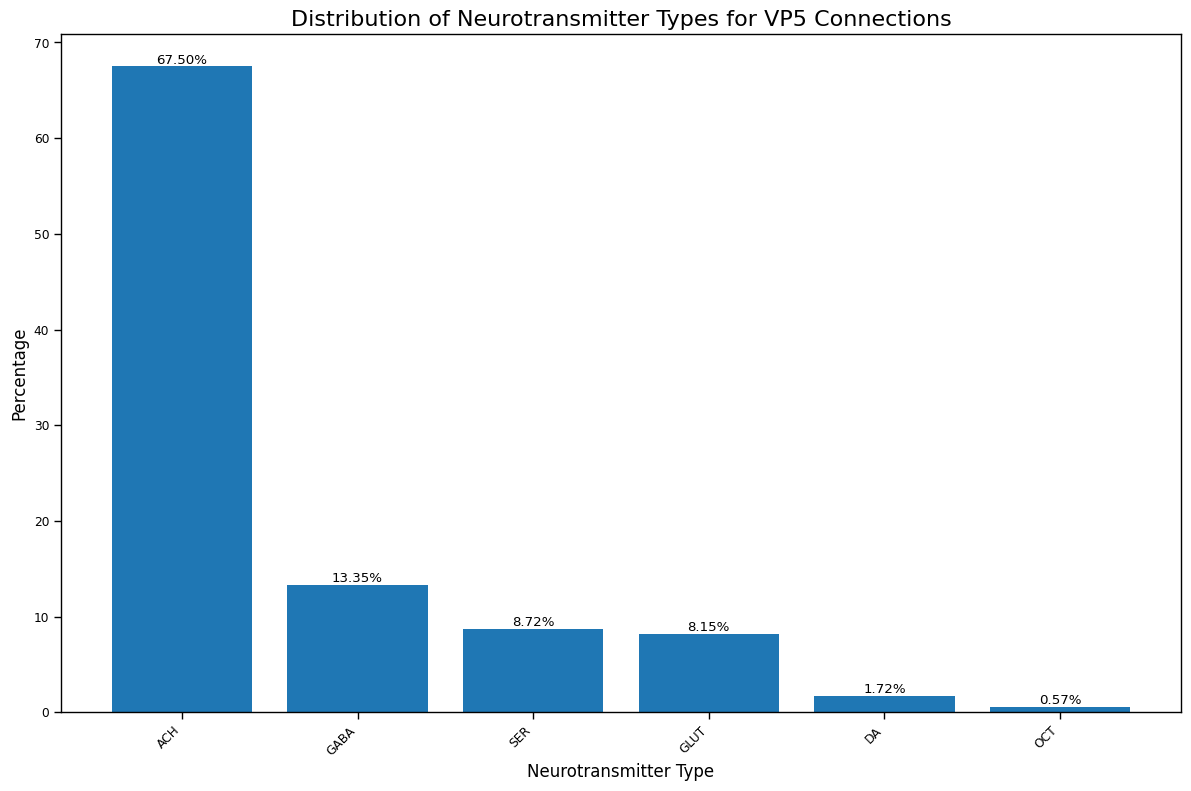

Distribution of neurotransmitter types for VP5 connections:
ACH     5071
GABA    1003
SER      655
GLUT     612
DA       129
OCT       43
Name: nt_type, dtype: int64

Percentages:
ACH     67.496340
GABA    13.350193
SER      8.718222
GLUT     8.145880
DA       1.717024
OCT      0.572341
Name: nt_type, dtype: float64




In [19]:
# Loop through all VPs in unique_downstream_2N_dict
for vp, vp_2N_df in unique_downstream_2N_dict.items():
    # Get the list of VP root_ids
    vp_root_ids = vp_2N_df['root_id'].unique().tolist()

    # Filter the connections dataframe
    filtered_connections = connections[
        (connections['post_root_id'].isin(vp_root_ids)) &
        (~connections['pre_root_id'].isin(vp_root_ids))
    ]

    # Merge the classification dataframe with filtered_connections
    vp_connections = pd.merge(filtered_connections, classification, 
                         left_on='pre_root_id', right_on='root_id', 
                         how='left')

    # Calculate the distribution of 'nt_type' for VP connections
    nt_type_distribution = vp_connections['nt_type'].value_counts()

    # Calculate percentages
    nt_type_percentage = nt_type_distribution / len(vp_connections) * 100

    # Create a bar plot
    plt.figure(figsize=(12, 8))
    bars = plt.bar(nt_type_percentage.index, nt_type_percentage.values)

    # Customize the plot
    plt.title(f'Distribution of Neurotransmitter Types for Incoming {vp} 2N Connections', fontsize=16)
    plt.xlabel('Neurotransmitter Type', fontsize=12)
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

    # Print out the distribution for verification
    print(f"Distribution of neurotransmitter types for {vp} connections:")
    print(nt_type_distribution)
    print("\nPercentages:")
    print(nt_type_percentage)
    print("\n")  # Add an extra newline for better separation between VPs

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

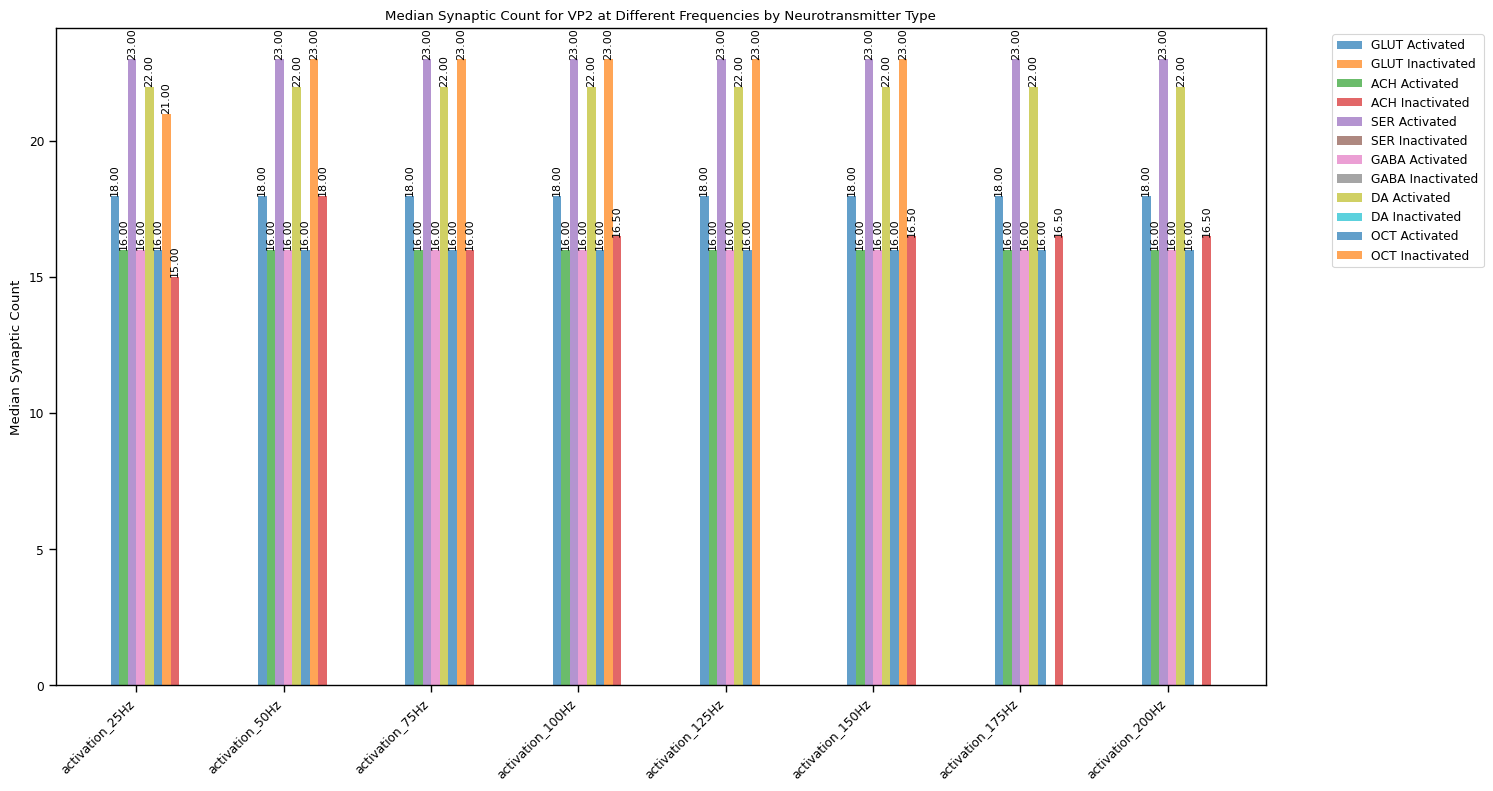

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

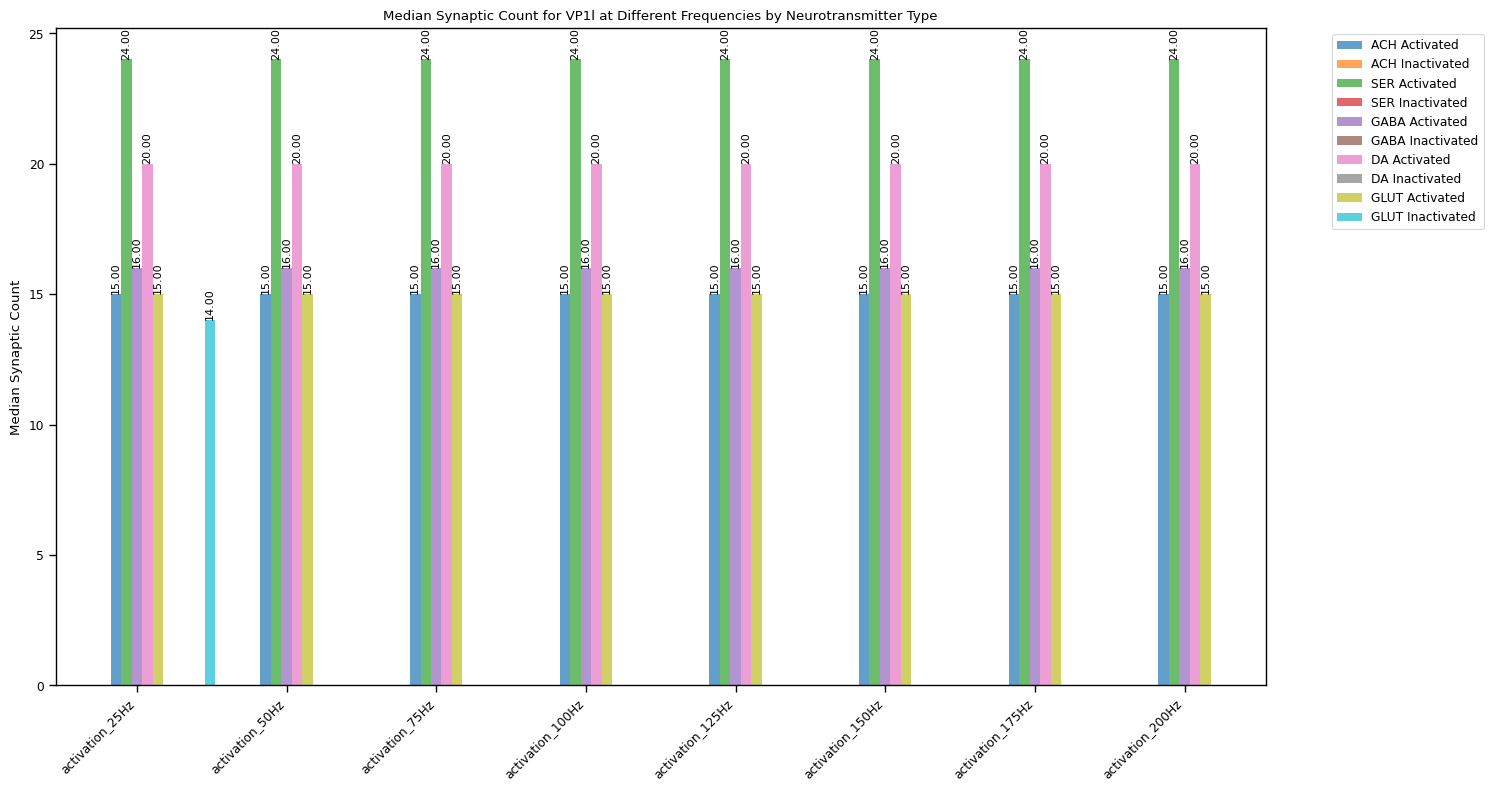

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

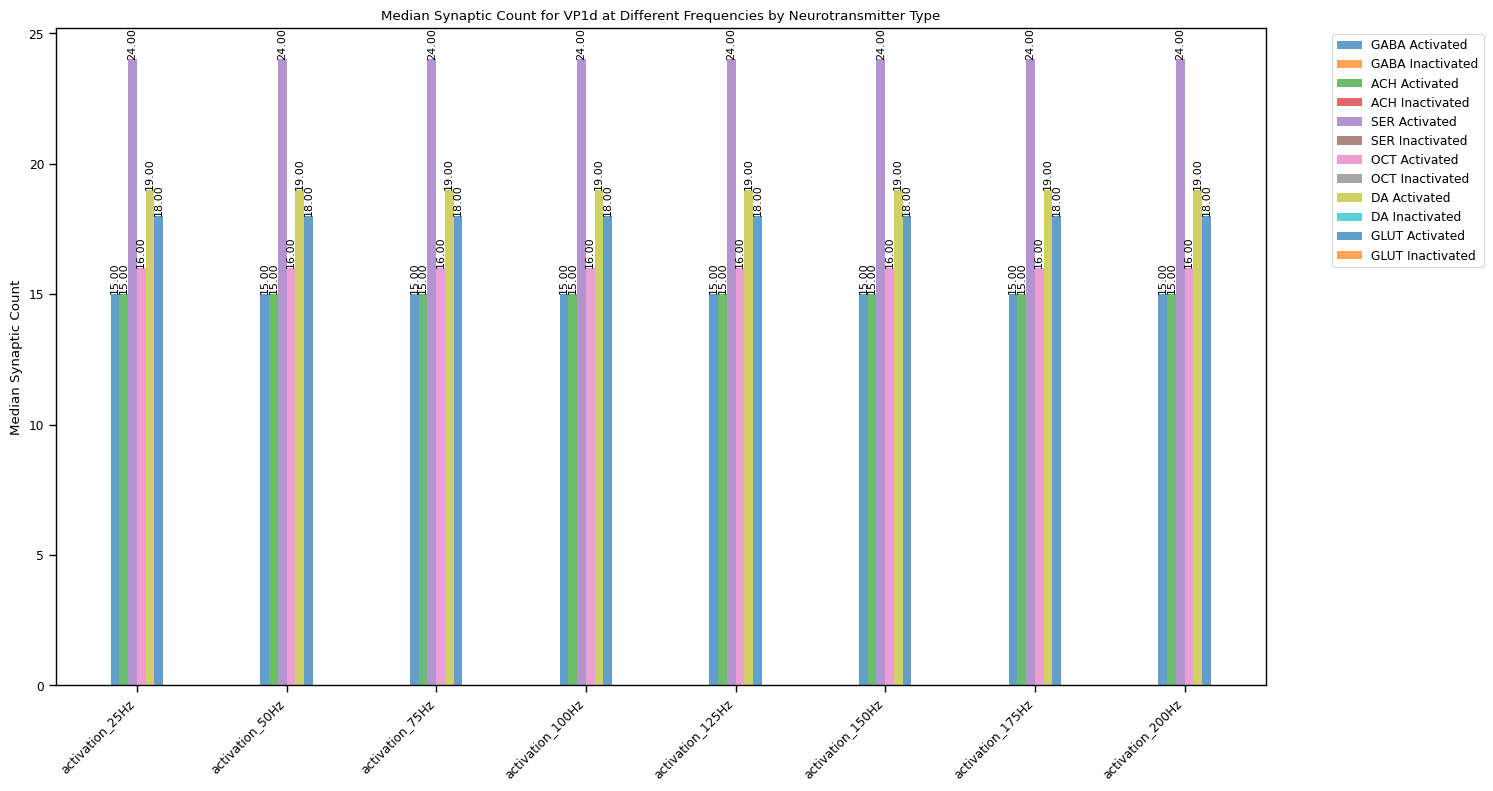

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

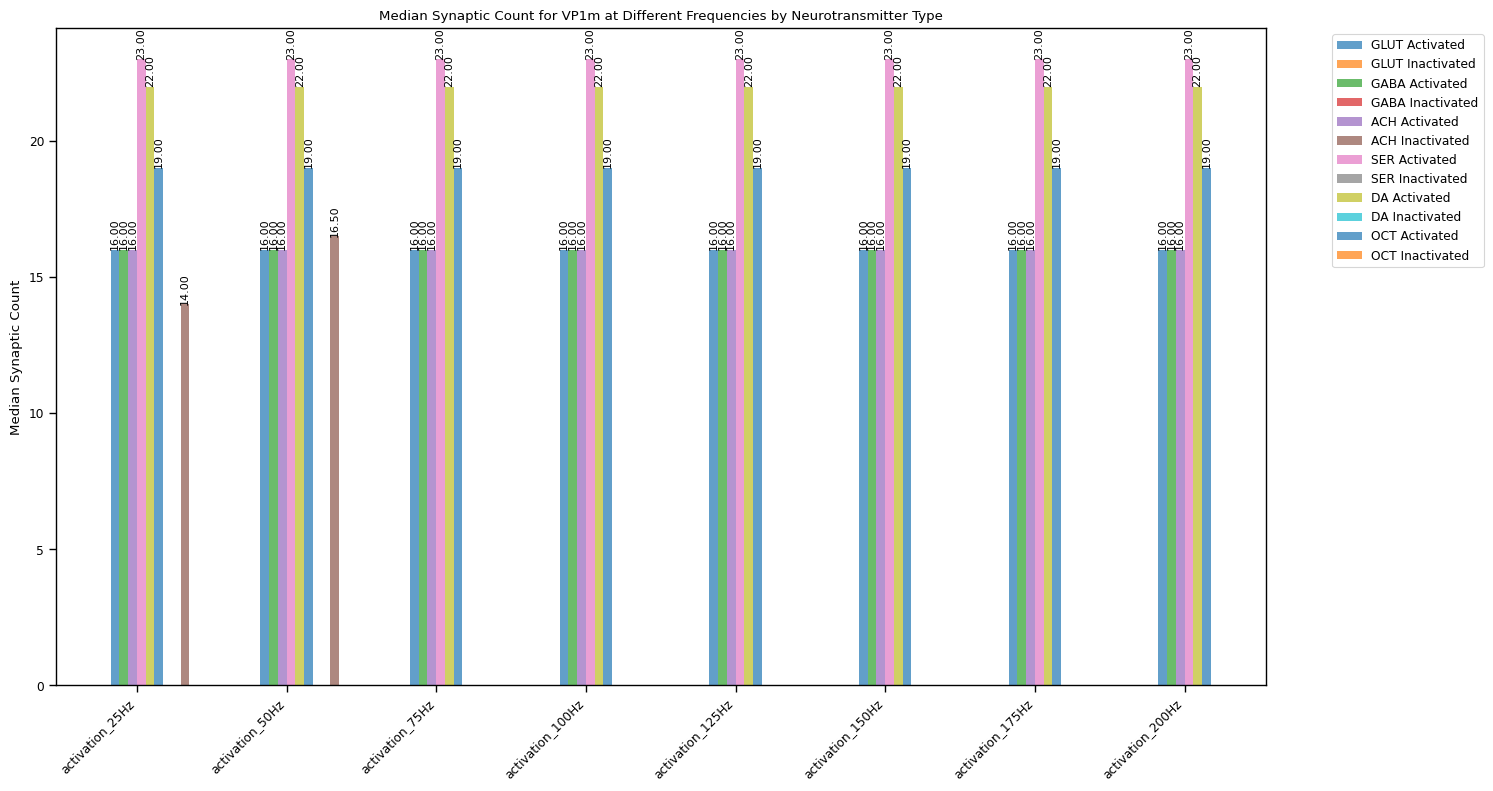

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

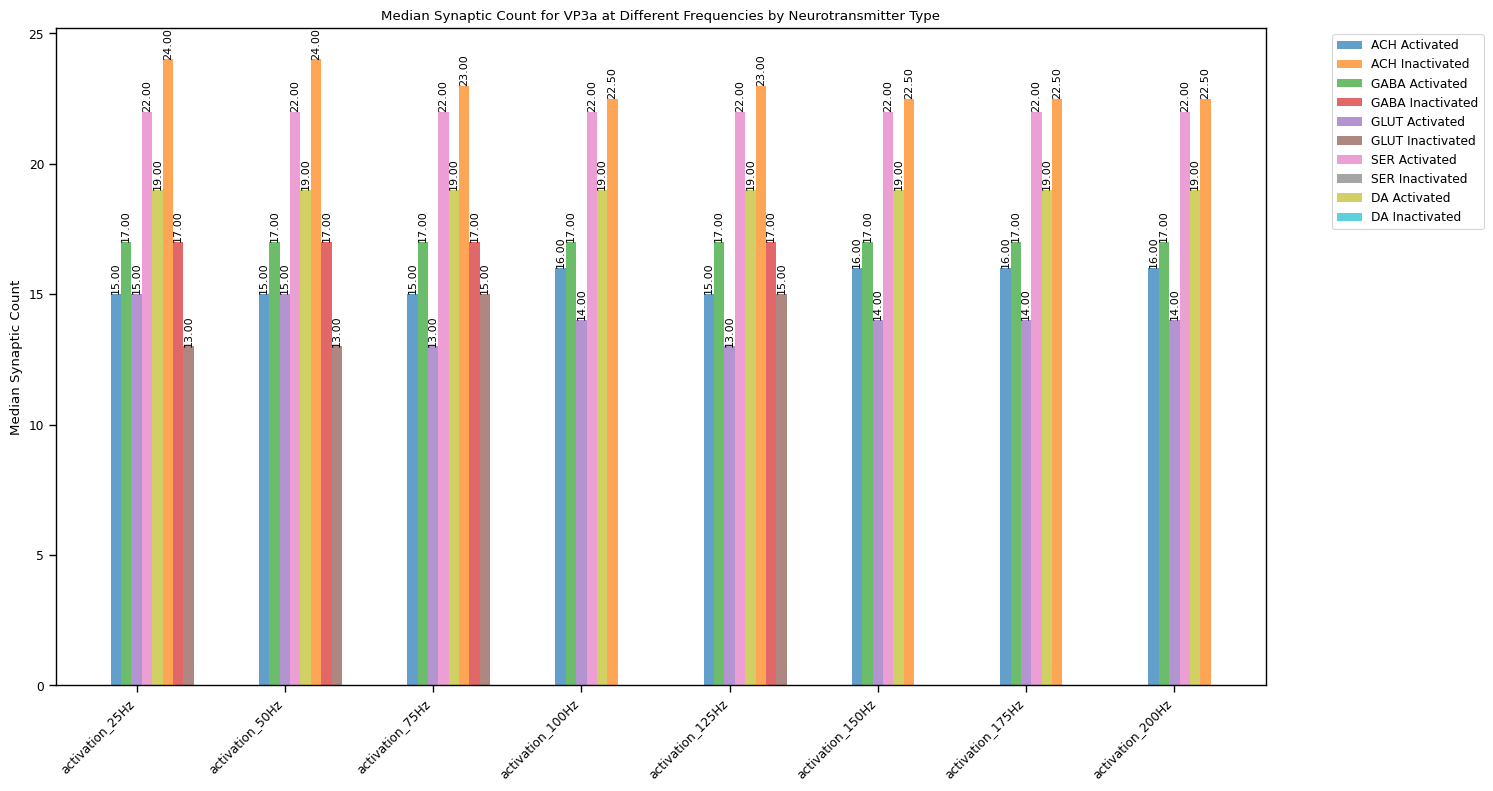

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

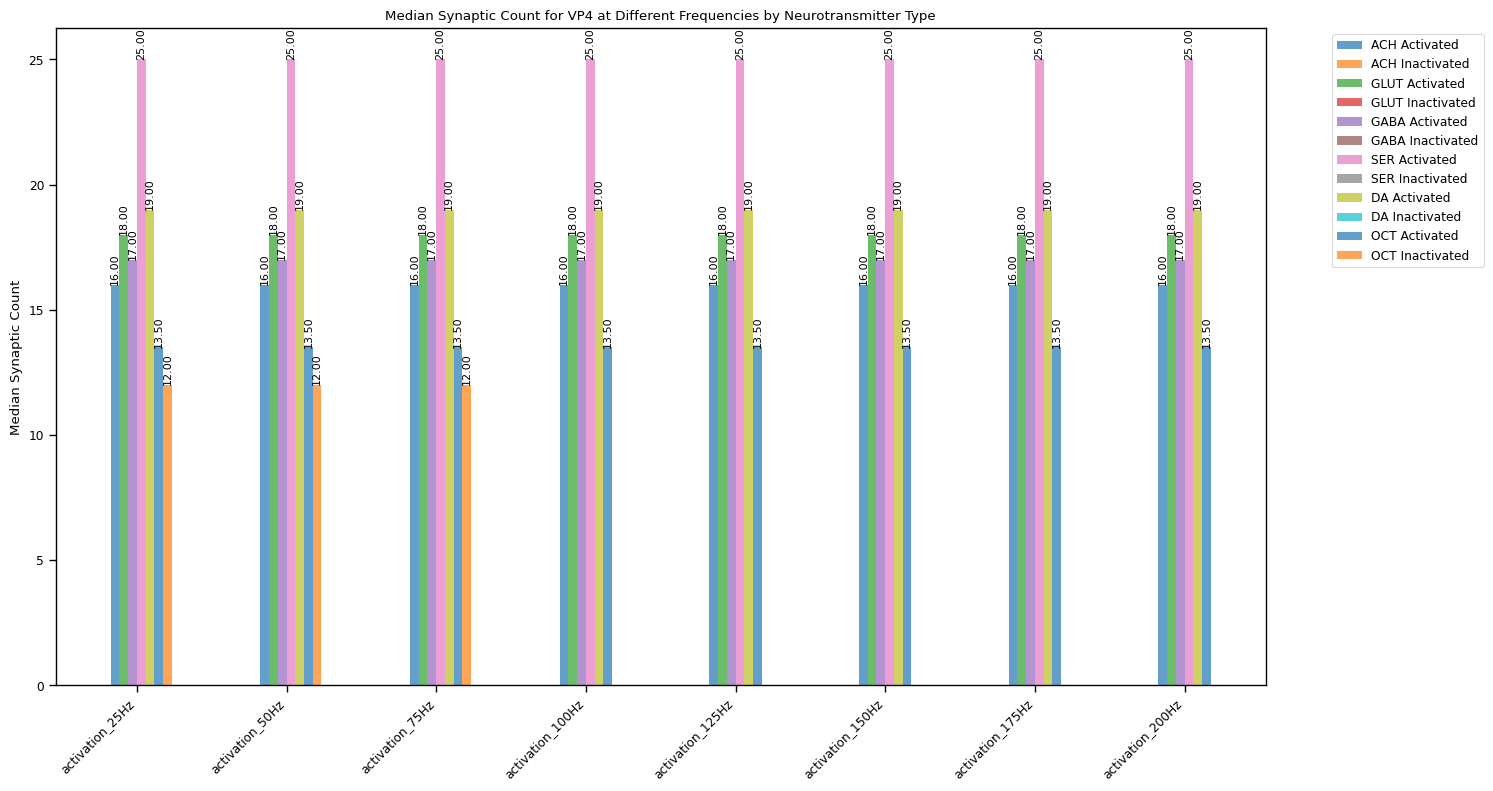

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

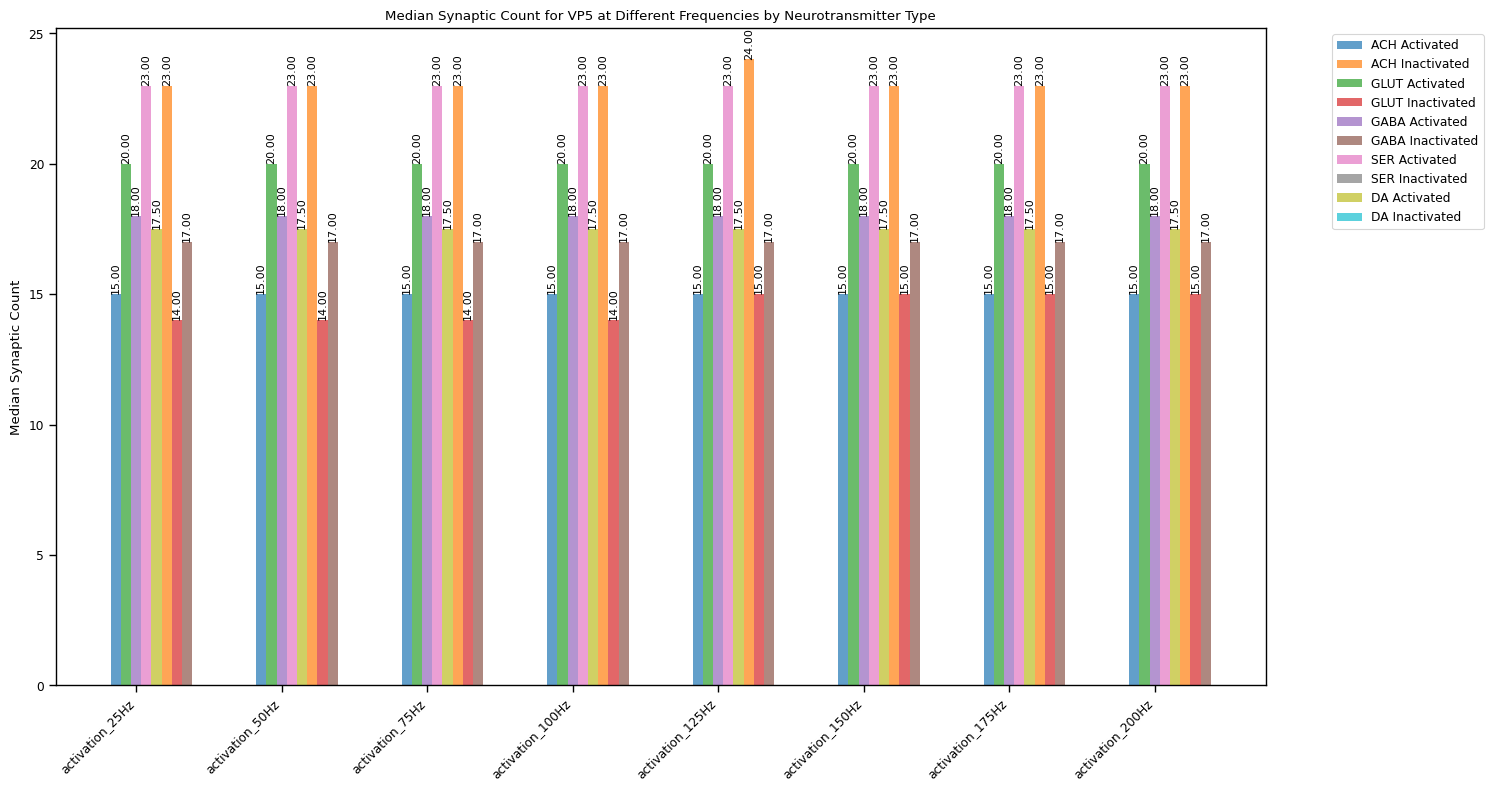

In [29]:
# Merge root_id of unique_downstream_2N with pre_root_id of connections_3N_dict
merged_connections = {}

for vp in unique_downstream_2N_dict.keys():
    if vp in connections_3N_dict:
        # Merge the dataframes
        merged_df = pd.merge(
            unique_downstream_2N_dict[vp],
            connections_3N_dict[vp],
            left_on='root_id',
            right_on='pre_root_id',
            how='inner'
        )
        
        # Store the merged dataframe in the dictionary
        merged_connections[vp] = merged_df

# Loop through the merged_connections dict
for vp, df in merged_connections.items():
    # Find columns ending with 'Hz'
    hz_columns = [col for col in df.columns if col.endswith('Hz')]
    
    # Get unique neurotransmitter types
    nt_types = df['nt_type'].unique()
    
    # Prepare data for plotting
    data = {nt: {'activated': [], 'inactivated': []} for nt in nt_types}
    
    for col in hz_columns:
        for nt in nt_types:
            nt_df = df[df['nt_type'] == nt]
            activated_median = nt_df[nt_df[col] == 'activated']['syn_count'].median()
            inactivated_median = nt_df[nt_df[col] == 'non activated']['syn_count'].median()
            data[nt]['activated'].append(activated_median)
            data[nt]['inactivated'].append(inactivated_median)
    
    # Create a grouped bar plot
    x = range(len(hz_columns))
    width = 0.35 / len(nt_types)
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    for i, nt in enumerate(nt_types):
        ax.bar([j + i*width for j in x], data[nt]['activated'], width, label=f'{nt} Activated', alpha=0.7)
        ax.bar([j + i*width + width*len(nt_types) for j in x], data[nt]['inactivated'], width, label=f'{nt} Inactivated', alpha=0.7)
    
    # Customize the plot
    ax.set_ylabel('Median Synaptic Count')
    ax.set_title(f'Median Synaptic Count for {vp} at Different Frequencies by Neurotransmitter Type')
    ax.set_xticks([i + width*(len(nt_types)-1)/2 for i in x])
    ax.set_xticklabels(hz_columns, rotation=45, ha='right')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on top of each bar
    for i, nt in enumerate(nt_types):
        for j, v in enumerate(data[nt]['activated']):
            ax.text(j + i*width, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)
        for j, v in enumerate(data[nt]['inactivated']):
            ax.text(j + i*width + width*len(nt_types), v, f'{v:.2f}', ha='center', va='bottom', fontsize=8, rotation=90)
    
    plt.tight_layout()
    plt.show()



In [20]:
for vp in unique_downstream_2N_dict:
    df = unique_downstream_2N_dict[vp]
    alpn_df = df[df['class'] == 'ALPN']
    multiglomerular_count = alpn_df[alpn_df['sub_class'] == 'multiglomerular'].shape[0]
    uniglomerular_count = alpn_df[alpn_df['sub_class'] == 'uniglomerular'].shape[0]
    total_count = alpn_df.shape[0]
    multiglomerular_pct = (multiglomerular_count / total_count) * 100
    uniglomerular_pct = (uniglomerular_count / total_count) * 100
    
    print(f"VP: {vp}, Multiglomerular: {multiglomerular_pct:.2f}%, Uniglomerular: {uniglomerular_pct:.2f}%")



VP: VP2, Multiglomerular: 76.24%, Uniglomerular: 15.84%
VP: VP1l, Multiglomerular: 63.92%, Uniglomerular: 36.08%
VP: VP1d, Multiglomerular: 82.29%, Uniglomerular: 17.71%
VP: VP1m, Multiglomerular: 85.62%, Uniglomerular: 14.38%
VP: VP3a, Multiglomerular: 100.00%, Uniglomerular: 0.00%
VP: VP4, Multiglomerular: 78.07%, Uniglomerular: 21.93%
VP: VP5, Multiglomerular: 98.39%, Uniglomerular: 1.61%


In [28]:
#unique_downstream_2N_dict['VP5'][(unique_downstream_2N_dict['VP5']['class'] == 'ALPN') & (unique_downstream_2N_dict['VP5']['sub_class'] == 'uniglomerular')]
unique_downstream_2N_dict['VP5'][unique_downstream_2N_dict['VP5']['class'] == 'ALPN']
root_ids_list = []
for vp in unique_downstream_2N_dict:
    alpn_df = unique_downstream_2N_dict[vp][unique_downstream_2N_dict[vp]['class'] == 'ALPN']
    unique_root_ids = alpn_df['root_id'].unique()
    root_ids_list.extend(unique_root_ids)
    print(f"VP: {vp}, Unique Root IDs: {unique_root_ids}")
# Save the list of root_ids to a csv file in a long format, eliminating duplicates
import csv
with open('alpn_ids.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for root_id in set(root_ids_list):
        writer.writerow([root_id])


VP: VP2, Unique Root IDs: [720575940612856273 720575940631347011 720575940608293129
 720575940627265274 720575940619772525 720575940637712243
 720575940610609454 720575940629752219 720575940626650776
 720575940637185252 720575940626682682 720575940614344354
 720575940648206468 720575940623673802 720575940631801671
 720575940630546540 720575940612468594 720575940619895125
 720575940623605943 720575940614065676 720575940617839739
 720575940610511043 720575940623307447 720575940628024107
 720575940612551594 720575940620931312 720575940612856342
 720575940632128908 720575940633552028 720575940619766219
 720575940618800225]
VP: VP1l, Unique Root IDs: [720575940614871106 720575940611352014 720575940620566808
 720575940624083484 720575940611520721 720575940624030819
 720575940613203119 720575940628338028 720575940622331882
 720575940637449023 720575940625176094 720575940628346194
 720575940625627023 720575940633074145 720575940630584079
 720575940625007949 720575940630432815]
VP: VP1d, Unique